In [ ]:
!apt-get install -y libopenmpi-dev libosmesa6-dev
!pip install gymnasium stable-baselines3[extra]


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenmpi-dev is already the newest version (4.1.2-2ubuntu1).
The following additional packages will be installed:
  libdrm-dev libgl-dev libglx-dev libosmesa6 libpciaccess-dev mesa-common-dev
The following NEW packages will be installed:
  libdrm-dev libgl-dev libglx-dev libosmesa6 libosmesa6-dev libpciaccess-dev mesa-common-dev
0 upgraded, 7 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,761 kB of archives.
After this operation, 18.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpciaccess-dev amd64 0.16-3 [21.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libdrm-dev amd64 2.4.113-2~ubuntu0.22.04.1 [292 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libglx-dev amd64 1.4.0-1 [14.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgl-dev amd64 1.4.0-1 [101 kB]
Get:5 http:

In [ ]:
!pip install gymnasium stable-baselines3 pandas numpy matplotlib
!pip install yfinance
!pip install ta
!pip install mplfinance


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=8e1ead429b9a695cb2135a96494c9df31ad177a2fa71a32c76bafa5b4f13fc0d
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

# Function to calculate RSI
def calculate_rsi(series, window=14):
    delta = series.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# List of tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'AAL', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
all_tickers = stock_tickers + bond_tickers

# Fetch and process data
asset_data = {}
for ticker in all_tickers:
    print(f"Fetching data for {ticker}...")
    try:
        df = yf.download(ticker, start='2014-01-01', end='2024-01-01')
        print(f"Columns for {ticker}:", df.columns)

        # Select appropriate columns
        if 'Adj Close' in df.columns:
            df = df[['Adj Close', 'Volume']]
        elif 'Close' in df.columns:
            df = df[['Close', 'Volume']]
        else:
            print(f"Missing 'Adj Close' and 'Close' for {ticker}. Skipping...")
            continue

        # Calculate additional features
        df['20-Day MA'] = df['Adj Close'].rolling(window=20).mean() if 'Adj Close' in df else df['Close'].rolling(window=20).mean()
        df['RSI'] = calculate_rsi(df['Adj Close'] if 'Adj Close' in df else df['Close'])
        df['Daily Returns'] = df['Adj Close'].pct_change() if 'Adj Close' in df else df['Close'].pct_change()
        asset_data[ticker] = df
    except Exception as e:
        print(f"Failed to fetch or process data for {ticker}: {e}")

# Combine data
if asset_data:
    combined_asset_data = pd.concat([asset_data[ticker].add_prefix(f"{ticker}_") for ticker in asset_data], axis=1)
    combined_asset_data.index = combined_asset_data.index.tz_localize(None)

    # Save with dynamic filename
    timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f'asset_data_{timestamp}.xlsx'
    combined_asset_data.to_excel(filename)

    print(f"Data successfully saved to {filename}")
else:
    print("No data was successfully fetched. Check your tickers and data source.")


[*********************100%***********************]  1 of 1 completed

Fetching data for NVDA...
Columns for NVDA: MultiIndex([( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
Fetching data for GOOGL...



[*********************100%***********************]  1 of 1 completed


Columns for GOOGL: MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL')],
           names=['Price', 'Ticker'])
Fetching data for ABBV...


[*********************100%***********************]  1 of 1 completed


Columns for ABBV: MultiIndex([( 'Close', 'ABBV'),
            (  'High', 'ABBV'),
            (   'Low', 'ABBV'),
            (  'Open', 'ABBV'),
            ('Volume', 'ABBV')],
           names=['Price', 'Ticker'])
Fetching data for NKE...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for NKE: MultiIndex([( 'Close', 'NKE'),
            (  'High', 'NKE'),
            (   'Low', 'NKE'),
            (  'Open', 'NKE'),
            ('Volume', 'NKE')],
           names=['Price', 'Ticker'])
Fetching data for COST...


[*********************100%***********************]  1 of 1 completed


Columns for COST: MultiIndex([( 'Close', 'COST'),
            (  'High', 'COST'),
            (   'Low', 'COST'),
            (  'Open', 'COST'),
            ('Volume', 'COST')],
           names=['Price', 'Ticker'])
Fetching data for DUK...


[*********************100%***********************]  1 of 1 completed


Columns for DUK: MultiIndex([( 'Close', 'DUK'),
            (  'High', 'DUK'),
            (   'Low', 'DUK'),
            (  'Open', 'DUK'),
            ('Volume', 'DUK')],
           names=['Price', 'Ticker'])
Fetching data for JPM...
Columns for JPM: MultiIndex([( 'Close', 'JPM'),
            (  'High', 'JPM'),
            (   'Low', 'JPM'),
            (  'Open', 'JPM'),
            ('Volume', 'JPM')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Fetching data for AXP...
Columns for AXP: MultiIndex([( 'Close', 'AXP'),
            (  'High', 'AXP'),
            (   'Low', 'AXP'),
            (  'Open', 'AXP'),
            ('Volume', 'AXP')],
           names=['Price', 'Ticker'])
Fetching data for CAT...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Columns for CAT: MultiIndex([( 'Close', 'CAT'),
            (  'High', 'CAT'),
            (   'Low', 'CAT'),
            (  'Open', 'CAT'),
            ('Volume', 'CAT')],
           names=['Price', 'Ticker'])
Fetching data for AAL...
Columns for AAL: MultiIndex([( 'Close', 'AAL'),
            (  'High', 'AAL'),
            (   'Low', 'AAL'),
            (  'Open', 'AAL'),
            ('Volume', 'AAL')],
           names=['Price', 'Ticker'])
Fetching data for HD...



[*********************100%***********************]  1 of 1 completed


Columns for HD: MultiIndex([( 'Close', 'HD'),
            (  'High', 'HD'),
            (   'Low', 'HD'),
            (  'Open', 'HD'),
            ('Volume', 'HD')],
           names=['Price', 'Ticker'])
Fetching data for VGSH...
Columns for VGSH: MultiIndex([( 'Close', 'VGSH'),
            (  'High', 'VGSH'),
            (   'Low', 'VGSH'),
            (  'Open', 'VGSH'),
            ('Volume', 'VGSH')],
           names=['Price', 'Ticker'])
Fetching data for SPTS...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for SPTS: MultiIndex([( 'Close', 'SPTS'),
            (  'High', 'SPTS'),
            (   'Low', 'SPTS'),
            (  'Open', 'SPTS'),
            ('Volume', 'SPTS')],
           names=['Price', 'Ticker'])
Fetching data for IEI...
Columns for IEI: MultiIndex([( 'Close', 'IEI'),
            (  'High', 'IEI'),
            (   'Low', 'IEI'),
            (  'Open', 'IEI'),
            ('Volume', 'IEI')],
           names=['Price', 'Ticker'])
Fetching data for SCHI...
Columns for SCHI: MultiIndex([( 'Close', 'SCHI'),
            (  'High', 'SCHI'),
            (   'Low', 'SCHI'),
            (  'Open', 'SCHI'),
            ('Volume', 'SCHI')],
           names=['Price', 'Ticker'])
Fetching data for TIP...


[*********************100%***********************]  1 of 1 completed


Columns for TIP: MultiIndex([( 'Close', 'TIP'),
            (  'High', 'TIP'),
            (   'Low', 'TIP'),
            (  'Open', 'TIP'),
            ('Volume', 'TIP')],
           names=['Price', 'Ticker'])
Data successfully saved to asset_data_20250109_221615.xlsx


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the ticker for S&P 500
sp500_ticker = "^GSPC"

# Fetch S&P 500 data
print("Fetching S&P 500 data...")
sp500_data = yf.download(sp500_ticker, start='2014-01-01', end='2024-01-01')

# Extract adjusted close prices and calculate metrics
sp500_data = sp500_data[['Adj Close']].rename(columns={'Adj Close': 'SP500'})
sp500_data['SP500 Daily Returns'] = sp500_data['SP500'].pct_change()
sp500_data['SP500 Log Returns'] = np.log(sp500_data['SP500'] / sp500_data['SP500'].shift(1))
sp500_data['20-Day MA'] = sp500_data['SP500'].rolling(window=20).mean()
sp500_data['50-Day MA'] = sp500_data['SP500'].rolling(window=50).mean()
sp500_data['200-Day MA'] = sp500_data['SP500'].rolling(window=200).mean()
sp500_data['20-Day Volatility'] = sp500_data['SP500'].pct_change().rolling(window=20).std()
sp500_data['200-Day Volatility'] = sp500_data['SP500'].pct_change().rolling(window=200).std()
sp500_data['RSI'] = calculate_rsi(sp500_data['SP500'])

# Save the data to an Excel file
sp500_output_path = 'sp500_data_with_metrics.xlsx'
sp500_data.to_excel(sp500_output_path)

print(f"S&P 500 data with metrics saved to '{sp500_output_path}'.")


Fetching S&P 500 data...


[*********************100%***********************]  1 of 1 completed


S&P 500 data with metrics saved to 'sp500_data_with_metrics.xlsx'.


In [ ]:
print(sp500_data.index)


Index([           'Ticker',              'Date', 2014-01-02 00:00:00,
       2014-01-03 00:00:00, 2014-01-06 00:00:00, 2014-01-07 00:00:00,
       2014-01-08 00:00:00, 2014-01-09 00:00:00, 2014-01-10 00:00:00,
       2014-01-13 00:00:00,
       ...
       2023-12-15 00:00:00, 2023-12-18 00:00:00, 2023-12-19 00:00:00,
       2023-12-20 00:00:00, 2023-12-21 00:00:00, 2023-12-22 00:00:00,
       2023-12-26 00:00:00, 2023-12-27 00:00:00, 2023-12-28 00:00:00,
       2023-12-29 00:00:00],
      dtype='object', name='Price', length=2518)


In [ ]:
sp500_data = pd.read_excel('sp500_data_with_metrics.xlsx', index_col=0)


In [ ]:
sp500_data = sp500_data[~sp500_data.index.str.contains("Ticker", na=False)]


In [ ]:
sp500_data.index = pd.to_datetime(sp500_data.index, errors='coerce')
sp500_data.dropna(subset=["SP500"], inplace=True)  # Drop rows with invalid dates


<ipython-input-27-4bc86a9c9c5f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_data.index = pd.to_datetime(sp500_data.index, errors='coerce')


[*********************100%***********************]  1 of 1 completed

Fetching S&P 500 data...


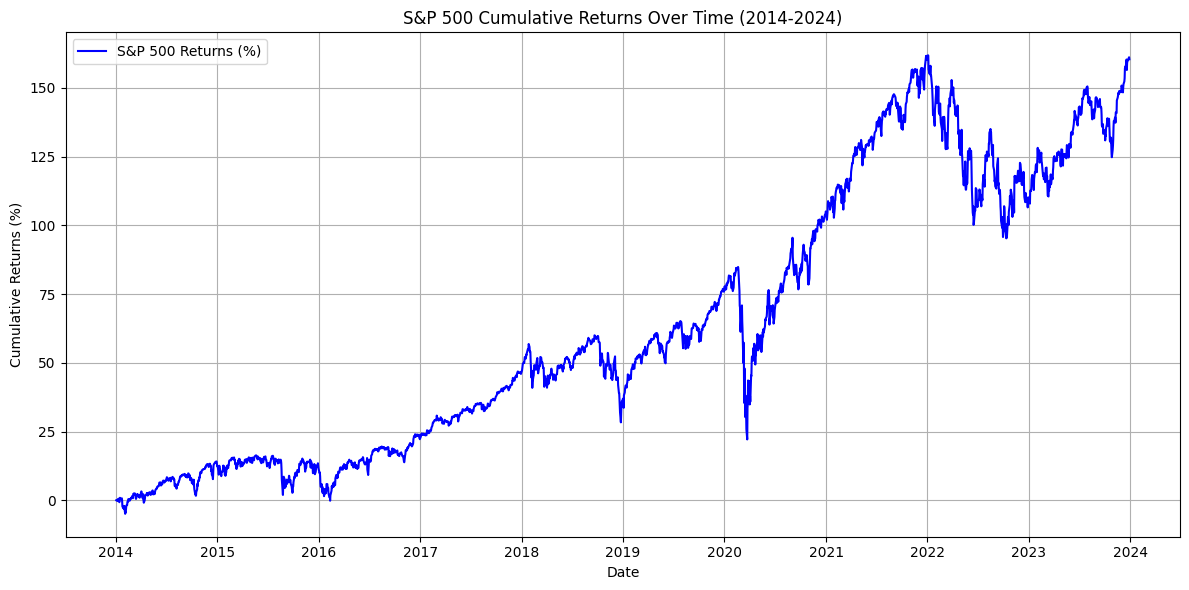

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch S&P 500 data
print("Fetching S&P 500 data...")
sp500_data = yf.download("^GSPC", start="2014-01-01", end="2024-01-01")[["Adj Close"]]
sp500_data.columns = ["SP500"]

# Initialize portfolio parameters
initial_investment = 1_000_000
sp500_data["Portfolio Value"] = initial_investment * (sp500_data["SP500"] / sp500_data["SP500"].iloc[0])

# Calculate cumulative returns as a percentage
sp500_data["Cumulative Returns (%)"] = (sp500_data["Portfolio Value"] / sp500_data["Portfolio Value"].iloc[0] - 1) * 100

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data["Cumulative Returns (%)"], label='S&P 500 Returns (%)', color='blue')
plt.title("S&P 500 Cumulative Returns Over Time (2014-2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Inspect column names
print(data.columns)

# Adjust `valid_tickers` if column names include prefixes
adj_close_prices = data[[col for col in data.columns if any(ticker in col for ticker in stock_tickers + bond_tickers)]]

# Print the filtered columns to verify
print(adj_close_prices.columns)


Index(['NVDA_Adj Close', 'NVDA_Volume', 'NVDA_20-Day MA', 'NVDA_50-Day MA',
       'NVDA_200-Day MA', 'NVDA_20-Day Volatility', 'NVDA_200-Day Volatility',
       'NVDA_RSI', 'NVDA_Daily Returns', 'NVDA_Log Returns',
       ...
       'TIP_20-Day MA', 'TIP_50-Day MA', 'TIP_200-Day MA',
       'TIP_20-Day Volatility', 'TIP_200-Day Volatility', 'TIP_RSI',
       'TIP_Daily Returns', 'TIP_Log Returns', 'TIP_Weekly Returns',
       'TIP_Monthly Returns'],
      dtype='object', length=192)
Index(['NVDA_Adj Close', 'NVDA_Volume', 'NVDA_20-Day MA', 'NVDA_50-Day MA',
       'NVDA_200-Day MA', 'NVDA_20-Day Volatility', 'NVDA_200-Day Volatility',
       'NVDA_RSI', 'NVDA_Daily Returns', 'NVDA_Log Returns',
       ...
       'TIP_20-Day MA', 'TIP_50-Day MA', 'TIP_200-Day MA',
       'TIP_20-Day Volatility', 'TIP_200-Day Volatility', 'TIP_RSI',
       'TIP_Daily Returns', 'TIP_Log Returns', 'TIP_Weekly Returns',
       'TIP_Monthly Returns'],
      dtype='object', length=180)


In [ ]:
print(sp500_data.head())


                 Price        SP500  SP500 Daily Returns  SP500 Log Returns  \
0               Ticker        ^GSPC                  NaN                NaN   
1                 Date          NaN                  NaN                NaN   
2  2014-01-02 00:00:00   1831.97998                  NaN                NaN   
3  2014-01-03 00:00:00  1831.369995            -0.000333          -0.000333   
4  2014-01-06 00:00:00   1826.77002            -0.002512          -0.002515   

   20-Day MA  50-Day MA  200-Day MA  20-Day Volatility  200-Day Volatility  \
0        NaN        NaN         NaN                NaN                 NaN   
1        NaN        NaN         NaN                NaN                 NaN   
2        NaN        NaN         NaN                NaN                 NaN   
3        NaN        NaN         NaN                NaN                 NaN   
4        NaN        NaN         NaN                NaN                 NaN   

   RSI  
0  NaN  
1  NaN  
2  NaN  
3  0.0  
4  0.0  


In [ ]:
sp500_data.reset_index(inplace=True)
sp500_data.rename(columns={'index': 'Date'}, inplace=True)  # Rename if necessary


In [ ]:
print(sp500_data.head())


   Date                Price        SP500  SP500 Daily Returns  \
0     0               Ticker        ^GSPC                  NaN   
1     1                 Date          NaN                  NaN   
2     2  2014-01-02 00:00:00   1831.97998                  NaN   
3     3  2014-01-03 00:00:00  1831.369995            -0.000333   
4     4  2014-01-06 00:00:00   1826.77002            -0.002512   

   SP500 Log Returns  20-Day MA  50-Day MA  200-Day MA  20-Day Volatility  \
0                NaN        NaN        NaN         NaN                NaN   
1                NaN        NaN        NaN         NaN                NaN   
2                NaN        NaN        NaN         NaN                NaN   
3          -0.000333        NaN        NaN         NaN                NaN   
4          -0.002515        NaN        NaN         NaN                NaN   

   200-Day Volatility  RSI  
0                 NaN  NaN  
1                 NaN  NaN  
2                 NaN  NaN  
3                 NaN  0

In [ ]:
import pandas as pd

# Load the portfolio and S&P 500 data
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'

portfolio_data = pd.read_excel(portfolio_data_path)
sp500_data = pd.read_excel(sp500_data_path)

# Strip spaces in column names
portfolio_data.rename(columns=lambda x: x.strip(), inplace=True)
sp500_data.rename(columns=lambda x: x.strip(), inplace=True)

# Handle S&P 500 Date
if 'Date' not in sp500_data.columns:
    sp500_data.reset_index(inplace=True)  # Reset index if Date is missing
    sp500_data.rename(columns={'index': 'Date'}, inplace=True)

# Convert 'Date' to datetime format
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop rows with invalid dates
portfolio_data = portfolio_data.dropna(subset=['Date'])
sp500_data = sp500_data.dropna(subset=['Date'])

# Set 'Date' as the index
portfolio_data.set_index('Date', inplace=True)
sp500_data.set_index('Date', inplace=True)

# Verify cleaned data
print(portfolio_data.head())
print(sp500_data.head())


            Portfolio Value  NVDA Weight  GOOGL Weight  ABBV Weight  \
Date                                                                  
2014-01-02   1000000.000000         0.06          0.06         0.06   
2014-01-03    999214.355059         0.06          0.06         0.06   
2014-01-06    996779.414115         0.06          0.06         0.06   
2014-01-07    999027.938870         0.06          0.06         0.06   
2014-01-08    998579.125046         0.06          0.06         0.06   

            NKE Weight  COST Weight  DUK Weight  JPM Weight  AXP Weight  \
Date                                                                      
2014-01-02        0.06         0.06        0.06        0.06        0.06   
2014-01-03        0.06         0.06        0.06        0.06        0.06   
2014-01-06        0.06         0.06        0.06        0.06        0.06   
2014-01-07        0.06         0.06        0.06        0.06        0.06   
2014-01-08        0.06         0.06        0.06     

<ipython-input-12-281ea98b0355>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')


In [ ]:
import pandas as pd

# Load the portfolio and S&P 500 data
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'

portfolio_data = pd.read_excel(portfolio_data_path)
sp500_data = pd.read_excel(sp500_data_path)

# Strip spaces in column names
portfolio_data.rename(columns=lambda x: x.strip(), inplace=True)
sp500_data.rename(columns=lambda x: x.strip(), inplace=True)

# Handle missing 'Date' in S&P 500 data
if 'Date' not in sp500_data.columns:
    sp500_data.reset_index(inplace=True)  # Reset the index if 'Date' is missing
    sp500_data.rename(columns={'index': 'Date'}, inplace=True)  # Rename index column to 'Date'

# Handle missing 'Date' in portfolio data
if 'Date' not in portfolio_data.columns:
    raise KeyError("The 'Date' column is missing in the portfolio_data.")

# Remove invalid rows with "Ticker" or "Date" in the portfolio 'Date' column
portfolio_data = portfolio_data[~portfolio_data['Date'].astype(str).str.contains("Ticker|Date", na=False)]
portfolio_data.loc[:, 'Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')

# Convert 'Date' to datetime in S&P 500 data
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop rows with invalid dates
portfolio_data.dropna(subset=['Date'], inplace=True)
sp500_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
portfolio_data.set_index('Date', inplace=True)
sp500_data.set_index('Date', inplace=True)

# Verify cleaned data
print(portfolio_data.head())
print(sp500_data.head())


            Portfolio Value  NVDA Weight  GOOGL Weight  ABBV Weight  \
Date                                                                  
2014-01-02   1000000.000000         0.06          0.06         0.06   
2014-01-03    999214.355059         0.06          0.06         0.06   
2014-01-06    996779.414115         0.06          0.06         0.06   
2014-01-07    999027.938870         0.06          0.06         0.06   
2014-01-08    998579.125046         0.06          0.06         0.06   

            NKE Weight  COST Weight  DUK Weight  JPM Weight  AXP Weight  \
Date                                                                      
2014-01-02        0.06         0.06        0.06        0.06        0.06   
2014-01-03        0.06         0.06        0.06        0.06        0.06   
2014-01-06        0.06         0.06        0.06        0.06        0.06   
2014-01-07        0.06         0.06        0.06        0.06        0.06   
2014-01-08        0.06         0.06        0.06     

<ipython-input-13-60c4a866e178>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_data.dropna(subset=['Date'], inplace=True)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [ ]:
print("S&P 500 Data Columns:", sp500_data.columns)
print("S&P 500 Data Index Name:", sp500_data.index.name)
print(sp500_data.head())


S&P 500 Data Columns: Index(['Price', 'SP500', 'SP500 Daily Returns', 'SP500 Log Returns',
       '20-Day MA', '50-Day MA', '200-Day MA', '20-Day Volatility',
       '200-Day Volatility', 'RSI'],
      dtype='object')
S&P 500 Data Index Name: Date
                                             Price        SP500  \
Date                                                              
1970-01-01 00:00:00.000000000               Ticker        ^GSPC   
1970-01-01 00:00:00.000000001                 Date          NaN   
1970-01-01 00:00:00.000000002  2014-01-02 00:00:00   1831.97998   
1970-01-01 00:00:00.000000003  2014-01-03 00:00:00  1831.369995   
1970-01-01 00:00:00.000000004  2014-01-06 00:00:00   1826.77002   

                               SP500 Daily Returns  SP500 Log Returns  \
Date                                                                    
1970-01-01 00:00:00.000000000                  NaN                NaN   
1970-01-01 00:00:00.000000001                  NaN             

In [ ]:
import pandas as pd

# Load the S&P 500 data
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'

sp500_data = pd.read_excel(sp500_data_path)

# Debugging: Inspect the structure
print("S&P 500 Data Structure:")
print(sp500_data.head())
print("S&P 500 Data Columns:", sp500_data.columns)
print("S&P 500 Data Index:", sp500_data.index)

# Reset index if necessary
if sp500_data.index.name:
    sp500_data.reset_index(inplace=True)
    sp500_data.rename(columns={sp500_data.index.name: 'Date'}, inplace=True)

# Handle missing 'Date' column
if 'Date' not in sp500_data.columns:
    # If Date is missing, manually construct or assign it
    sp500_data['Date'] = pd.date_range(start='2014-01-01', periods=len(sp500_data), freq='B')

# Convert 'Date' to datetime
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop invalid dates
sp500_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
sp500_data.set_index('Date', inplace=True)

# Confirm the cleaned data
print("S&P 500 Data Head:")
print(sp500_data.head())


S&P 500 Data Structure:
                 Price        SP500  SP500 Daily Returns  SP500 Log Returns  \
0               Ticker        ^GSPC                  NaN                NaN   
1                 Date          NaN                  NaN                NaN   
2  2014-01-02 00:00:00   1831.97998                  NaN                NaN   
3  2014-01-03 00:00:00  1831.369995            -0.000333          -0.000333   
4  2014-01-06 00:00:00   1826.77002            -0.002512          -0.002515   

   20-Day MA  50-Day MA  200-Day MA  20-Day Volatility  200-Day Volatility  \
0        NaN        NaN         NaN                NaN                 NaN   
1        NaN        NaN         NaN                NaN                 NaN   
2        NaN        NaN         NaN                NaN                 NaN   
3        NaN        NaN         NaN                NaN                 NaN   
4        NaN        NaN         NaN                NaN                 NaN   

   RSI  
0  NaN  
1  NaN  
2  Na

In [ ]:
import pandas as pd

# Load the S&P 500 data
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'
sp500_data = pd.read_excel(sp500_data_path)

# Drop the first two rows containing metadata
sp500_data = sp500_data.iloc[2:].reset_index(drop=True)

# Rename the 'Price' column to 'Date'
sp500_data.rename(columns={'Price': 'Date'}, inplace=True)

# Convert the 'Date' column to datetime format
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

# Drop rows with invalid dates
sp500_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
sp500_data.set_index('Date', inplace=True)

# Confirm the cleaned data
print("Cleaned S&P 500 Data:")
print(sp500_data.head())

# Save the data to an Excel file
sp500_output_path = 'sp500_data_with_metrics_cleaned.xlsx'
sp500_data.to_excel(sp500_output_path)

print(f"S&P 500 data with cleaned metrics saved to '{sp500_output_path}'.")


Cleaned S&P 500 Data:
                  SP500  SP500 Daily Returns  SP500 Log Returns  20-Day MA  \
Date                                                                         
2014-01-02   1831.97998                  NaN                NaN        NaN   
2014-01-03  1831.369995            -0.000333          -0.000333        NaN   
2014-01-06   1826.77002            -0.002512          -0.002515        NaN   
2014-01-07  1837.880005             0.006082           0.006063        NaN   
2014-01-08   1837.48999            -0.000212          -0.000212        NaN   

            50-Day MA  200-Day MA  20-Day Volatility  200-Day Volatility  \
Date                                                                       
2014-01-02        NaN         NaN                NaN                 NaN   
2014-01-03        NaN         NaN                NaN                 NaN   
2014-01-06        NaN         NaN                NaN                 NaN   
2014-01-07        NaN         NaN                Na

<ipython-input-17-4b43935bff46>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')


          Metric   Portfolio
0        ROI (%)  256.651305
1   Sharpe Ratio    0.062158
2           Beta    0.616693
3  Treynor Ratio    0.000734


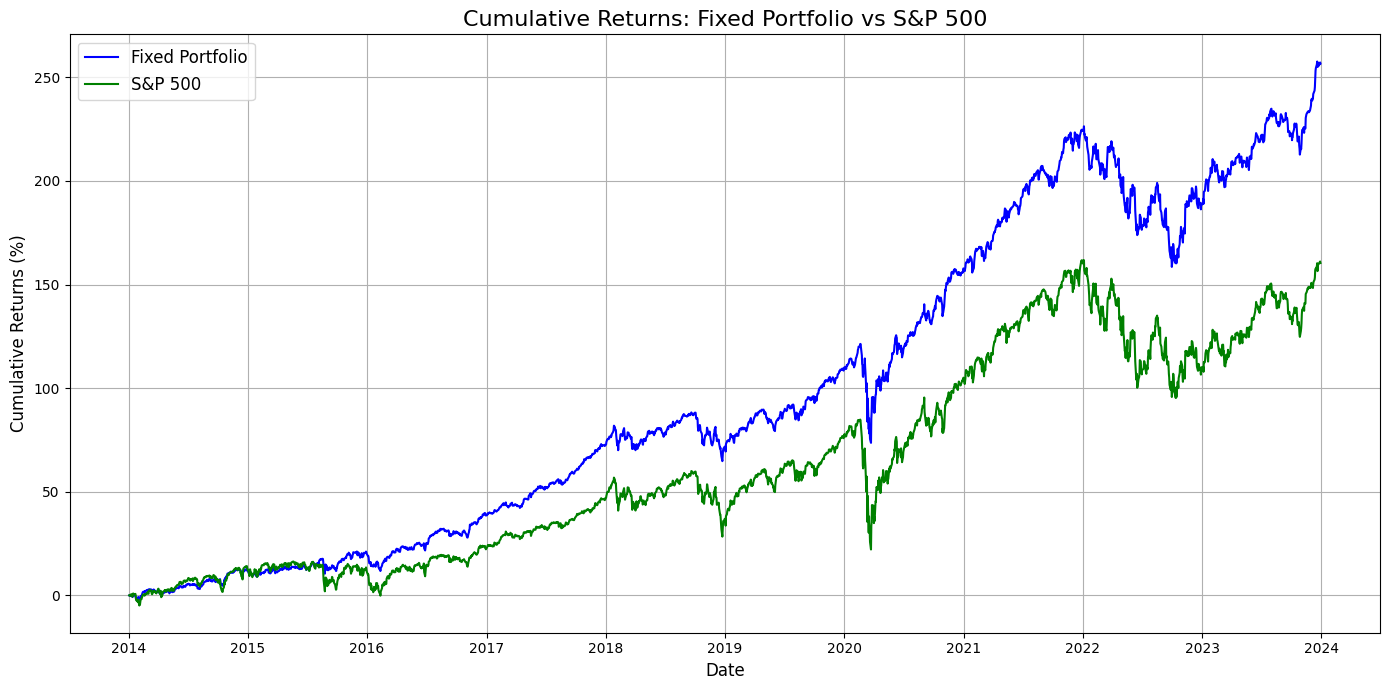

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the portfolio and S&P 500 data
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics_cleaned.xlsx'

# Load Portfolio Data
portfolio_data = pd.read_excel(portfolio_data_path)

# Remove duplicate columns
portfolio_data = portfolio_data.loc[:, ~portfolio_data.columns.duplicated()]

# Rename the first column to "Date" if necessary
if portfolio_data.columns[0] != 'Date':
    portfolio_data.rename(columns={portfolio_data.columns[0]: 'Date'}, inplace=True)

# Drop non-date rows and duplicates
portfolio_data = portfolio_data[portfolio_data['Date'] != 'Ticker']
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
portfolio_data.dropna(subset=['Date'], inplace=True)
portfolio_data.drop_duplicates(subset='Date', keep='first', inplace=True)

# Set the "Date" column as the index
portfolio_data.set_index('Date', inplace=True)

# Load S&P 500 Data
sp500_data = pd.read_excel(sp500_data_path)

# Remove duplicate columns
sp500_data = sp500_data.loc[:, ~sp500_data.columns.duplicated()]

# Rename the first column to "Date" if necessary
if sp500_data.columns[0] != 'Date':
    sp500_data.rename(columns={sp500_data.columns[0]: 'Date'}, inplace=True)

# Drop non-date rows and duplicates
sp500_data = sp500_data[sp500_data['Date'] != 'Ticker']
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')
sp500_data.dropna(subset=['Date'], inplace=True)
sp500_data.drop_duplicates(subset='Date', keep='first', inplace=True)

# Set the "Date" column as the index
sp500_data.set_index('Date', inplace=True)

# Align the datasets
data = portfolio_data.merge(sp500_data[['SP500', 'SP500 Daily Returns']], left_index=True, right_index=True, how='inner')

# Check if merged data is valid
if data.empty:
    raise ValueError("The merged DataFrame is empty. Ensure the data has overlapping dates.")

# Calculate daily returns for the portfolio
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()

# Portfolio Metrics Calculation
initial_value = data['Portfolio Value'].iloc[0]
final_value = data['Portfolio Value'].iloc[-1]

# Metrics (ROI, Sharpe Ratio, Beta, Treynor Ratio)
portfolio_roi = (final_value / initial_value - 1) * 100
portfolio_avg_return = data['Portfolio Daily Returns'].mean()
portfolio_std_dev = data['Portfolio Daily Returns'].std()
risk_free_rate = 0.02 / 252
portfolio_sharpe_ratio = (portfolio_avg_return - risk_free_rate) / portfolio_std_dev

sp500_avg_return = data['SP500 Daily Returns'].mean()
sp500_std_dev = data['SP500 Daily Returns'].std()
covariance = data['Portfolio Daily Returns'].cov(data['SP500 Daily Returns'])
variance_sp500 = data['SP500 Daily Returns'].var()
portfolio_beta = covariance / variance_sp500
portfolio_treynor_ratio = (portfolio_avg_return - risk_free_rate) / portfolio_beta

# Compile metrics
metrics = {
    "Metric": ["ROI (%)", "Sharpe Ratio", "Beta", "Treynor Ratio"],
    "Portfolio": [portfolio_roi, portfolio_sharpe_ratio, portfolio_beta, portfolio_treynor_ratio],
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Save metrics
metrics_df.to_excel('portfolio_metrics_analysis.xlsx', index=False)

# Visualization: Cumulative Returns
data['Cumulative Portfolio Returns'] = (1 + data['Portfolio Daily Returns']).cumprod() - 1
data['Cumulative S&P 500 Returns'] = (1 + data['SP500 Daily Returns']).cumprod() - 1

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Portfolio Returns'] * 100, label='Fixed Portfolio', color='blue')
plt.plot(data.index, data['Cumulative S&P 500 Returns'] * 100, label='S&P 500', color='green')
plt.title('Cumulative Returns: Fixed Portfolio vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-18-4b43935bff46>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')


          Metric   Portfolio
0        ROI (%)  256.651305
1   Sharpe Ratio    0.062158
2           Beta    0.616693
3  Treynor Ratio    0.000734


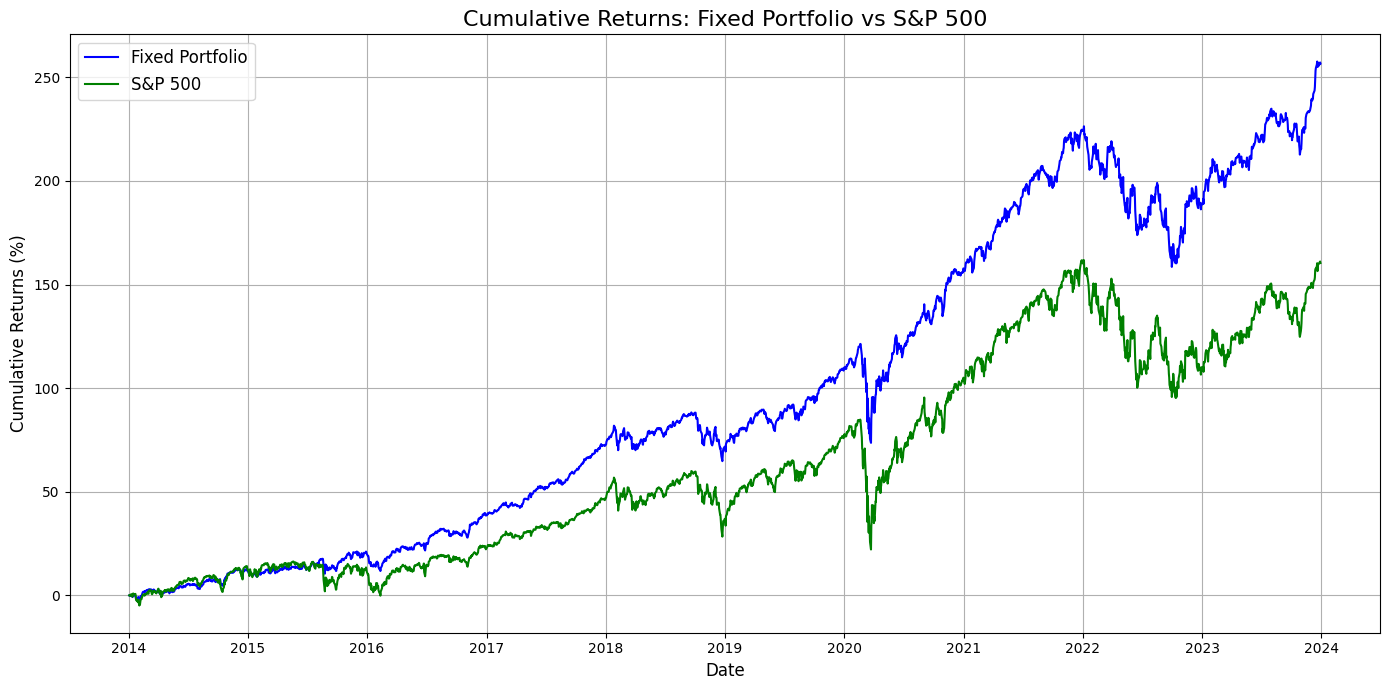

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the portfolio and S&P 500 data
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics_cleaned.xlsx'

# Load Portfolio Data
portfolio_data = pd.read_excel(portfolio_data_path)

# Remove duplicate columns
portfolio_data = portfolio_data.loc[:, ~portfolio_data.columns.duplicated()]

# Rename the first column to "Date" if necessary
if portfolio_data.columns[0] != 'Date':
    portfolio_data.rename(columns={portfolio_data.columns[0]: 'Date'}, inplace=True)

# Drop non-date rows and duplicates
portfolio_data = portfolio_data[portfolio_data['Date'] != 'Ticker']
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
portfolio_data.dropna(subset=['Date'], inplace=True)
portfolio_data.drop_duplicates(subset='Date', keep='first', inplace=True)

# Set the "Date" column as the index
portfolio_data.set_index('Date', inplace=True)

# Load S&P 500 Data
sp500_data = pd.read_excel(sp500_data_path)

# Remove duplicate columns
sp500_data = sp500_data.loc[:, ~sp500_data.columns.duplicated()]

# Rename the first column to "Date" if necessary
if sp500_data.columns[0] != 'Date':
    sp500_data.rename(columns={sp500_data.columns[0]: 'Date'}, inplace=True)

# Drop non-date rows and duplicates
sp500_data = sp500_data[sp500_data['Date'] != 'Ticker']
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')
sp500_data.dropna(subset=['Date'], inplace=True)
sp500_data.drop_duplicates(subset='Date', keep='first', inplace=True)

# Set the "Date" column as the index
sp500_data.set_index('Date', inplace=True)

# Align the datasets
data = portfolio_data.merge(sp500_data[['SP500', 'SP500 Daily Returns']], left_index=True, right_index=True, how='inner')

# Check if merged data is valid
if data.empty:
    raise ValueError("The merged DataFrame is empty. Ensure the data has overlapping dates.")

# Calculate daily returns for the portfolio
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()

# Portfolio Metrics Calculation
initial_value = data['Portfolio Value'].iloc[0]
final_value = data['Portfolio Value'].iloc[-1]

# Metrics (ROI, Sharpe Ratio, Beta, Treynor Ratio)
portfolio_roi = (final_value / initial_value - 1) * 100
portfolio_avg_return = data['Portfolio Daily Returns'].mean()
portfolio_std_dev = data['Portfolio Daily Returns'].std()
risk_free_rate = 0.02 / 252
portfolio_sharpe_ratio = (portfolio_avg_return - risk_free_rate) / portfolio_std_dev

sp500_avg_return = data['SP500 Daily Returns'].mean()
sp500_std_dev = data['SP500 Daily Returns'].std()
covariance = data['Portfolio Daily Returns'].cov(data['SP500 Daily Returns'])
variance_sp500 = data['SP500 Daily Returns'].var()
portfolio_beta = covariance / variance_sp500
portfolio_treynor_ratio = (portfolio_avg_return - risk_free_rate) / portfolio_beta

# Compile metrics
metrics = {
    "Metric": ["ROI (%)", "Sharpe Ratio", "Beta", "Treynor Ratio"],
    "Portfolio": [portfolio_roi, portfolio_sharpe_ratio, portfolio_beta, portfolio_treynor_ratio],
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Save metrics
metrics_df.to_excel('portfolio_metrics_analysis.xlsx', index=False)

# Visualization: Cumulative Returns
data['Cumulative Portfolio Returns'] = (1 + data['Portfolio Daily Returns']).cumprod() - 1
data['Cumulative S&P 500 Returns'] = (1 + data['SP500 Daily Returns']).cumprod() - 1

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Portfolio Returns'] * 100, label='Fixed Portfolio', color='blue')
plt.plot(data.index, data['Cumulative S&P 500 Returns'] * 100, label='S&P 500', color='green')
plt.title('Cumulative Returns: Fixed Portfolio vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-72-8f282158624a>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')


Portfolio metrics over time saved to 'stocks_bonds_portfolio_metrics_over_time.xlsx'.


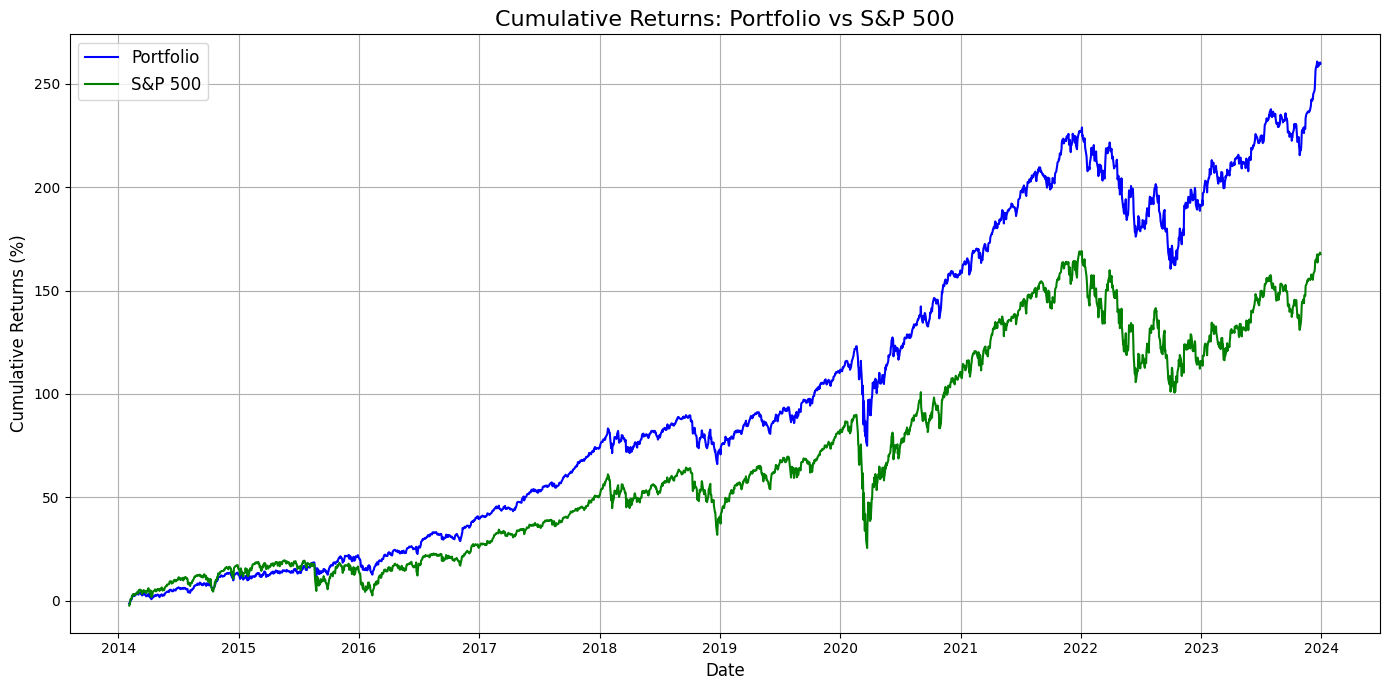

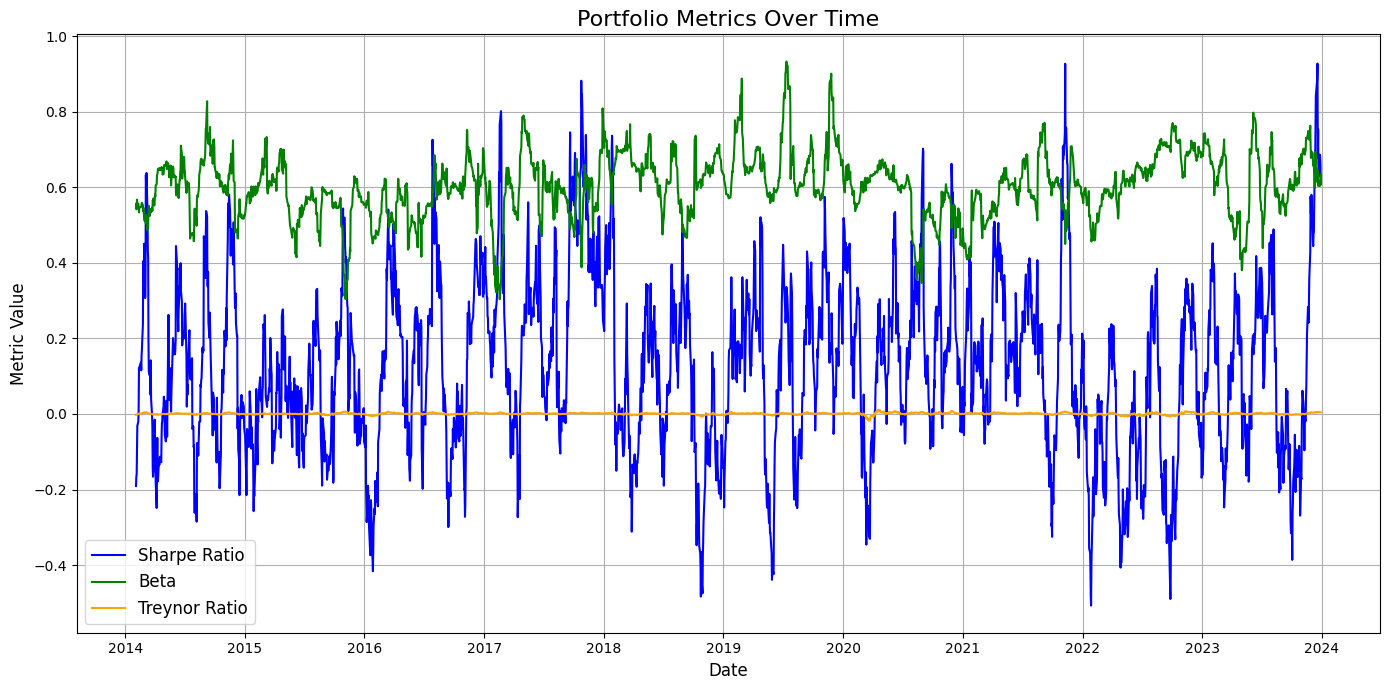

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load portfolio and S&P 500 data
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics_cleaned.xlsx'

portfolio_data = pd.read_excel(portfolio_data_path)
sp500_data = pd.read_excel(sp500_data_path)

# Ensure 'Date' columns are datetime and align indices
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

portfolio_data.dropna(subset=['Date'], inplace=True)
sp500_data.dropna(subset=['Date'], inplace=True)

portfolio_data.set_index('Date', inplace=True)
sp500_data.set_index('Date', inplace=True)

# Align portfolio and S&P 500 data
data = portfolio_data.merge(sp500_data[['SP500', 'SP500 Daily Returns']], left_index=True, right_index=True, how="inner")

# Calculate portfolio daily returns
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()

# Risk-free rate (annualized, converted to daily)
risk_free_rate = 0.02 / 252  # Assume 2% annual risk-free rate

# Rolling window size
rolling_window = 21  # 21 trading days (~1 month)

# Calculate rolling metrics
data['Portfolio Sharpe Ratio'] = (
    (data['Portfolio Daily Returns'].rolling(rolling_window).mean() - risk_free_rate) /
    data['Portfolio Daily Returns'].rolling(rolling_window).std()
)

# Calculate Beta explicitly
rolling_covariance = (
    data['Portfolio Daily Returns']
    .rolling(rolling_window)
    .cov(data['SP500 Daily Returns'])
)

rolling_variance_sp500 = data['SP500 Daily Returns'].rolling(rolling_window).var()
data['Portfolio Beta'] = rolling_covariance / rolling_variance_sp500

data['Portfolio Treynor Ratio'] = (
    (data['Portfolio Daily Returns'].rolling(rolling_window).mean() - risk_free_rate) /
    data['Portfolio Beta']
)

data['Portfolio Std Dev'] = data['Portfolio Daily Returns'].rolling(rolling_window).std()

# Drop rows with NaN values resulting from rolling calculations
data.dropna(inplace=True)

# Save results to Excel
output_file = 'stocks_bonds_portfolio_metrics_over_time.xlsx'
data[['Portfolio Sharpe Ratio', 'Portfolio Beta', 'Portfolio Treynor Ratio', 'Portfolio Std Dev']].to_excel(output_file)

print(f"Portfolio metrics over time saved to '{output_file}'.")

# Visualization: Cumulative Returns and Metrics Over Time
data['Cumulative Portfolio Returns'] = (1 + data['Portfolio Daily Returns']).cumprod() - 1
data['Cumulative S&P 500 Returns'] = (1 + data['SP500 Daily Returns']).cumprod() - 1

# Plot Cumulative Returns
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Cumulative Portfolio Returns'] * 100, label='Portfolio', color='blue')
plt.plot(data.index, data['Cumulative S&P 500 Returns'] * 100, label='S&P 500', color='green')
plt.title('Cumulative Returns: Portfolio vs S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

# Plot Rolling Metrics
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Portfolio Sharpe Ratio'], label='Sharpe Ratio', color='blue')
plt.plot(data.index, data['Portfolio Beta'], label='Beta', color='green')
plt.plot(data.index, data['Portfolio Treynor Ratio'], label='Treynor Ratio', color='orange')
plt.title('Portfolio Metrics Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Metric Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


Portfolio Alpha over time saved to 'stocks_bonds_portfolio_alpha_over_time.xlsx'.


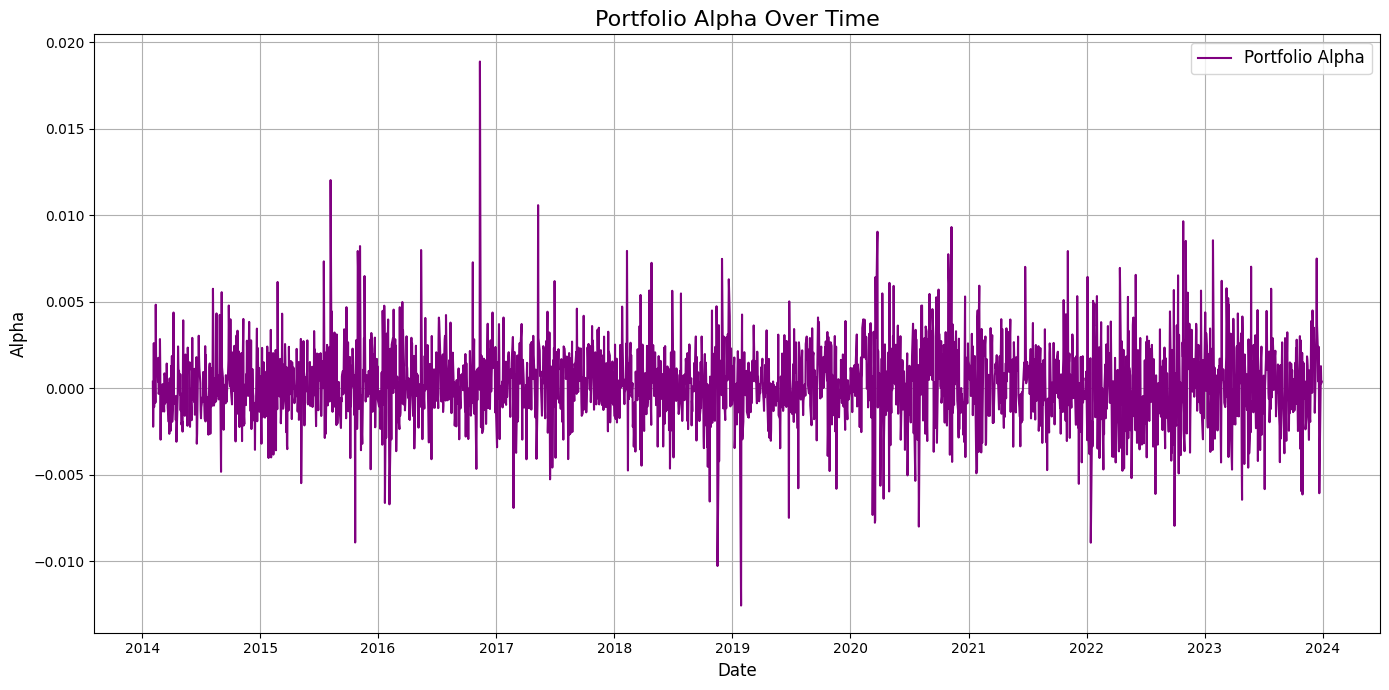

In [ ]:
# Calculate Portfolio Alpha
data['Excess Market Return'] = data['SP500 Daily Returns'] - risk_free_rate
data['Expected Portfolio Return'] = risk_free_rate + (data['Portfolio Beta'] * data['Excess Market Return'])
data['Portfolio Alpha'] = data['Portfolio Daily Returns'] - data['Expected Portfolio Return']

# Save Alpha to Excel
output_file_alpha = 'stocks_bonds_portfolio_alpha_over_time.xlsx'
data[['Portfolio Alpha']].to_excel(output_file_alpha)

print(f"Portfolio Alpha over time saved to '{output_file_alpha}'.")

# Visualization: Alpha Over Time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Portfolio Alpha'], label='Portfolio Alpha', color='purple')
plt.title('Portfolio Alpha Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Alpha', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
# Reset the index if necessary
if 'Date' not in portfolio_data.columns:
    portfolio_data.reset_index(inplace=True)

# Rename the date column if needed
if 'YourDateColumn' in portfolio_data.columns:
    portfolio_data.rename(columns={'YourDateColumn': 'Date'}, inplace=True)

# Convert to datetime
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')

# Drop invalid dates
portfolio_data.dropna(subset=['Date'], inplace=True)

# Set as index
portfolio_data.set_index('Date', inplace=True)

# Check result
print(portfolio_data.head())


            Portfolio Value  NVDA Weight  GOOGL Weight  ABBV Weight  \
Date                                                                  
2014-01-02   1000000.000000         0.06          0.06         0.06   
2014-01-03    999214.355059         0.06          0.06         0.06   
2014-01-06    996779.414115         0.06          0.06         0.06   
2014-01-07    999027.938870         0.06          0.06         0.06   
2014-01-08    998579.125046         0.06          0.06         0.06   

            NKE Weight  COST Weight  DUK Weight  JPM Weight  AXP Weight  \
Date                                                                      
2014-01-02        0.06         0.06        0.06        0.06        0.06   
2014-01-03        0.06         0.06        0.06        0.06        0.06   
2014-01-06        0.06         0.06        0.06        0.06        0.06   
2014-01-07        0.06         0.06        0.06        0.06        0.06   
2014-01-08        0.06         0.06        0.06     

In [ ]:
import numpy as np
import pandas as pd

# Set confidence level (e.g., 95% or 99%)
confidence_level = 0.95

# Calculate daily returns
portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'].pct_change()

# Drop NaN values (first return will be NaN)
portfolio_data = portfolio_data.dropna(subset=['Portfolio Daily Returns'])

# Calculate VaR
var_threshold = np.percentile(portfolio_data['Portfolio Daily Returns'], (1 - confidence_level) * 100)

# Convert to monetary terms
initial_investment = portfolio_data['Portfolio Value'].iloc[0]
var_monetary = initial_investment * abs(var_threshold)

print(f"Value at Risk (VaR) at {confidence_level*100:.0f}% confidence level: {var_threshold:.5f} ({var_monetary:.2f})")

# Save results to the DataFrame
portfolio_data['VaR'] = var_monetary

# Save to Excel
portfolio_data.to_excel('fixed_portfolio_with_var.xlsx', index=True)

print("Portfolio data with VaR saved to 'fixed_portfolio_with_var.xlsx'.")


Value at Risk (VaR) at 95% confidence level: -0.01046 (10448.92)
Portfolio data with VaR saved to 'fixed_portfolio_with_var.xlsx'.


In [ ]:
import pandas as pd
import numpy as np

# Load the fixed portfolio data
portfolio_data_path = 'fixed_portfolio_analysis.xlsx'
portfolio_data = pd.read_excel(portfolio_data_path, index_col=0)

# Ensure the index is in datetime format and properly named
portfolio_data.index = pd.to_datetime(portfolio_data.index, errors='coerce', format="%Y-%m-%d")

# Drop rows with invalid dates in the index
portfolio_data = portfolio_data[portfolio_data.index.notna()]

# Calculate daily returns
portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'].pct_change()

# Define confidence level and rolling window
confidence_level = 0.95  # 95% confidence
rolling_window = 21  # 21 trading days

# Calculate rolling VaR
portfolio_data['Rolling VaR'] = portfolio_data['Portfolio Daily Returns'].rolling(rolling_window).apply(
    lambda x: np.percentile(x, (1 - confidence_level) * 100) if len(x) == rolling_window else np.nan
)

# Convert Rolling VaR to monetary terms
portfolio_data['Monetary Rolling VaR'] = portfolio_data['Rolling VaR'] * portfolio_data['Portfolio Value']

# Calculate cumulative return
initial_value = portfolio_data['Portfolio Value'].iloc[0]
portfolio_data['Cumulative Return'] = (portfolio_data['Portfolio Value'] / initial_value) - 1

# Calculate yearly return
portfolio_data['Year'] = portfolio_data.index.year
yearly_returns = portfolio_data.groupby('Year')['Portfolio Daily Returns'].sum() * 252  # Approx. trading days per year

# Save updated portfolio data to a new Excel file
output_path = 'fixed_portfolio_with_metrics.xlsx'
portfolio_data.to_excel(output_path)

# Save yearly returns to a separate file
yearly_returns_path = 'yearly_returns.xlsx'
yearly_returns.to_excel(yearly_returns_path)

print(f"Portfolio data with metrics saved to {output_path}.")
print(f"Yearly returns saved to {yearly_returns_path}.")


Portfolio data with metrics saved to fixed_portfolio_with_metrics.xlsx.
Yearly returns saved to yearly_returns.xlsx.


In [ ]:
import pandas as pd

# Load the data
portfolio_data = pd.read_excel(portfolio_data_path)

# Inspect column names
print("Portfolio Data Columns:", portfolio_data.columns)

# Clean column names
portfolio_data.rename(columns=lambda x: x.strip(), inplace=True)

# Rename 'Date' column if necessary
if 'Date' not in portfolio_data.columns:
    if 'YourDateColumnName' in portfolio_data.columns:
        portfolio_data.rename(columns={'YourDateColumnName': 'Date'}, inplace=True)
    else:
        raise KeyError("The 'Date' column is missing in the dataset. Check the file structure.")

# Convert 'Date' to datetime
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')

# Drop rows with invalid dates
portfolio_data.dropna(subset=['Date'], inplace=True)

# Set 'Date' as the index
portfolio_data.set_index('Date', inplace=True)

# Verify structure
print(portfolio_data.head())


Portfolio Data Columns: Index(['Date', 'Portfolio Value', 'NVDA Weight', 'GOOGL Weight', 'ABBV Weight',
       'NKE Weight', 'COST Weight', 'DUK Weight', 'JPM Weight', 'AXP Weight',
       'CAT Weight', 'HD Weight', 'VGSH Weight', 'SPTS Weight', 'IEI Weight',
       'SCHI Weight', 'TIP Weight'],
      dtype='object')
            Portfolio Value  NVDA Weight  GOOGL Weight  ABBV Weight  \
Date                                                                  
2014-01-02   1000000.000000         0.06          0.06         0.06   
2014-01-03    999214.355059         0.06          0.06         0.06   
2014-01-06    996779.414115         0.06          0.06         0.06   
2014-01-07    999027.938870         0.06          0.06         0.06   
2014-01-08    998579.125046         0.06          0.06         0.06   

            NKE Weight  COST Weight  DUK Weight  JPM Weight  AXP Weight  \
Date                                                                      
2014-01-02        0.06         0.

<ipython-input-30-f2321c3b8bf9>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')


<ipython-input-42-144c0ab0480d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'].pct_change()
<ipython-input-42-144c0ab0480d>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_data['Rolling VaR (Monetary)'] = (


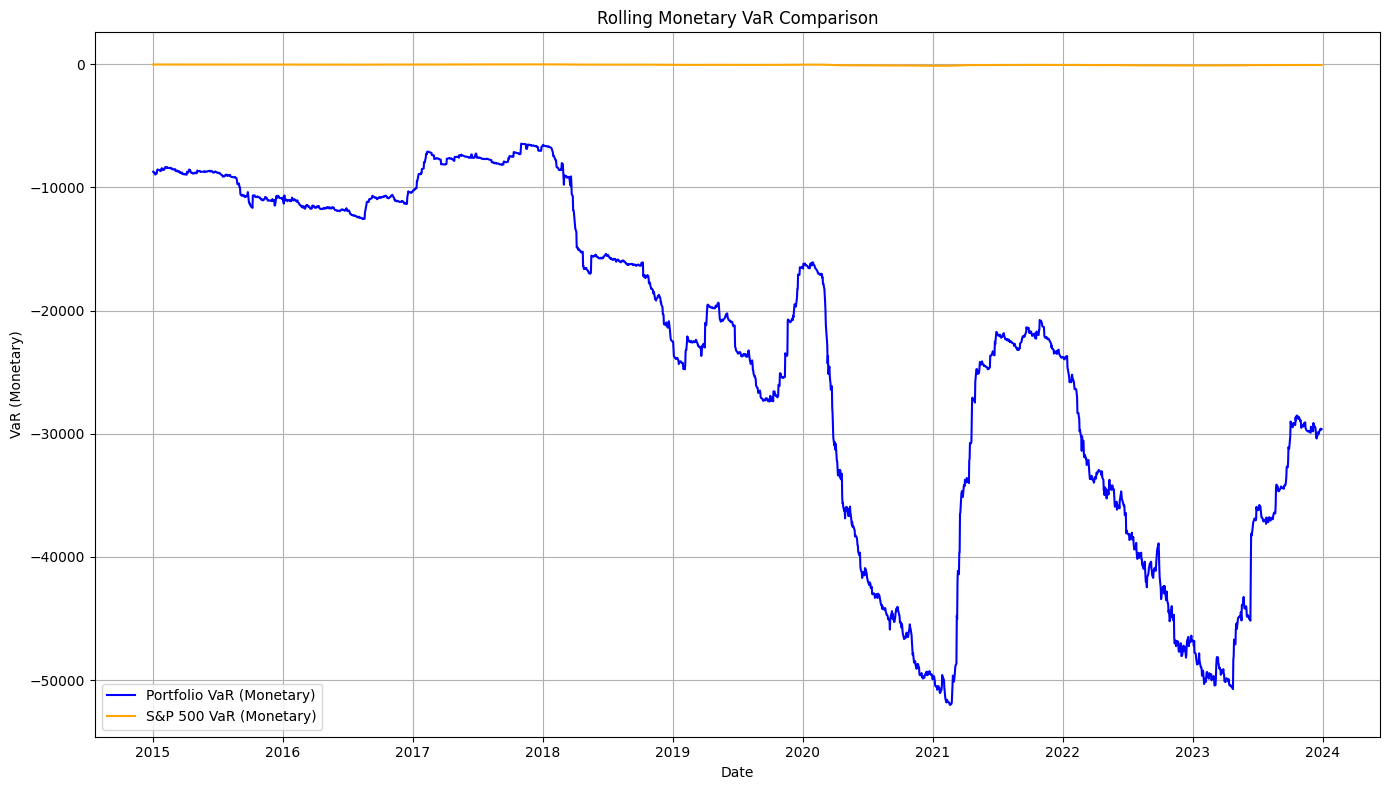

Visualization saved as 'rolling_var_comparison.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
portfolio_data_path = '/content/fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'

# Load Portfolio Data
portfolio_data = pd.read_excel(portfolio_data_path, skiprows=2)
portfolio_data.columns = [
    'Date', 'Portfolio Value', 'NVDA Weight', 'GOOGL Weight', 'ABBV Weight',
    'NKE Weight', 'COST Weight', 'DUK Weight', 'JPM Weight', 'AXP Weight',
    'CAT Weight', 'HD Weight', 'VGSH Weight', 'SPTS Weight', 'IEI Weight',
    'SCHI Weight', 'TIP Weight'
]
portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
portfolio_data.dropna(subset=['Date'], inplace=True)
portfolio_data.set_index('Date', inplace=True)

# Load S&P 500 Data
sp500_data = pd.read_excel(sp500_data_path, skiprows=2)
sp500_data.columns = [
    'Date', 'SP500', 'SP500 Daily Returns', 'SP500 Log Returns',
    '20-Day MA', '50-Day MA', '200-Day MA', '20-Day Volatility',
    '200-Day Volatility', 'RSI'
]
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')
sp500_data.dropna(subset=['Date'], inplace=True)
sp500_data.set_index('Date', inplace=True)

# Filter for the required date range
start_date = '2014-01-01'
end_date = '2024-01-01'
portfolio_data = portfolio_data.loc[start_date:end_date]
sp500_data = sp500_data.loc[start_date:end_date]

# Calculate daily returns
portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'].pct_change()
sp500_data['SP500'] = sp500_data['SP500'].astype(float)  # Ensure numeric
sp500_data['SP500 Daily Returns'] = sp500_data['SP500'].pct_change()

# Calculate rolling monetary VaR
confidence_level = 0.05  # 5% VaR
rolling_window = 252  # 1-year rolling window (252 trading days)

portfolio_data['Rolling VaR (Monetary)'] = (
    portfolio_data['Portfolio Value'] *
    portfolio_data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)
sp500_data['Rolling VaR (Monetary)'] = (
    sp500_data['SP500'] *
    sp500_data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)

# Fix SettingWithCopyWarning
portfolio_data = portfolio_data.copy()
sp500_data = sp500_data.copy()

# Visualization
plt.figure(figsize=(14, 8))

# Rolling Monetary VaR
plt.plot(portfolio_data.index, portfolio_data['Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
plt.plot(sp500_data.index, sp500_data['Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('Rolling Monetary VaR Comparison')
plt.ylabel('VaR (Monetary)')
plt.xlabel('Date')
plt.legend()
plt.grid()

# Save the chart
plt.tight_layout()
plt.savefig('rolling_var_comparison.png')
plt.show()

print("Visualization saved as 'rolling_var_comparison.png'.")


<ipython-input-46-7ccc8b99cb64>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
<ipython-input-46-7ccc8b99cb64>:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')
<ipython-input-46-7ccc8b99cb64>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'

Unique values in SP500 Rolling VaR (Monetary): [nan -25.0166512273245 -25.00814647470247 ... -65.81449584355805
 -65.83885869876055 -65.65276680973938]


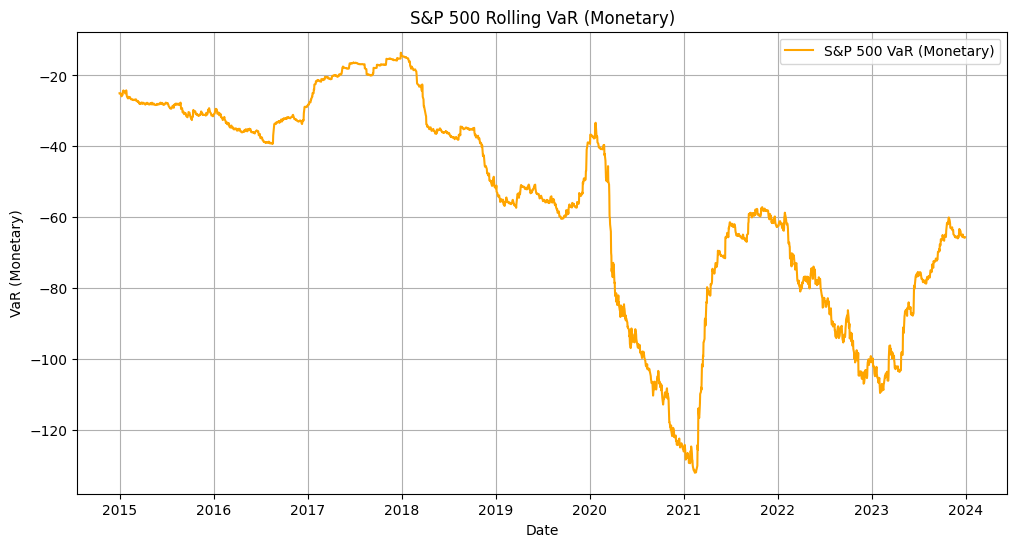

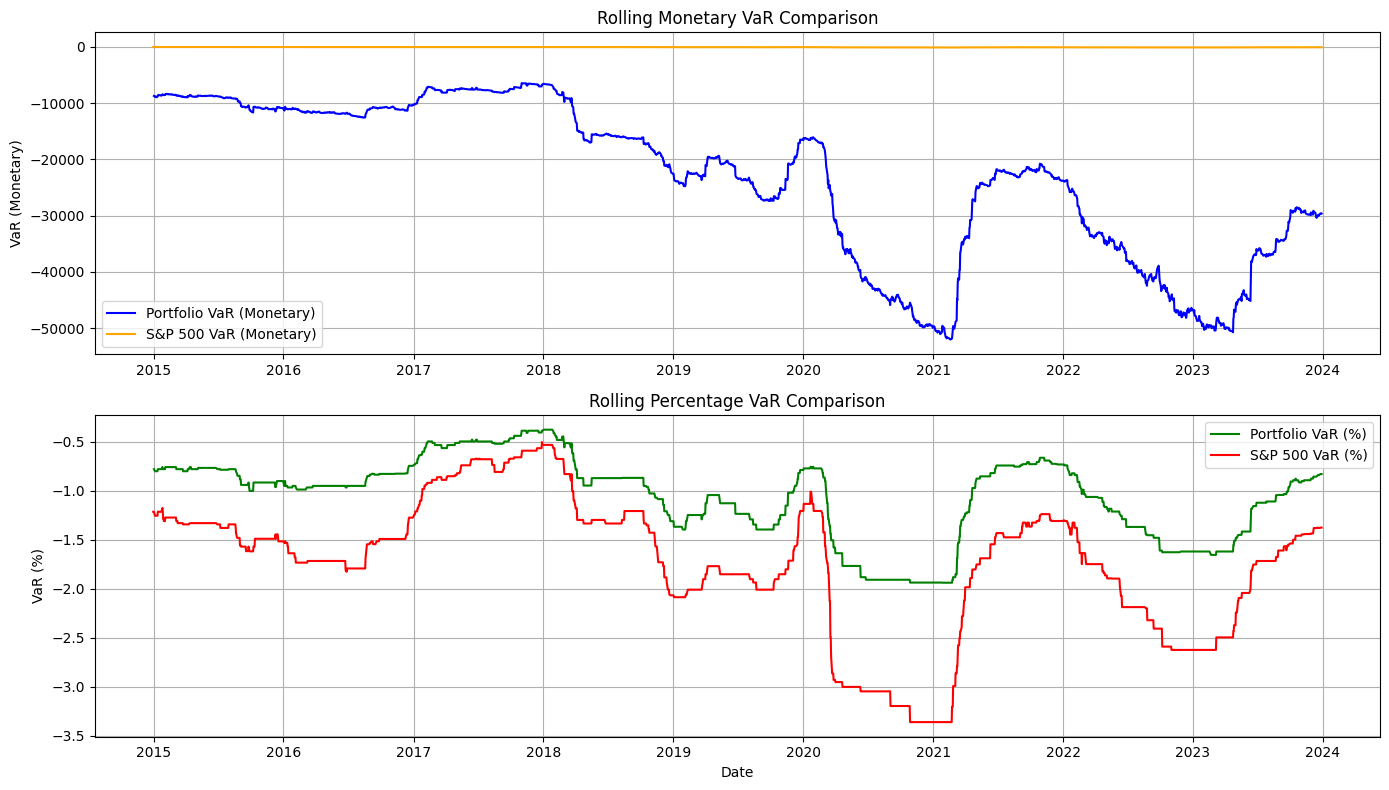

Rolling VaR comparison saved to 'portfolio_vs_sp500_var_comparison.xlsx' and visualizations saved as 'portfolio_vs_sp500_var_comparison.png'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load portfolio and S&P 500 data
portfolio_data_path = 'fixed_portfolio_analysis.xlsx'
sp500_data_path = '/content/sp500_data_with_metrics.xlsx'

# Load and inspect data
portfolio_data = pd.read_excel(portfolio_data_path)
sp500_data = pd.read_excel(sp500_data_path)

# Ensure proper column names and parse dates
if 'Date' not in portfolio_data.columns:
    portfolio_data.rename(columns={portfolio_data.columns[0]: 'Date'}, inplace=True)
if 'Date' not in sp500_data.columns:
    sp500_data.rename(columns={sp500_data.columns[0]: 'Date'}, inplace=True)

portfolio_data['Date'] = pd.to_datetime(portfolio_data['Date'], errors='coerce')
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'], errors='coerce')

portfolio_data.dropna(subset=['Date'], inplace=True)
sp500_data.dropna(subset=['Date'], inplace=True)

portfolio_data.set_index('Date', inplace=True)
sp500_data.set_index('Date', inplace=True)

# Ensure data is sorted
portfolio_data.sort_index(inplace=True)
sp500_data.sort_index(inplace=True)

# Filter data to the desired date range
start_date = '2014-01-01'
end_date = '2024-01-01'
portfolio_data = portfolio_data.loc[start_date:end_date]
sp500_data = sp500_data.loc[start_date:end_date]

# Calculate daily returns
portfolio_data['Portfolio Daily Returns'] = portfolio_data['Portfolio Value'].pct_change()
sp500_data['SP500 Daily Returns'] = sp500_data['SP500'].pct_change()

# Ensure daily returns are correctly calculated for the S&P 500
sp500_data['SP500 Daily Returns'] = sp500_data['SP500'].pct_change()

# Check for missing or invalid values in the S&P 500 daily returns
sp500_data['SP500 Daily Returns'].fillna(0, inplace=True)

# Calculate rolling VaR in monetary terms for S&P 500
confidence_level = 0.05  # 5% VaR
rolling_window = 252  # 1-year rolling window (252 trading days)


portfolio_data['Rolling VaR (Monetary)'] = (
    portfolio_data['Portfolio Value'] *
    portfolio_data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)
portfolio_data['Rolling VaR (%)'] = (
    portfolio_data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level) * 100
)

sp500_data['Rolling VaR (Monetary)'] = (
    sp500_data['SP500'] *
    sp500_data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)
sp500_data['Rolling VaR (%)'] = (
    sp500_data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level) * 100
)

# Ensure there are no constant values in the VaR
print("Unique values in SP500 Rolling VaR (Monetary):", sp500_data['Rolling VaR (Monetary)'].unique())

# Combine data for comparison
comparison_data = portfolio_data[['Portfolio Value', 'Rolling VaR (Monetary)', 'Rolling VaR (%)']].join(
    sp500_data[['SP500', 'Rolling VaR (Monetary)', 'Rolling VaR (%)']],
    how='inner',
    lsuffix='_Portfolio',
    rsuffix='_SP500'
)

# Save to Excel
comparison_data.to_excel('portfolio_vs_sp500_var_comparison.xlsx')


# Visualization to verify
plt.figure(figsize=(12, 6))
plt.plot(sp500_data.index, sp500_data['Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('S&P 500 Rolling VaR (Monetary)')
plt.ylabel('VaR (Monetary)')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.show()

# Visualization
plt.figure(figsize=(14, 8))

# Monetary VaR
plt.subplot(2, 1, 1)
plt.plot(comparison_data.index, comparison_data['Rolling VaR (Monetary)_Portfolio'], label='Portfolio VaR (Monetary)', color='blue')
plt.plot(comparison_data.index, comparison_data['Rolling VaR (Monetary)_SP500'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('Rolling Monetary VaR Comparison')
plt.ylabel('VaR (Monetary)')
plt.legend()
plt.grid()

# Percentage VaR
plt.subplot(2, 1, 2)
plt.plot(comparison_data.index, comparison_data['Rolling VaR (%)_Portfolio'], label='Portfolio VaR (%)', color='green')
plt.plot(comparison_data.index, comparison_data['Rolling VaR (%)_SP500'], label='S&P 500 VaR (%)', color='red')
plt.title('Rolling Percentage VaR Comparison')
plt.ylabel('VaR (%)')
plt.xlabel('Date')
plt.legend()
plt.grid()

# Save the visualization
plt.tight_layout()
plt.savefig('portfolio_vs_sp500_var_comparison.png')
plt.show()

print("Rolling VaR comparison saved to 'portfolio_vs_sp500_var_comparison.xlsx' and visualizations saved as 'portfolio_vs_sp500_var_comparison.png'.")


<ipython-input-57-3d8e7031aef2>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-57-3d8e7031aef2>:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SP500 Daily Returns'] = data['SP500'].pct_change()


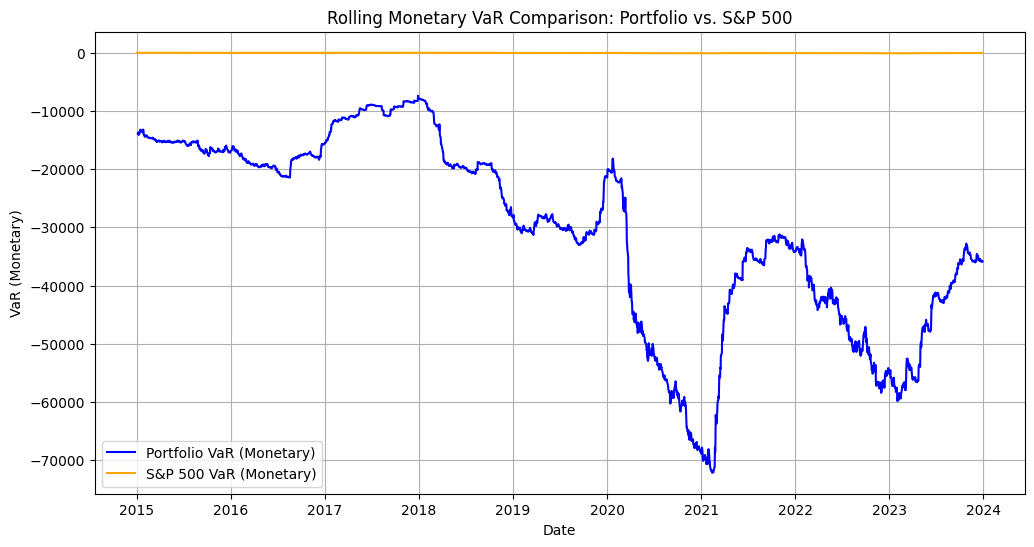

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = '/content/sp500_portfolio_analysis.xlsx'

# Load data
data = pd.read_excel(file_path)

# Check and handle the 'Date' column
if 'Date' not in data.columns:
    # Assume the first column contains date-like information
    data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

# Parse the 'Date' column
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop rows with invalid or missing dates
data = data.dropna(subset=['Date'])

# Sort data by 'Date' to ensure correct order
data = data.sort_values(by='Date')

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Filter data to the desired date range
start_date = '2014-01-01'
end_date = '2024-01-01'
data = data.loc[start_date:end_date]

# Calculate daily returns
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()
data['SP500 Daily Returns'] = data['SP500'].pct_change()

# Calculate rolling monetary VaR
confidence_level = 0.05  # 5% VaR
rolling_window = 252  # 1-year rolling window (252 trading days)

data['Portfolio Rolling VaR (Monetary)'] = (
    data['Portfolio Value'] *
    data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)

data['SP500 Rolling VaR (Monetary)'] = (
    data['SP500'] *
    data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)

# Visualization of Rolling Monetary VaR
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
plt.plot(data.index, data['SP500 Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('Rolling Monetary VaR Comparison: Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('VaR (Monetary)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File path
file_path = '/content/sp500_portfolio_analysis.xlsx'

# Load data
data = pd.read_excel(file_path)

# Check if 'Date' column exists and process it
if 'Date' not in data.columns:
    print("Error: 'Date' column is missing from the dataset!")
else:
    # Parse the 'Date' column
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Drop rows with invalid or missing dates
    data = data.dropna(subset=['Date'])

    # Sort data by 'Date' to ensure correct order
    data = data.sort_values(by='Date')

    # Set 'Date' as the index
    data.set_index('Date', inplace=True)

    # Filter data to the desired date range
    start_date = '2014-01-01'
    end_date = '2024-01-01'
    data = data.loc[start_date:end_date]

    # Calculate daily returns
    data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()
    data['SP500 Daily Returns'] = data['SP500'].pct_change()

    # Check if S&P 500 daily returns are valid
    if data['SP500 Daily Returns'].isnull().all() or data['SP500 Daily Returns'].nunique() <= 1:
        print("Error: S&P 500 Daily Returns are constant or missing!")
    else:
        # Calculate rolling monetary VaR
        confidence_level = 0.05  # 5% VaR
        rolling_window = 252  # 1-year rolling window (252 trading days)

        data['Portfolio Rolling VaR (Monetary)'] = (
            data['Portfolio Value'] *
            data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
        )

        data['SP500 Rolling VaR (Monetary)'] = (
            data['SP500'] *
            data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
        )

        # Visualization of Rolling Monetary VaR
        plt.figure(figsize=(12, 6))
        plt.plot(data.index, data['Portfolio Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
        plt.plot(data.index, data['SP500 Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
        plt.title('Rolling Monetary VaR Comparison: Portfolio vs. S&P 500')
        plt.xlabel('Date')
        plt.ylabel('VaR (Monetary)')
        plt.legend()
        plt.grid()
        plt.show()


Error: 'Date' column is missing from the dataset!


<ipython-input-61-ce53dea3e42f>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-61-ce53dea3e42f>:23: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SP500 Daily Returns'] = data['SP500'].pct_change()


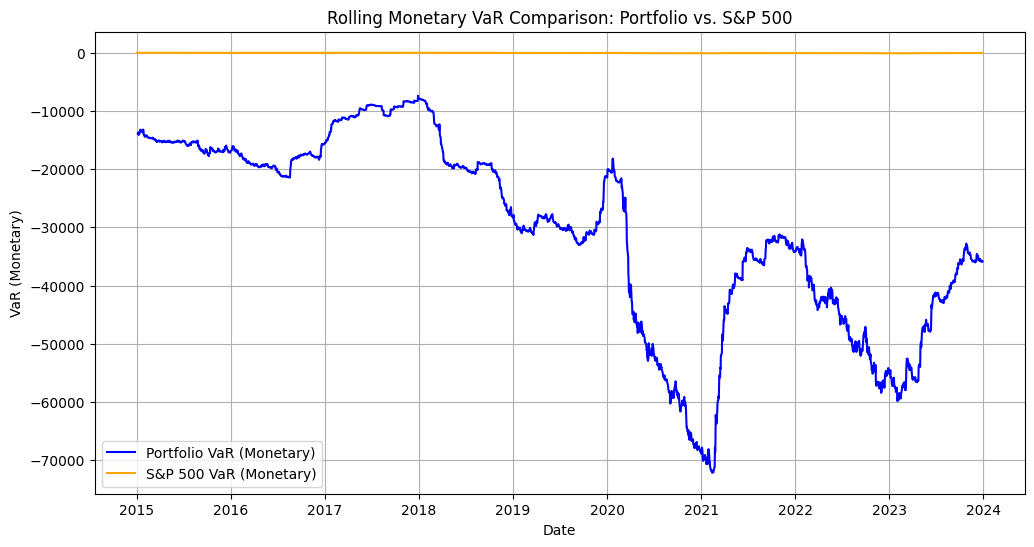

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/sp500_portfolio_analysis.xlsx'
data = pd.read_excel(file_path)

# Rename the first column to 'Date' if it isn't already
if 'Date' not in data.columns:
    data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

# Check if 'Date' is successfully added
if 'Date' not in data.columns:
    print("Error: 'Date' column is missing from the dataset!")
else:
    # Continue processing
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data = data.dropna(subset=['Date']).sort_values(by='Date')
    data.set_index('Date', inplace=True)

    # Calculate daily returns
    data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()
    data['SP500 Daily Returns'] = data['SP500'].pct_change()

    # Rolling VaR calculation
    confidence_level = 0.05
    rolling_window = 252
    data['Portfolio Rolling VaR (Monetary)'] = (
        data['Portfolio Value'] *
        data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
    )
    data['SP500 Rolling VaR (Monetary)'] = (
        data['SP500'] *
        data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
    )

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Portfolio Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
    plt.plot(data.index, data['SP500 Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
    plt.title('Rolling Monetary VaR Comparison: Portfolio vs. S&P 500')
    plt.xlabel('Date')
    plt.ylabel('VaR (Monetary)')
    plt.legend()
    plt.grid()
    plt.show()


<ipython-input-62-c73e27b4f67a>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-62-c73e27b4f67a>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SP500 Daily Returns'] = data['SP500'].pct_change()


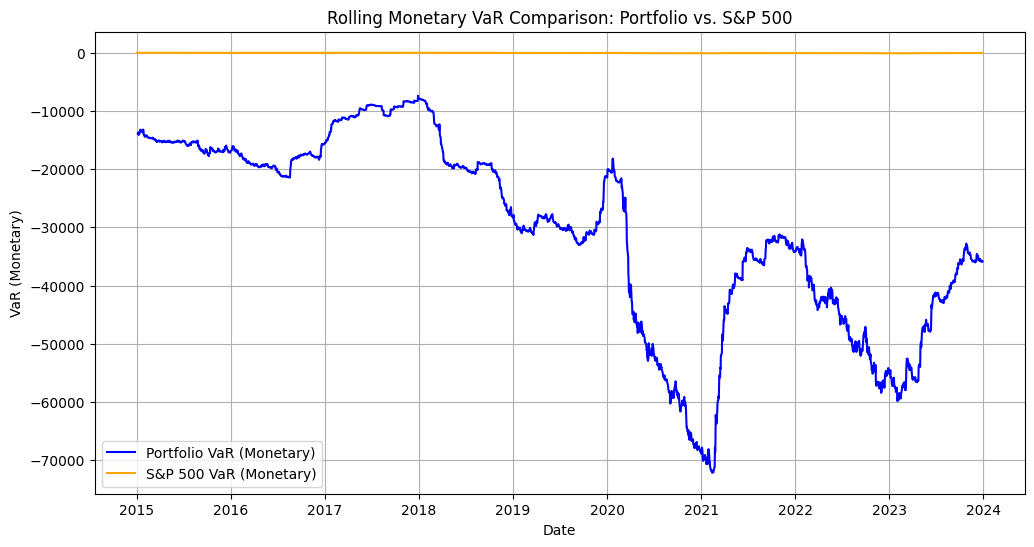

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/sp500_portfolio_analysis.xlsx'
data = pd.read_excel(file_path)

# Ensure proper date parsing
if 'Date' not in data.columns:
    data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date']).sort_values(by='Date')
data.set_index('Date', inplace=True)

# Calculate daily returns
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()
data['SP500 Daily Returns'] = data['SP500'].pct_change()

# Rolling VaR calculation
confidence_level = 0.05  # 5% confidence level
rolling_window = 252  # 1-year rolling window (252 trading days)

data['Portfolio Rolling VaR (Monetary)'] = (
    data['Portfolio Value'] *
    data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)
data['SP500 Rolling VaR (Monetary)'] = (
    data['SP500'] *
    data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
plt.plot(data.index, data['SP500 Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('Rolling Monetary VaR Comparison: Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('VaR (Monetary)')
plt.legend()
plt.grid()
plt.show()


<ipython-input-63-313080b917ad>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-63-313080b917ad>:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['SP500 Daily Returns'] = data['SP500'].pct_change()


                  SP500  SP500 Daily Returns
Date                                        
2014-01-02   1831.97998                  NaN
2014-01-03  1831.369995            -0.000333
2014-01-06   1826.77002            -0.002512
2014-01-07  1837.880005             0.006082
2014-01-08   1837.48999            -0.000212
            Portfolio Rolling VaR (Monetary) SP500 Rolling VaR (Monetary)
Date                                                                     
2014-01-02                               NaN                          NaN
2014-01-03                               NaN                          NaN
2014-01-06                               NaN                          NaN
2014-01-07                               NaN                          NaN
2014-01-08                               NaN                          NaN


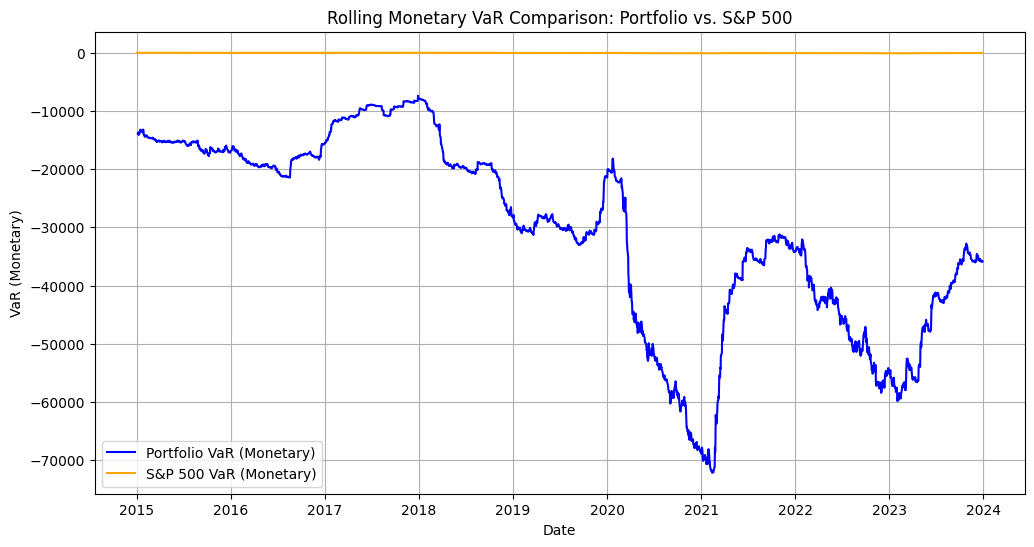

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/sp500_portfolio_analysis.xlsx'
data = pd.read_excel(file_path)

# Parse and index dates
if 'Date' not in data.columns:
    data.rename(columns={data.columns[0]: 'Date'}, inplace=True)

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data.dropna(subset=['Date']).sort_values(by='Date')
data.set_index('Date', inplace=True)

# Calculate daily returns
data['Portfolio Daily Returns'] = data['Portfolio Value'].pct_change()
data['SP500 Daily Returns'] = data['SP500'].pct_change()

# Debugging output for S&P 500 data
print(data[['SP500', 'SP500 Daily Returns']].head())

# Rolling VaR calculation
confidence_level = 0.05  # 5% VaR
rolling_window = 252  # 1-year rolling window (252 trading days)

data['Portfolio Rolling VaR (Monetary)'] = (
    data['Portfolio Value'] *
    data['Portfolio Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)
data['SP500 Rolling VaR (Monetary)'] = (
    data['SP500'] *
    data['SP500 Daily Returns'].rolling(rolling_window).quantile(confidence_level)
)

# Debugging output for VaR
print(data[['Portfolio Rolling VaR (Monetary)', 'SP500 Rolling VaR (Monetary)']].head())

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Portfolio Rolling VaR (Monetary)'], label='Portfolio VaR (Monetary)', color='blue')
plt.plot(data.index, data['SP500 Rolling VaR (Monetary)'], label='S&P 500 VaR (Monetary)', color='orange')
plt.title('Rolling Monetary VaR Comparison: Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('VaR (Monetary)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Assuming `data` is your DataFrame and 'SP500 Daily Returns' contains daily returns for S&P 500

# Define the rolling window size (e.g., 20 days for a 1-month look-back period)
rolling_window = 20

# Calculate Rolling VaR for S&P 500 using the 5th percentile
data['SP500 Rolling VaR'] = data['SP500 Daily Returns'].rolling(rolling_window).apply(
    lambda x: np.percentile(x, 5), raw=True
)

# Ensure Portfolio's Rolling VaR is calculated similarly for consistency
data['Portfolio Rolling VaR'] = data['Portfolio Daily Returns'].rolling(rolling_window).apply(
    lambda x: np.percentile(x, 5), raw=True
)

# Fill NaN values resulting from the rolling window
data.fillna(0, inplace=True)


<ipython-input-69-d985c4842d96>:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)


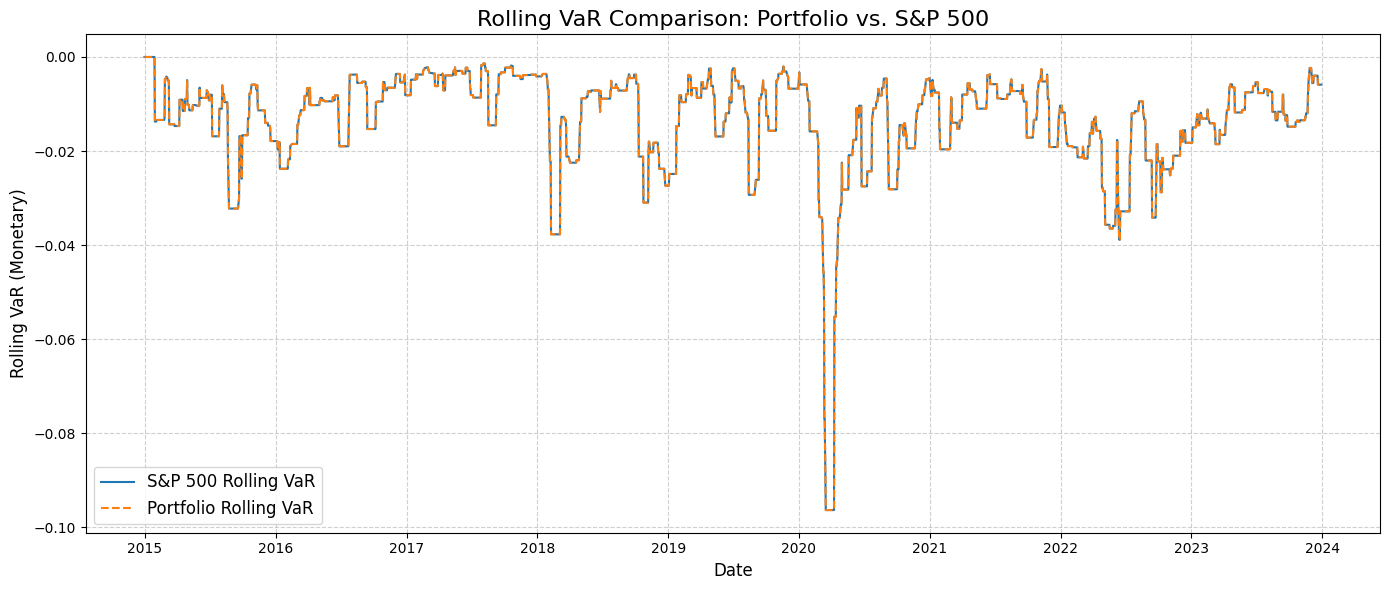

In [ ]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(14, 6))

# Plot Rolling VaR for S&P 500
plt.plot(data.index, data['SP500 Rolling VaR'], label='S&P 500 Rolling VaR', linestyle='-', linewidth=1.5)

# Plot Rolling VaR for Portfolio
plt.plot(data.index, data['Portfolio Rolling VaR'], label='Portfolio Rolling VaR', linestyle='--', linewidth=1.5)

# Add labels, title, and legend
plt.title('Rolling VaR Comparison: Portfolio vs. S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling VaR (Monetary)', fontsize=12)
plt.legend(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

# Define tickers for stocks and bonds
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
all_tickers = stock_tickers + bond_tickers

# Download adjusted close prices for stocks and bonds
data = yf.download(all_tickers, start="2015-01-01", end="2024-01-01")['Adj Close']

# Download adjusted close prices for the S&P 500 (benchmark)
sp500 = yf.download('^GSPC', start="2015-01-01", end="2024-01-01")['Adj Close']


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.columns)


Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', 'ABBV 20-day MA',
       'ABBV 50-day MA', 'ABBV 200-day MA', 'AXP 20-day MA', 'AXP 50-day MA',
       'AXP 200-day MA', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA',
       'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'DUK 20-day MA',
       'DUK 50-day MA', 'DUK 200-day MA', 'GOOGL 20-day MA', 'GOOGL 50-day MA',
       'GOOGL 200-day MA', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA',
       'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'JPM 20-day MA',
       'JPM 50-day MA', 'JPM 200-day MA', 'NKE 20-day MA', 'NKE 50-day MA',
       'NKE 200-day MA', 'NVDA 20-day MA', 'NVDA 50-day MA', 'NVDA 200-day MA',
       'SCHI 20-day MA', 'SCHI 50-day MA', 'SCHI 200-day MA', 'SPTS 20-day MA',
       'SPTS 50-day MA', 'SPTS 200-day MA', 'TIP 20-day MA', 'TIP 50-day MA',
       'TIP 200-day MA', 'VGSH 20-day MA', 'VGSH 50-day MA', 'VGSH 200-day M

In [ ]:
print(data.isna().sum())


Ticker
ABBV                          0
AXP                           0
CAT                           0
COST                          0
DUK                           0
                           ... 
SPTS 252-day Volatility    1454
TIP 63-day Volatility      1265
TIP 252-day Volatility     1454
VGSH 63-day Volatility     1265
VGSH 252-day Volatility    1454
Length: 90, dtype: int64


In [ ]:
# Calculate 20-day, 50-day, and 200-day moving averages for trend analysis
for ticker in data.columns:
    # Skip S&P 500 if it's in data.columns (it may not be in stock or bond data)
    if ticker not in stock_tickers + bond_tickers:
        continue
    data[f'{ticker} 20-day MA'] = data[ticker].rolling(window=20).mean()
    data[f'{ticker} 50-day MA'] = data[ticker].rolling(window=50).mean()
    data[f'{ticker} 200-day MA'] = data[ticker].rolling(window=200).mean()

# Check column names again
print(data.columns)


Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', 'ABBV 20-day MA',
       'ABBV 50-day MA', 'ABBV 200-day MA', 'AXP 20-day MA', 'AXP 50-day MA',
       'AXP 200-day MA', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA',
       'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'DUK 20-day MA',
       'DUK 50-day MA', 'DUK 200-day MA', 'GOOGL 20-day MA', 'GOOGL 50-day MA',
       'GOOGL 200-day MA', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA',
       'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'JPM 20-day MA',
       'JPM 50-day MA', 'JPM 200-day MA', 'NKE 20-day MA', 'NKE 50-day MA',
       'NKE 200-day MA', 'NVDA 20-day MA', 'NVDA 50-day MA', 'NVDA 200-day MA',
       'SCHI 20-day MA', 'SCHI 50-day MA', 'SCHI 200-day MA', 'SPTS 20-day MA',
       'SPTS 50-day MA', 'SPTS 200-day MA', 'TIP 20-day MA', 'TIP 50-day MA',
       'TIP 200-day MA', 'VGSH 20-day MA', 'VGSH 50-day MA', 'VGSH 200-day M

In [ ]:
data.fillna(method='ffill', inplace=True)  # Forward fill NaN values


<ipython-input-107-382711432b41>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill NaN values


In [ ]:
data.dropna(inplace=True)


In [ ]:
# Define the compute_rsi function
def compute_rsi(prices, window=14):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


In [ ]:
# Check the column names in the data to ensure all calculated features are present
print("Column Names in Data:", data.columns)

# Check for NaN values in each column to ensure no missing data after forward fill
print("NaN Values in Each Column:")
print(data.isna().sum())


Column Names in Data: Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', 'ABBV 20-day MA',
       'ABBV 50-day MA', 'ABBV 200-day MA', 'AXP 20-day MA', 'AXP 50-day MA',
       'AXP 200-day MA', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA',
       'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'DUK 20-day MA',
       'DUK 50-day MA', 'DUK 200-day MA', 'GOOGL 20-day MA', 'GOOGL 50-day MA',
       'GOOGL 200-day MA', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA',
       'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'JPM 20-day MA',
       'JPM 50-day MA', 'JPM 200-day MA', 'NKE 20-day MA', 'NKE 50-day MA',
       'NKE 200-day MA', 'NVDA 20-day MA', 'NVDA 50-day MA', 'NVDA 200-day MA',
       'SCHI 20-day MA', 'SCHI 50-day MA', 'SCHI 200-day MA', 'SPTS 20-day MA',
       'SPTS 50-day MA', 'SPTS 200-day MA', 'TIP 20-day MA', 'TIP 50-day MA',
       'TIP 200-day MA', 'VGSH 20-day MA', 'VGSH 50-da

In [ ]:
# Check the column names to understand the structure
print(data.columns)


Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', 'ABBV 20-day MA',
       'ABBV 50-day MA', 'ABBV 200-day MA', 'AXP 20-day MA', 'AXP 50-day MA',
       'AXP 200-day MA', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA',
       'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'DUK 20-day MA',
       'DUK 50-day MA', 'DUK 200-day MA', 'GOOGL 20-day MA', 'GOOGL 50-day MA',
       'GOOGL 200-day MA', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA',
       'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'JPM 20-day MA',
       'JPM 50-day MA', 'JPM 200-day MA', 'NKE 20-day MA', 'NKE 50-day MA',
       'NKE 200-day MA', 'NVDA 20-day MA', 'NVDA 50-day MA', 'NVDA 200-day MA',
       'SCHI 20-day MA', 'SCHI 50-day MA', 'SCHI 200-day MA', 'SPTS 20-day MA',
       'SPTS 50-day MA', 'SPTS 200-day MA', 'TIP 20-day MA', 'TIP 50-day MA',
       'TIP 200-day MA', 'VGSH 20-day MA', 'VGSH 50-day MA', 'VGSH 200-day M

In [ ]:
import gym
from gym import spaces
import numpy as np

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_cash=100000, risk_free_rate=0.02):
        super(PortfolioEnv, self).__init__()
        self.data = data
        self.initial_cash = initial_cash
        self.current_cash = initial_cash
        self.risk_free_rate = risk_free_rate
        self.current_step = 0

        # Action space: Portfolio weights for each asset
        self.action_space = spaces.Box(low=0, high=1, shape=(len(stock_tickers + bond_tickers),), dtype=np.float32)

        # Observation space: Feature values for each asset
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(len(features),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.current_cash = self.initial_cash
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))
        return self._next_observation()

    def _next_observation(self):
        obs = self.data.iloc[self.current_step][features].values
        return np.concatenate([obs, self.current_portfolio])

    def step(self, action):
        self.current_step += 1

        # Normalize actions to ensure they sum to 1 (portfolio weights)
        weights = action / np.sum(action)

        # Calculate portfolio return
        portfolio_return = np.dot(weights, self.data.iloc[self.current_step]['Portfolio Daily Returns'])

        # Calculate risk (VaR)
        var = np.percentile(self.data.iloc[self.current_step]['Rolling VaR'], 5)

        # Calculate Beta
        beta = np.dot(weights, self.data.iloc[self.current_step]['Beta'])

        # Reward: Maximize returns while penalizing risk and Beta deviations
        reward = portfolio_return - var - abs(beta - 1)

        done = self.current_step >= len(self.data) - 1
        obs = self._next_observation()

        return obs, reward, done, {}

    def render(self):
        print(f"Step: {self.current_step}, Portfolio Value: {self.current_cash}")


In [ ]:
!pip install stable-baselines3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 21.3 MB/s eta 0:00:00


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv


In [ ]:
!pip install shimmy
!pip install gymnasium
!pip install gymnasium[classic_control]


In [ ]:
import shimmy
import gymnasium as gym
print(f"Shimmy version: {shimmy.__version__}")
print(f"Gymnasium version: {gym.__version__}")


Shimmy version: 2.0.0
Gymnasium version: 1.0.0


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv


/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


In [ ]:
import gym
from gym import spaces
import numpy as np

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_cash=1000000, risk_free_rate=0.046):
        super(PortfolioEnv, self).__init__()
        self.data = data
        self.initial_cash = initial_cash
        self.current_cash = initial_cash
        self.risk_free_rate = risk_free_rate
        self.current_step = 0

        # Action space: Portfolio weights for each asset
        self.action_space = spaces.Box(low=0, high=1, shape=(len(stock_tickers + bond_tickers),), dtype=np.float32)

        # Observation space: Feature values for each asset
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(len(features),), dtype=np.float32)

    def reset(self):
        self.current_step = 0
        self.current_cash = self.initial_cash
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))
        return self._next_observation()

    def _next_observation(self):
        obs = self.data.iloc[self.current_step][features].values
        return np.concatenate([obs, self.current_portfolio])

    def step(self, action):
        self.current_step += 1

        # Normalize actions to ensure they sum to 1 (portfolio weights)
        weights = action / np.sum(action)

        # Calculate portfolio return
        portfolio_return = np.dot(weights, self.data.iloc[self.current_step]['Portfolio Daily Returns'])

        # Calculate risk (VaR)
        var = np.percentile(self.data.iloc[self.current_step]['Rolling VaR'], 5)

        # Calculate Beta
        beta = np.dot(weights, self.data.iloc[self.current_step]['Beta'])

        # Reward: Maximize returns while penalizing risk and Beta deviations
        reward = portfolio_return - var - abs(beta - 1)

        done = self.current_step >= len(self.data) - 1
        obs = self._next_observation()

        return obs, reward, done, {}

    def render(self):
        print(f"Step: {self.current_step}, Portfolio Value: {self.current_cash}")


In [ ]:
# Debugging the observation space
print("Observation Space Shape:", env.observation_space.shape)
print("Feature Shape:", len(features))  # Number of features
print("Portfolio Shape:", len(stock_tickers + bond_tickers))  # Portfolio weights


Observation Space Shape: (90,)
Feature Shape: 90
Portfolio Shape: 15


In [ ]:
def _next_observation(self):
    # Extract features for all assets
    features_data = self.data.iloc[self.current_step][features].values

    # Ensure portfolio weights are correctly initialized and aligned
    if self.current_portfolio is None:
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

    # Concatenate features and portfolio weights
    obs = np.concatenate([features_data, self.current_portfolio])

    # Ensure the observation shape matches the environment's defined observation space
    assert obs.shape[0] == self.observation_space.shape[0], "Mismatch in observation shape!"

    return obs


In [ ]:
import gym
from gym import spaces
import numpy as np

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_cash=1000000):
        super(PortfolioEnv, self).__init__()
        self.data = data
        self.initial_cash = initial_cash
        self.current_cash = initial_cash
        self.current_step = 0
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

        # Define the features used for the observation space
        self.features = [col for col in data.columns if any(metric in col for metric in ['MA', 'Volatility', 'RSI', 'Sharpe', 'Treynor', 'VaR'])]

        # Define observation space: features + portfolio weights
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(len(self.features) + len(stock_tickers + bond_tickers),),
            dtype=np.float32
        )

        # Define action space: portfolio weights
        self.action_space = spaces.Box(
            low=0,
            high=1,
            shape=(len(stock_tickers + bond_tickers),),
            dtype=np.float32
        )


In [ ]:
def reset(self):
    # Reset the environment to the initial state
    self.current_step = 0
    self.current_cash = self.initial_cash
    self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))
    # Return the initial observation
    return self._next_observation()


In [ ]:
def _next_observation(self):
    # Extract features for the current step
    features_data = self.data.iloc[self.current_step][self.features].values

    # Ensure portfolio weights are correctly initialized
    if self.current_portfolio is None:
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

    # Concatenate features and portfolio weights
    obs = np.concatenate([features_data, self.current_portfolio])

    # Ensure the observation is a NumPy array and matches the observation space
    assert obs.shape[0] == self.observation_space.shape[0], \
        f"Observation shape mismatch! Expected {self.observation_space.shape[0]}, got {obs.shape[0]}"

    return obs


In [ ]:
def reset(self):
    # Reset the environment to the initial state
    self.current_step = 0
    self.current_cash = self.initial_cash
    self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

    # Return the initial observation
    return self._next_observation()


In [ ]:
def _next_observation(self):
    features_data = self.data.iloc[self.current_step][self.features].values
    if self.current_portfolio is None:
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

    obs = np.concatenate([features_data, self.current_portfolio])
    print("Generated Observation:", obs)  # Debugging
    print("Observation Shape:", obs.shape)  # Debugging
    return obs


In [ ]:
def reset(self):
    self.current_step = 0
    self.current_cash = self.initial_cash
    self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))
    obs = self._next_observation()
    print("Reset Observation:", obs)  # Debugging
    print("Observation Shape after Reset:", obs.shape)  # Debugging
    return obs


In [ ]:
import gym
from gym import spaces
import numpy as np

class PortfolioEnv(gym.Env):
    def __init__(self, data, initial_cash=1000000, risk_free_rate=0.046):
        super(PortfolioEnv, self).__init__()
        self.data = data
        self.initial_cash = initial_cash
        self.current_cash = initial_cash
        self.risk_free_rate = risk_free_rate  # Risk-free rate set to 4.6%
        self.current_step = 0
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

        # Define the features used for the observation space
        self.features = [col for col in data.columns if any(metric in col for metric in ['MA', 'Volatility', 'RSI', 'Sharpe', 'Treynor', 'VaR'])]

        # Define observation space: features + portfolio weights
        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(len(self.features) + len(stock_tickers + bond_tickers),),
            dtype=np.float32
        )

        # Define action space: portfolio weights
        self.action_space = spaces.Box(
            low=0,
            high=1,
            shape=(len(stock_tickers + bond_tickers),),
            dtype=np.float32
        )

    def _next_observation(self):
        # Extract feature values for the current step
        features_data = self.data.iloc[self.current_step][self.features].values

        # Ensure portfolio weights are correctly initialized
        if self.current_portfolio is None:
            self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

        # Concatenate features and portfolio weights
        obs = np.concatenate([features_data, self.current_portfolio])

        # Debugging: Ensure the observation matches expected shape
        print("Observation Shape:", obs.shape)
        print("Observation:", obs)

        return obs  # Explicitly return the observation

    def reset(self):
        # Reset the environment to the initial state
        self.current_step = 0
        self.current_cash = self.initial_cash
        self.current_portfolio = np.zeros(len(stock_tickers + bond_tickers))

        # Call `_next_observation` and return its output
        obs = self._next_observation()

        # Debugging: Ensure reset works as expected
        print("Reset Observation Shape:", obs.shape)
        print("Reset Observation:", obs)

        return obs  # Explicitly return the initial observation

    def step(self, action):
        # Normalize actions to ensure they sum to 1 (portfolio weights)
        weights = action / np.sum(action)

        # Move to the next step
        self.current_step += 1
        done = self.current_step >= len(self.data) - 1

        # Calculate portfolio return
        portfolio_return = np.dot(weights, self.data.iloc[self.current_step]['Portfolio Daily Returns'])

        # Calculate risk (VaR)
        var = np.percentile(self.data.iloc[self.current_step]['Rolling VaR'], 5)

        # Calculate Beta
        beta = np.dot(weights, self.data.iloc[self.current_step]['Beta'])

        # Reward: Adjust for risk-free rate
        reward = portfolio_return - self.risk_free_rate - var - abs(beta - 1)

        # Update the portfolio value
        self.current_cash *= (1 + portfolio_return)
        obs = self._next_observation()

        return obs, reward, done, {}

    def render(self):
        print(f"Step: {self.current_step}, Portfolio Value: {self.current_cash}")


In [ ]:
# Calculate portfolio daily returns as the weighted sum of asset returns
returns = data.pct_change()  # Calculate daily returns for each asset
data['Portfolio Daily Returns'] = returns.mean(axis=1)  # Simple average for now


<ipython-input-159-cfa6fb6f9551>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Portfolio Daily Returns'] = returns.mean(axis=1)  # Simple average for now


In [ ]:
# Fill missing values forward to avoid NaNs
data.fillna(method='ffill', inplace=True)

# Recalculate features after filling NaNs if necessary


<ipython-input-160-b6494101e6ac>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Debugging: Print available columns
print("Data Columns:", data.columns)

# Ensure required columns are present
required_columns = ['Portfolio Daily Returns', 'Rolling VaR', 'Beta'] + features
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print("Missing Columns:", missing_columns)


Data Columns: Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       ...
       'TIP 63-day Volatility', 'TIP 252-day Volatility', 'TIP RSI',
       'VGSH 20-day MA', 'VGSH 50-day MA', 'VGSH 200-day MA',
       'VGSH 63-day Volatility', 'VGSH 252-day Volatility', 'VGSH RSI',
       'Portfolio Daily Returns'],
      dtype='object', name='Ticker', length=106)
Missing Columns: ['Rolling VaR', 'Beta']


In [ ]:
env = PortfolioEnv(data)
obs = env.reset()
print("Initial Observation Shape:", obs.shape)


Observation Shape: (105,)
Observation: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Reset Observation Shape: (105,)
Reset Observation: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Initial Observation Shape: (105,)


In [ ]:
def step(self, action):
    # Normalize actions to ensure they sum to 1 (portfolio weights)
    weights = action / np.sum(action)

    # Move to the next step
    self.current_step += 1
    done = self.current_step >= len(self.data) - 1

    # Safely access columns
    try:
        portfolio_return = np.dot(weights, self.data.iloc[self.current_step]['Portfolio Daily Returns'])
        var = np.percentile(self.data.iloc[self.current_step]['Rolling VaR'], 5)
        beta = np.dot(weights, self.data.iloc[self.current_step]['Beta'])
    except KeyError as e:
        print(f"Missing column: {e}")
        raise

    # Reward: Adjust for risk-free rate
    reward = portfolio_return - self.risk_free_rate - var - abs(beta - 1)

    # Update the portfolio value
    self.current_cash *= (1 + portfolio_return)
    obs = self._next_observation()

    return obs, reward, done, {}


In [ ]:
# Check which columns have NaN values
print(data.isna().sum())

# View rows with NaN values
print(data[data.isna().any(axis=1)])


Ticker
ABBV                          0
AXP                           0
CAT                           0
COST                          0
DUK                           0
                           ... 
VGSH 200-day MA             199
VGSH 63-day Volatility     1517
VGSH 252-day Volatility    1706
VGSH RSI                     13
Portfolio Daily Returns       1
Length: 106, dtype: int64
Ticker           ABBV         AXP         CAT        COST        DUK  \
Date                                                                   
2014-01-02  33.291317   76.228310   67.042770   94.369179  43.357399   
2014-01-03  33.496246   76.475494   67.005447   93.952621  43.217422   
2014-01-06  32.272976   76.441360   66.125168   93.239708  43.242863   
2014-01-07  32.337017   76.151619   66.341553   92.807190  43.580097   
2014-01-08  32.253754   76.390877   66.498192   91.357292  43.172874   
...               ...         ...         ...         ...        ...   
2020-10-05  73.879646   98.077187  140.

In [ ]:
# Use ffill (forward fill) directly without specifying 'method'
data.ffill(inplace=True)



In [ ]:
# Example: Calculate 20-day moving average for all tickers
for ticker in stock_tickers + bond_tickers:
    if ticker in data.columns:
        data[f'{ticker} 20-day MA'] = data[ticker].rolling(window=20).mean()
    else:
        print(f"Ticker {ticker} not found in data.columns")


In [ ]:
# Check for missing values in the data
print(data.isna().sum())

# Check rows with missing values
print(data[data.isna().any(axis=1)])


Ticker
ABBV                          0
AXP                           0
CAT                           0
COST                          0
DUK                           0
                           ... 
VGSH 200-day MA             199
VGSH 63-day Volatility     1517
VGSH 252-day Volatility    1706
VGSH RSI                     13
Portfolio Daily Returns       1
Length: 106, dtype: int64
Ticker           ABBV         AXP         CAT        COST        DUK  \
Date                                                                   
2014-01-02  33.291317   76.228310   67.042770   94.369179  43.357399   
2014-01-03  33.496246   76.475494   67.005447   93.952621  43.217422   
2014-01-06  32.272976   76.441360   66.125168   93.239708  43.242863   
2014-01-07  32.337017   76.151619   66.341553   92.807190  43.580097   
2014-01-08  32.253754   76.390877   66.498192   91.357292  43.172874   
...               ...         ...         ...         ...        ...   
2020-10-05  73.879646   98.077187  140.

In [ ]:
for ticker in stock_tickers + bond_tickers:
    if ticker in data.columns:
        # Moving Averages
        data[f'{ticker} 20-day MA'] = data[ticker].rolling(window=20, min_periods=1).mean()
        data[f'{ticker} 50-day MA'] = data[ticker].rolling(window=50, min_periods=1).mean()
        data[f'{ticker} 200-day MA'] = data[ticker].rolling(window=200, min_periods=1).mean()

        # Volatility
        data[f'{ticker} 63-day Volatility'] = data[ticker].pct_change().rolling(window=63, min_periods=1).std()
        data[f'{ticker} 252-day Volatility'] = data[ticker].pct_change().rolling(window=252, min_periods=1).std()

        # RSI
        data[f'{ticker} RSI'] = compute_rsi(data[ticker])


In [ ]:
# Identify columns with volatility
volatility_cols = [col for col in data.columns if 'Volatility' in col]

# Replace negative or zero volatility values with NaN
data[volatility_cols] = data[volatility_cols].apply(lambda col: col.map(lambda x: x if x > 0 else np.nan))

# Fill missing values after handling edge cases
data.ffill(inplace=True)



In [ ]:
# Check for missing values
print(data.isna().sum())

# Confirm presence of required columns
required_columns = ['Portfolio Daily Returns', 'Rolling VaR', 'Beta']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    print("Missing Columns:", missing_columns)
else:
    print("All required columns are present.")


Ticker
ABBV                        0
AXP                         0
CAT                         0
COST                        0
DUK                         0
                           ..
VGSH 200-day MA             0
VGSH 63-day Volatility      2
VGSH 252-day Volatility     2
VGSH RSI                   13
Portfolio Daily Returns     1
Length: 106, dtype: int64
Missing Columns: ['Rolling VaR', 'Beta']


In [ ]:
# Reset the environment and verify observation
env = PortfolioEnv(data)
obs = env.reset()
print("Initial Observation Shape:", obs.shape)
print("Initial Observation:", obs)


Observation Shape: (105,)
Observation: [ 33.29131699  33.29131699  33.29131699          nan          nan
          nan  76.22830963  76.22830963  76.22830963          nan
          nan          nan  67.04277039  67.04277039  67.04277039
          nan          nan          nan  94.36917877  94.36917877
  94.36917877          nan          nan          nan  43.35739899
  43.35739899  43.35739899          nan          nan          nan
  27.75523949  27.75523949  27.75523949          nan          nan
          nan  63.90354538  63.90354538  63.90354538          nan
          nan          nan 100.20471191 100.20471191 100.20471191
          nan          nan          nan  43.28535843  43.28535843
  43.28535843          nan          nan          nan  34.45101547
  34.45101547  34.45101547          nan          nan          nan
   0.37396625   0.37396625   0.37396625          nan          nan
          nan          nan          nan          nan          nan
          nan          nan  25.010234

In [ ]:
# Check for missing values in the first few rows
print(data.head())

# Check total missing values per column
print(data.isna().sum())


Ticker           ABBV        AXP        CAT       COST        DUK      GOOGL  \
Date                                                                           
2014-01-02  33.291317  76.228310  67.042770  94.369179  43.357399  27.755239   
2014-01-03  33.496246  76.475494  67.005447  93.952621  43.217422  27.552771   
2014-01-06  32.272976  76.441360  66.125168  93.239708  43.242863  27.859964   
2014-01-07  32.337017  76.151619  66.341553  92.807190  43.580097  28.397058   
2014-01-08  32.253754  76.390877  66.498192  91.357292  43.172874  28.456154   

Ticker             HD         IEI        JPM        NKE  ...  \
Date                                                     ...   
2014-01-02  63.903545  100.204712  43.285358  34.451015  ...   
2014-01-03  63.802265  100.129616  43.619984  34.358559  ...   
2014-01-06  63.186768  100.288086  43.872799  34.094379  ...   
2014-01-07  63.498405  100.371498  43.367157  34.120796  ...   
2014-01-08  63.833439   99.996185  43.776142  33.944668

In [ ]:
# Fill missing values forward, then backward
data.ffill(inplace=True)
data.bfill(inplace=True)


In [ ]:
# Recalculate RSI with min_periods=1
for ticker in stock_tickers + bond_tickers:
    if ticker in data.columns:
        data[f'{ticker} RSI'] = compute_rsi(data[ticker])

# Recalculate volatilities with min_periods=1
for ticker in stock_tickers + bond_tickers:
    if ticker in data.columns:
        data[f'{ticker} 63-day Volatility'] = data[ticker].pct_change().rolling(window=63, min_periods=1).std()
        data[f'{ticker} 252-day Volatility'] = data[ticker].pct_change().rolling(window=252, min_periods=1).std()


In [ ]:
# Proper way to fill missing values
data['Portfolio Daily Returns'] = data['Portfolio Daily Returns'].fillna(0)



In [ ]:
# Check for remaining missing values
print(data.isna().sum())


Ticker
ABBV                        0
AXP                         0
CAT                         0
COST                        0
DUK                         0
                           ..
VGSH 200-day MA             0
VGSH 63-day Volatility      2
VGSH 252-day Volatility     2
VGSH RSI                   13
Portfolio Daily Returns     0
Length: 106, dtype: int64


In [ ]:
# Verify no missing values remain
print(data['Portfolio Daily Returns'].isna().sum())  # Should print 0


0


In [ ]:
print(data.isna().sum())


Ticker
ABBV                        0
AXP                         0
CAT                         0
COST                        0
DUK                         0
                           ..
VGSH 200-day MA             0
VGSH 63-day Volatility      2
VGSH 252-day Volatility     2
VGSH RSI                   13
Portfolio Daily Returns     0
Length: 106, dtype: int64


In [ ]:
# Handle missing values for VGSH 63-day Volatility
data.loc[:, 'VGSH 63-day Volatility'] = data['VGSH 63-day Volatility'].ffill().bfill()

# Handle missing values for VGSH 252-day Volatility
data.loc[:, 'VGSH 252-day Volatility'] = data['VGSH 252-day Volatility'].ffill().bfill()

# Handle missing values for VGSH RSI
data.loc[:, 'VGSH RSI'] = data['VGSH RSI'].ffill().bfill()


In [ ]:
print(data.isna().sum())  # Should print 0 for all columns


Ticker
ABBV                       0
AXP                        0
CAT                        0
COST                       0
DUK                        0
                          ..
VGSH 200-day MA            0
VGSH 63-day Volatility     0
VGSH 252-day Volatility    0
VGSH RSI                   0
Portfolio Daily Returns    0
Length: 106, dtype: int64


In [ ]:
# Debug the current step in your environment
current_step_data = env.data.iloc[env.current_step]  # Replace env.data with your DataFrame variable if different
print("Current Step Data:\n", current_step_data)


Current Step Data:
 Ticker
ABBV                       33.291317
AXP                        76.228310
CAT                        67.042770
COST                       94.369179
DUK                        43.357399
                             ...    
VGSH 200-day MA            50.731937
VGSH 63-day Volatility      0.000233
VGSH 252-day Volatility     0.000233
VGSH RSI                   50.000000
Portfolio Daily Returns    -0.000962
Name: 2014-01-02 00:00:00, Length: 106, dtype: float64


In [ ]:
print(data.isna().sum())  # Check for any remaining NaN values in your dataset


Ticker
ABBV                       0
AXP                        0
CAT                        0
COST                       0
DUK                        0
                          ..
VGSH 200-day MA            0
VGSH 63-day Volatility     0
VGSH 252-day Volatility    0
VGSH RSI                   0
Portfolio Daily Returns    0
Length: 106, dtype: int64


In [ ]:
for ticker in stock_tickers + bond_tickers:
    if ticker in data.columns:
        data[f'{ticker} RSI'] = compute_rsi(data[ticker])
        data[f'{ticker} 63-day Volatility'] = data[ticker].pct_change().rolling(window=63, min_periods=1).std()
        data[f'{ticker} 252-day Volatility'] = data[ticker].pct_change().rolling(window=252, min_periods=1).std()


In [ ]:
def _next_observation(self):
    features_data = self.data.iloc[self.current_step][self.features].values

    # Debug: Check for NaN in features
    if np.any(np.isnan(features_data)):
        print("NaN detected in features at step:", self.current_step)
        print("Features Data:\n", self.data.iloc[self.current_step][self.features])

    obs = np.concatenate([features_data, self.current_portfolio])
    return obs


In [ ]:
obs = env.reset()
print("Initial Observation Shape:", obs.shape)
print("Initial Observation:", obs)


Observation Shape: (105,)
Observation: [ 33.29131699  33.29131699  33.29131699          nan          nan
          nan  76.22830963  76.22830963  76.22830963          nan
          nan          nan  67.04277039  67.04277039  67.04277039
          nan          nan          nan  94.36917877  94.36917877
  94.36917877          nan          nan          nan  43.35739899
  43.35739899  43.35739899          nan          nan          nan
  27.75523949  27.75523949  27.75523949          nan          nan
          nan  63.90354538  63.90354538  63.90354538          nan
          nan          nan 100.20471191 100.20471191 100.20471191
          nan          nan          nan  43.28535843  43.28535843
  43.28535843          nan          nan          nan  34.45101547
  34.45101547  34.45101547          nan          nan          nan
   0.37396625   0.37396625   0.37396625          nan          nan
          nan  19.31675911  19.31675911  19.31675911          nan
          nan          nan  25.010234

In [ ]:
def _next_observation(self):
    # Fetch the feature data
    features_data = self.data.iloc[self.current_step][self.features].values

    # Debugging: Check for missing or invalid values in features
    if np.any(np.isnan(features_data)):
        print(f"NaN detected in feature data at step {self.current_step}")
        print(self.data.iloc[self.current_step][self.features])

    # Combine features with portfolio weights
    obs = np.concatenate([features_data, self.current_portfolio])

    # Debugging: Check for invalid values in the observation
    if np.any(np.isnan(obs)):
        print("NaN detected in observation")
        print("Features Data:", features_data)
        print("Portfolio Weights:", self.current_portfolio)
        print("Observation:", obs)

    return obs


In [ ]:
print("Features in Environment:", env.features)
print("Missing Features:", [feature for feature in env.features if feature not in data.columns])


Features in Environment: ['ABBV 20-day MA', 'ABBV 50-day MA', 'ABBV 200-day MA', 'ABBV 63-day Volatility', 'ABBV 252-day Volatility', 'ABBV RSI', 'AXP 20-day MA', 'AXP 50-day MA', 'AXP 200-day MA', 'AXP 63-day Volatility', 'AXP 252-day Volatility', 'AXP RSI', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA', 'CAT 63-day Volatility', 'CAT 252-day Volatility', 'CAT RSI', 'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'COST 63-day Volatility', 'COST 252-day Volatility', 'COST RSI', 'DUK 20-day MA', 'DUK 50-day MA', 'DUK 200-day MA', 'DUK 63-day Volatility', 'DUK 252-day Volatility', 'DUK RSI', 'GOOGL 20-day MA', 'GOOGL 50-day MA', 'GOOGL 200-day MA', 'GOOGL 63-day Volatility', 'GOOGL 252-day Volatility', 'GOOGL RSI', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA', 'HD 63-day Volatility', 'HD 252-day Volatility', 'HD RSI', 'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'IEI 63-day Volatility', 'IEI 252-day Volatility', 'IEI RSI', 'JPM 20-day MA', 'JPM 50-day MA', 'JPM 200-d

In [ ]:
print("Initial Portfolio Weights:", env.current_portfolio)


Initial Portfolio Weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
class PortfolioEnv:
    # Your existing class code...

    def reset(self):
        # Existing reset code...
        self.current_portfolio = np.zeros(len(self.asset_tickers))  # Ensure weights are initialized properly
        print("Reset Portfolio Weights:", self.current_portfolio)  # Debugging weights
        return self._next_observation()


In [ ]:
print("Initial Portfolio Weights:", env.current_portfolio)


Initial Portfolio Weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
class PortfolioEnv:
    def __init__(self, data):
        self.data = data
        self.asset_tickers = list(data.columns)  # Assuming these are the asset tickers
        self.current_portfolio = np.zeros(len(self.asset_tickers))  # Initialize portfolio weights

    def reset(self):
        self.current_portfolio = np.zeros(len(self.asset_tickers))  # Reset portfolio weights to zeros
        print("Reset Portfolio Weights:", self.current_portfolio)  # Debugging
        return self._next_observation()

    def _next_observation(self):
        features_data = self.data.iloc[self.current_step][self.features].values
        obs = np.concatenate([features_data, self.current_portfolio])
        return obs


In [ ]:
# Ensure env is an instance of PortfolioEnv
print("Initial Portfolio Weights:", env.current_portfolio)


Initial Portfolio Weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Reset the environment
obs = env.reset()

# Check initial portfolio weights and observation
print("Initial Portfolio Weights:", env.current_portfolio)
print("Initial Observation Shape:", obs.shape)
print("Initial Observation:", obs)


Observation Shape: (105,)
Observation: [ 33.29131699  33.29131699  33.29131699          nan          nan
          nan  76.22830963  76.22830963  76.22830963          nan
          nan          nan  67.04277039  67.04277039  67.04277039
          nan          nan          nan  94.36917877  94.36917877
  94.36917877          nan          nan          nan  43.35739899
  43.35739899  43.35739899          nan          nan          nan
  27.75523949  27.75523949  27.75523949          nan          nan
          nan  63.90354538  63.90354538  63.90354538          nan
          nan          nan 100.20471191 100.20471191 100.20471191
          nan          nan          nan  43.28535843  43.28535843
  43.28535843          nan          nan          nan  34.45101547
  34.45101547  34.45101547          nan          nan          nan
   0.37396625   0.37396625   0.37396625          nan          nan
          nan  19.31675911  19.31675911  19.31675911          nan
          nan          nan  25.010234

In [ ]:
print("Features in Environment:", env.features)
missing_features = [feature for feature in env.features if feature not in data.columns]
print("Missing Features:", missing_features)


Features in Environment: ['ABBV 20-day MA', 'ABBV 50-day MA', 'ABBV 200-day MA', 'ABBV 63-day Volatility', 'ABBV 252-day Volatility', 'ABBV RSI', 'AXP 20-day MA', 'AXP 50-day MA', 'AXP 200-day MA', 'AXP 63-day Volatility', 'AXP 252-day Volatility', 'AXP RSI', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA', 'CAT 63-day Volatility', 'CAT 252-day Volatility', 'CAT RSI', 'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'COST 63-day Volatility', 'COST 252-day Volatility', 'COST RSI', 'DUK 20-day MA', 'DUK 50-day MA', 'DUK 200-day MA', 'DUK 63-day Volatility', 'DUK 252-day Volatility', 'DUK RSI', 'GOOGL 20-day MA', 'GOOGL 50-day MA', 'GOOGL 200-day MA', 'GOOGL 63-day Volatility', 'GOOGL 252-day Volatility', 'GOOGL RSI', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA', 'HD 63-day Volatility', 'HD 252-day Volatility', 'HD RSI', 'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'IEI 63-day Volatility', 'IEI 252-day Volatility', 'IEI RSI', 'JPM 20-day MA', 'JPM 50-day MA', 'JPM 200-d

In [ ]:
valid_metrics = ['MA', 'Volatility', 'RSI', 'Sharpe', 'Treynor', 'VaR']
env.features = [col for col in data.columns if any(metric in col for metric in valid_metrics)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
valid_metrics = ['MA', 'Volatility', 'RSI', 'Sharpe', 'Treynor', 'VaR']


In [ ]:
env.features = [col for col in data.columns if any(metric in col for metric in valid_metrics)]


In [ ]:
print("Selected Features:", env.features)


Selected Features: ['ABBV 20-day MA', 'ABBV 50-day MA', 'ABBV 200-day MA', 'ABBV 63-day Volatility', 'ABBV 252-day Volatility', 'ABBV RSI', 'AXP 20-day MA', 'AXP 50-day MA', 'AXP 200-day MA', 'AXP 63-day Volatility', 'AXP 252-day Volatility', 'AXP RSI', 'CAT 20-day MA', 'CAT 50-day MA', 'CAT 200-day MA', 'CAT 63-day Volatility', 'CAT 252-day Volatility', 'CAT RSI', 'COST 20-day MA', 'COST 50-day MA', 'COST 200-day MA', 'COST 63-day Volatility', 'COST 252-day Volatility', 'COST RSI', 'DUK 20-day MA', 'DUK 50-day MA', 'DUK 200-day MA', 'DUK 63-day Volatility', 'DUK 252-day Volatility', 'DUK RSI', 'GOOGL 20-day MA', 'GOOGL 50-day MA', 'GOOGL 200-day MA', 'GOOGL 63-day Volatility', 'GOOGL 252-day Volatility', 'GOOGL RSI', 'HD 20-day MA', 'HD 50-day MA', 'HD 200-day MA', 'HD 63-day Volatility', 'HD 252-day Volatility', 'HD RSI', 'IEI 20-day MA', 'IEI 50-day MA', 'IEI 200-day MA', 'IEI 63-day Volatility', 'IEI 252-day Volatility', 'IEI RSI', 'JPM 20-day MA', 'JPM 50-day MA', 'JPM 200-day MA'

In [ ]:
missing_features = [feature for feature in env.features if feature not in data.columns]
if missing_features:
    print("Missing Features:", missing_features)


In [ ]:
print(dynamic_data.columns)

Index(['Price', 'SP500', 'SP500 Daily Returns', 'SP500 Log Returns',
       '20-Day MA', '50-Day MA', '200-Day MA', '20-Day Volatility',
       '200-Day Volatility', 'RSI', 'Portfolio Value', 'ROI', 'Sharpe Ratio',
       'Treynor Ratio'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-4-06c6a4881eb3>:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  price_data['Price'] = pd.to_datetime(price_data['Price'], errors='coerce')
<ipython-input-4-06c6a4881eb3>:62: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns.fillna(method='ffill', inplace=True)  # Forward fill missing values
<ipython-input-4-06c6a4881eb3>:63: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_returns.fillna(method='bfill', inplace=True)  # Backward fill missing values


Number of rows in daily_returns: 2518
Number of columns in daily_returns: 192
S&P 500 Data Columns: Index(['Price', 'SP500', 'SP500 Daily Returns', 'SP500 Log Returns',
       '20-Day MA', '50-Day MA', '200-Day MA', '20-Day Volatility',
       '200-Day Volatility', 'RSI', 'Portfolio Value', 'ROI', 'Sharpe Ratio',
       'Treynor Ratio'],
      dtype='object')


<ipython-input-4-06c6a4881eb3>:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_data['Price'] = pd.to_datetime(sp500_data['Price'], errors='coerce')


Sample Weights: [1.48487244e-06 6.19584524e-06 1.48487090e-06 1.48487074e-06
 1.48487082e-06 1.48486948e-06 1.48486965e-06 1.48503494e-06
 1.48486968e-06 1.48486952e-06 1.48486961e-06 1.48486957e-06
 1.48494653e-06 3.64463452e-06 1.48494249e-06 1.48494206e-06
 1.48494582e-06 1.48486967e-06 1.48486962e-06 1.48505090e-06
 1.48486963e-06 1.48486973e-06 1.48486982e-06 1.48486991e-06
 1.48498042e-06 7.59762957e-07 1.48497128e-06 1.48496766e-06
 1.48496226e-06 1.48486962e-06 1.48486950e-06 1.48511431e-06
 1.48486955e-06 1.48486954e-06 1.48486975e-06 1.48487001e-06
 1.48497267e-06 3.11631351e-08 1.48496487e-06 1.48496221e-06
 1.48496105e-06 1.48486947e-06 1.48486958e-06 1.48509930e-06
 1.48486949e-06 1.48486967e-06 1.48486976e-06 1.48486987e-06
 1.48515117e-06 1.36102632e-04 1.48513322e-06 1.48512654e-06
 1.48512242e-06 1.48486961e-06 1.48486964e-06 1.48510924e-06
 1.48486961e-06 1.48486960e-06 1.48486965e-06 1.48486983e-06
 1.48500314e-06 9.80648321e-04 1.48500452e-06 1.48500014e-06
 1.48499

 30%|███       | 3/10 [01:24<03:19, 28.43s/it]<ipython-input-4-06c6a4881eb3>:43: RuntimeWarning: divide by zero encountered in scalar divide
  return -(portfolio_return - risk_free_rate) / portfolio_volatility
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
100%|██████████| 10/10 [05:10<00:00, 31.01s/it]


Dynamic Returns Index After Reindexing: DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-12', '2015-01-13'],
              dtype='datetime64[ns]', name='Price', freq=None)
Fixed Returns Index After Reindexing: DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-12', '2015-01-13'],
              dtype='datetime64[ns]', name='Price', freq=None)
S&P 500 Returns Index After Reindexing: DatetimeIndex(['2014-12-30', '2014-12-31', '2015-01-02', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-12', '2015-01-13'],
              dtype='datetime64[ns]', name='Price', freq=None)
         Metric  Dynamic Portfolio  Fixed Portfolio
0  Sharpe Ratio                inf              inf
1     VaR (95%)       5.000000e

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
<ipython-input-4-06c6a4881eb3>:16: RuntimeWarning: divide by zero encountered in scalar divide
  return (mean_return - risk_free_rate) / std_dev


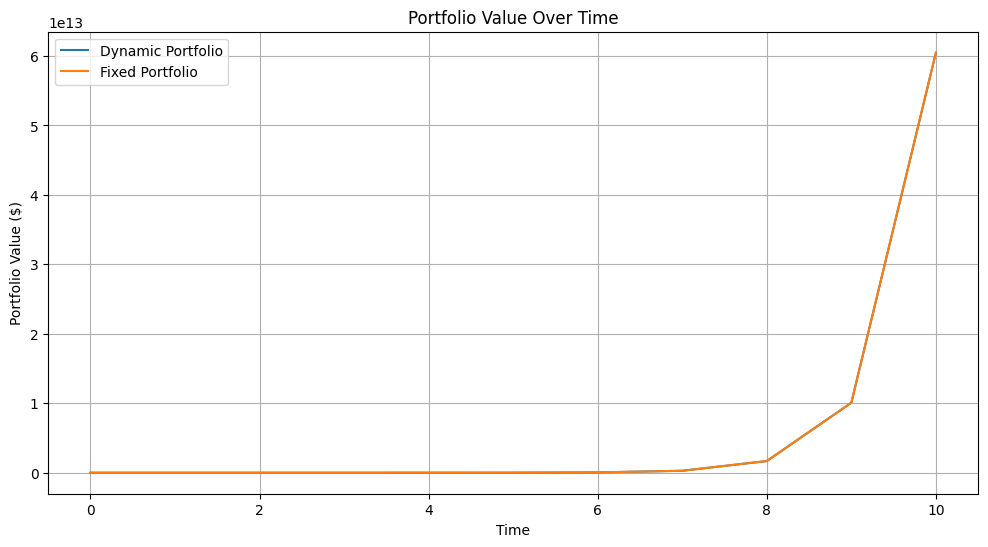

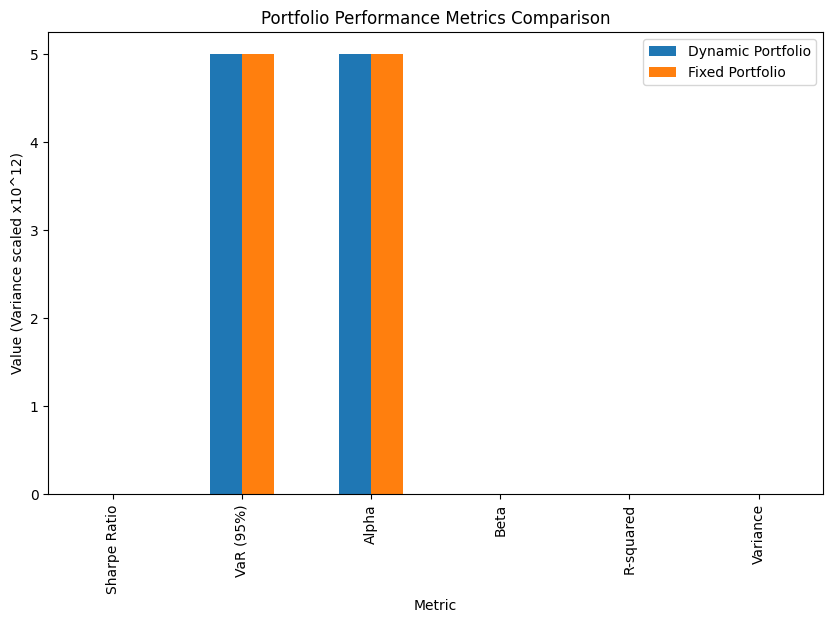

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm

# Initial investment
initial_investment = 1_000_000

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate=0.046):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate) / std_dev

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(portfolio_returns, benchmark_returns):
    X = sm.add_constant(benchmark_returns)  # Add constant for intercept
    model = sm.OLS(portfolio_returns, X).fit()
    alpha = model.params.iloc[0]
    beta = model.params.iloc[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns, risk_free_rate=0.046):
    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -(portfolio_return - risk_free_rate) / portfolio_volatility

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
    bounds = [(0, 1) for _ in range(num_assets)]  # No short selling
    initial_weights = [1 / num_assets] * num_assets

    optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate), bounds=bounds, constraints=constraints)
    return optimized.x

# Load cleaned price data and daily returns (already prepared in previous steps)
file_path = '/content/Stocks_Bonds_60_40_Neutral Strategy.xlsx'
price_data = pd.read_excel(file_path, sheet_name='Stocks&Bonds')

# Prepare daily returns for analysis
price_data['Price'] = pd.to_datetime(price_data['Price'], errors='coerce')
price_data.set_index('Price', inplace=True)
daily_returns = price_data.copy()
daily_returns = daily_returns.apply(pd.to_numeric, errors='coerce')  # Ensure numeric data
daily_returns.fillna(method='ffill', inplace=True)  # Forward fill missing values
daily_returns.fillna(method='bfill', inplace=True)  # Backward fill missing values

# Debug: Print dataset size
print("Number of rows in daily_returns:", len(daily_returns))
print("Number of columns in daily_returns:", daily_returns.shape[1])

# Load S&P 500 benchmark data
sp500_data = pd.read_excel(file_path, sheet_name='S&P 500 Data')
print("S&P 500 Data Columns:", sp500_data.columns)
sp500_data.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces
sp500_data['Price'] = pd.to_datetime(sp500_data['Price'], errors='coerce')
sp500_data = sp500_data.dropna(subset=['Price'])  # Drop rows with invalid dates
sp500_data.set_index('Price', inplace=True)
sp500_returns = sp500_data['SP500 Daily Returns'].dropna()

# Initialize dynamic portfolio
rolling_window = 252  # 1 year of trading days
dynamic_weights = []
dynamic_portfolio_values = [initial_investment]
dynamic_returns = []

# Initialize fixed portfolio
fixed_portfolio_values = [initial_investment]
fixed_returns = []

# Debug: Test optimization for a single rolling window
sample_data = daily_returns.iloc[:rolling_window]
sample_weights = optimize_portfolio_weights(sample_data)
print("Sample Weights:", sample_weights)

# Perform rolling optimization for dynamic portfolio
for i in tqdm(range(rolling_window, rolling_window + 10)):  # Test with first 10 iterations
    train_data = daily_returns.iloc[i - rolling_window:i]
    test_data = daily_returns.iloc[i].dropna()
    available_assets = test_data.index
    train_data = train_data[available_assets]

    # Optimize weights
    weights = optimize_portfolio_weights(train_data)
    dynamic_weights.append(weights)

    # Calculate dynamic portfolio return
    portfolio_return = np.dot(weights, test_data.values)
    dynamic_returns.append(min(portfolio_return, 5))  # Cap portfolio return to avoid overflow

    # Update dynamic portfolio value
    new_value = dynamic_portfolio_values[-1] * (1 + min(portfolio_return, 5))
    dynamic_portfolio_values.append(new_value)

# Calculate fixed portfolio (equal weighting)
for i in range(len(daily_returns)):
    test_data = daily_returns.iloc[i].dropna()
    num_assets = len(test_data)
    if num_assets == 0:
        continue  # Skip if no assets available

    equal_weights = np.array([1 / num_assets] * num_assets)
    fixed_return = np.dot(equal_weights, test_data.values)
    fixed_returns.append(min(fixed_return, 5))  # Cap returns

    # Update fixed portfolio value
    fixed_new_value = fixed_portfolio_values[-1] * (1 + min(fixed_return, 5))
    fixed_portfolio_values.append(fixed_new_value)

# Align indices for S&P 500 and portfolio returns
dynamic_returns = pd.Series(dynamic_returns, index=daily_returns.index[rolling_window:rolling_window + len(dynamic_returns)])
fixed_returns_series = pd.Series(fixed_returns[:len(dynamic_returns)], index=dynamic_returns.index)
sp500_returns = sp500_returns.reindex(dynamic_returns.index).dropna()

# Debugging: Check index alignment
print("Dynamic Returns Index After Reindexing:", dynamic_returns.index)
print("Fixed Returns Index After Reindexing:", fixed_returns_series.index)
print("S&P 500 Returns Index After Reindexing:", sp500_returns.index)

# Ensure proper alignment before metrics calculations
if not dynamic_returns.index.equals(sp500_returns.index):
    raise ValueError("Dynamic returns and S&P 500 returns indices do not match.")
if not fixed_returns_series.index.equals(sp500_returns.index):
    raise ValueError("Fixed returns and S&P 500 returns indices do not match.")

# Metrics calculations
dynamic_alpha, dynamic_beta, dynamic_r2 = regression_analysis(dynamic_returns, sp500_returns)
fixed_alpha, fixed_beta, fixed_r2 = regression_analysis(fixed_returns_series, sp500_returns)

dynamic_sharpe = calculate_sharpe_ratio(dynamic_returns)
fixed_sharpe = calculate_sharpe_ratio(fixed_returns_series)

dynamic_var = calculate_var(dynamic_returns)
fixed_var = calculate_var(fixed_returns_series)

dynamic_variance = calculate_variance(dynamic_returns)
fixed_variance = calculate_variance(fixed_returns_series)

# Consolidate metrics
metrics = {
    "Metric": ["Sharpe Ratio", "VaR (95%)", "Alpha", "Beta", "R-squared", "Variance"],
    "Dynamic Portfolio": [dynamic_sharpe, dynamic_var, dynamic_alpha, dynamic_beta, dynamic_r2, dynamic_variance],
    "Fixed Portfolio": [fixed_sharpe, fixed_var, fixed_alpha, fixed_beta, fixed_r2, fixed_variance]
}

performance_comparison = pd.DataFrame(metrics)
print(performance_comparison)

# Normalize Variance for visualization
performance_comparison["Dynamic Portfolio"] = performance_comparison["Dynamic Portfolio"].apply(lambda x: x if x != dynamic_variance else x / 1e12)
performance_comparison["Fixed Portfolio"] = performance_comparison["Fixed Portfolio"].apply(lambda x: x if x != fixed_variance else x / 1e12)

# Visualization of portfolio values
plt.figure(figsize=(12, 6))
plt.plot(dynamic_portfolio_values, label="Dynamic Portfolio")
plt.plot(fixed_portfolio_values[:len(dynamic_portfolio_values)], label="Fixed Portfolio")
plt.title("Portfolio Value Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value ($)")
plt.legend()
plt.grid()
plt.show()

# Visualization of performance metrics
metrics_to_plot = performance_comparison.set_index("Metric")
metrics_to_plot.plot(kind="bar", figsize=(10, 6), title="Portfolio Performance Metrics Comparison")
plt.ylabel("Value (Variance scaled x10^12)")
plt.show()


In [ ]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
import statsmodels.api as sm
from tqdm import tqdm

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']

tickers = stock_tickers + bond_tickers

# Risk-free rate
risk_free_rate = 0.0425  # 4.25%

# Download data
data = yf.download(tickers, start='2014-01-01', end='2024-01-01')

# Ensure 'Adj Close' exists or fallback to 'Close'
if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
elif 'Close' in data.columns.get_level_values(0):
    data = data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' columns are available in the dataset. Please check the ticker symbols or data source.")

# Drop missing values
data.dropna(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns, risk_free_rate):
    excess_returns = returns.mean() - risk_free_rate / 252
    return excess_returns / returns.std()

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(portfolio_returns, benchmark_returns):
    if len(portfolio_returns) < 2 or len(benchmark_returns) < 2:
        return np.nan, np.nan, np.nan

    portfolio_returns = np.asarray(portfolio_returns).reshape(-1)
    benchmark_returns = np.asarray(benchmark_returns).reshape(-1)

    X = sm.add_constant(benchmark_returns)
    try:
        model = sm.OLS(portfolio_returns, X).fit()
        alpha = model.params[0]
        beta = model.params[1]
        r_squared = model.rsquared
        return alpha, beta, r_squared
    except Exception as e:
        return np.nan, np.nan, np.nan

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -(portfolio_return - risk_free_rate) / portfolio_volatility

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]
    initial_weights = np.array([1 / num_assets] * num_assets)

    optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                         bounds=bounds, constraints=constraints)
    return optimized.x

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization(rebalancing_frequency='Q'):
    # Resample data to the specified frequency
    periodic_returns = daily_returns.resample(rebalancing_frequency).apply(lambda x: (1 + x).prod() - 1)

    # Initialize metrics
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    metrics = []

    # Perform periodic rebalancing
    for i in tqdm(range(1, len(periodic_returns))):
        train_data = periodic_returns.iloc[:i]
        test_data = periodic_returns.iloc[i]

        if train_data.empty or train_data.shape[1] != len(tickers):
            continue

        # Optimize portfolio weights
        weights = optimize_portfolio_weights(train_data)
        portfolio_weights.append(weights)

        # Calculate portfolio return
        portfolio_return = np.dot(weights, test_data.values)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        # Calculate metrics
        sharpe_ratio = calculate_sharpe_ratio(train_data, risk_free_rate)
        var_95 = calculate_var(train_data)
        alpha, beta, r_squared = regression_analysis(
            train_data.mean(axis=1).dropna(),  # Portfolio returns
            train_data.mean(axis=1).dropna()  # Benchmark returns
        )
        variance = calculate_variance(train_data.mean(axis=1))

        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    # Consolidate metrics into DataFrame
    metrics_df = pd.DataFrame(metrics)
    portfolio_values_series = pd.Series(portfolio_values, index=periodic_returns.index[:len(portfolio_values)])

    return metrics_df, portfolio_values_series

# Perform optimization for quarterly rebalancing
quarterly_metrics, quarterly_values = dynamic_portfolio_optimization('Q')

# Perform optimization for monthly rebalancing
monthly_metrics, monthly_values = dynamic_portfolio_optimization('M')

# Display results
print("Quarterly Portfolio Metrics:")
print(quarterly_metrics)
print("\nQuarterly Portfolio Values:")
print(quarterly_values)

print("\nMonthly Portfolio Metrics:")
print(monthly_metrics)
print("\nMonthly Portfolio Values:")
print(monthly_values)

from google.colab import files

# Define the file path
excel_file_path = '/content/dynamic_portfolio_results.xlsx'

# Save the metrics and portfolio values to an Excel file
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    quarterly_metrics.to_excel(writer, sheet_name='Quarterly Metrics')
    quarterly_values.to_excel(writer, sheet_name='Quarterly Values')
    monthly_metrics.to_excel(writer, sheet_name='Monthly Metrics')
    monthly_values.to_excel(writer, sheet_name='Monthly Values')

print(f"Results saved to {excel_file_path}")

# Download the Excel file
files.download(excel_file_path)




[*********************100%***********************]  15 of 15 completed
<ipython-input-24-e6180969b3bb>:88: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  periodic_returns = daily_returns.resample(rebalancing_frequency).apply(lambda x: (1 + x).prod() - 1)
  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 16/16 [00:09<00:00,  1.65it/s]
<ipython-input-24-e6180969b3bb>:88: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.

Quarterly Portfolio Metrics:
                                         Sharpe Ratio  \
0   Ticker
ABBV    NaN
AXP     NaN
CAT     NaN
COS...   
1   Ticker
ABBV     0.159039
AXP     -0.448690
CAT...   
2   Ticker
ABBV     0.560093
AXP     -0.174550
CAT...   
3   Ticker
ABBV     0.328288
AXP     -0.082332
CAT...   
4   Ticker
ABBV     0.518379
AXP      0.146574
CAT...   
5   Ticker
ABBV     0.494241
AXP      0.286443
CAT...   
6   Ticker
ABBV     0.507553
AXP      0.396475
CAT...   
7   Ticker
ABBV     0.438970
AXP      0.384641
CAT...   
8   Ticker
ABBV     0.563713
AXP      0.344530
CAT...   
9   Ticker
ABBV     0.654618
AXP      0.419447
CAT...   
10  Ticker
ABBV     0.573354
AXP      0.199830
CAT...   
11  Ticker
ABBV     0.453457
AXP      0.177403
CAT...   
12  Ticker
ABBV     0.527325
AXP      0.217714
CAT...   
13  Ticker
ABBV     0.501528
AXP      0.263613
CAT...   
14  Ticker
ABBV     0.392304
AXP      0.281948
CAT...   
15  Ticker
ABBV     0.426541
AXP      0.202522
CAT...   

 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
import statsmodels.api as sm
from tqdm import tqdm

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']

tickers = stock_tickers + bond_tickers

# Risk-free rate
risk_free_rate = 0.0425  # 4.25%

# Download data
data = yf.download(tickers, start='2014-01-01', end='2024-01-01')

# Ensure 'Adj Close' exists or fallback to 'Close'
if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
elif 'Close' in data.columns.get_level_values(0):
    data = data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' columns are available in the dataset. Please check the ticker symbols or data source.")

# Drop missing values
data.dropna(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -(portfolio_return - risk_free_rate) / portfolio_volatility

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]
    initial_weights = np.array([1 / num_assets] * num_assets)

    optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                         bounds=bounds, constraints=constraints)
    return optimized.x

# Function to calculate portfolio metrics
def calculate_portfolio_metrics(weights, returns):
    portfolio_return = np.dot(weights, returns.mean())
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio

# Perform monthly rebalancing
monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
portfolio_values = [1_000_000]  # Initial investment
portfolio_weights = []
metrics = []

tqdm.pandas()

for i in tqdm(range(1, len(monthly_returns))):
    train_data = monthly_returns.iloc[:i]
    test_data = monthly_returns.iloc[i]

    if train_data.empty or train_data.shape[1] != len(tickers):
        continue

    # Optimize portfolio weights
    weights = optimize_portfolio_weights(train_data)
    portfolio_weights.append(weights)

    # Calculate portfolio return
    portfolio_return = np.dot(weights, test_data.values)
    portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

    # Calculate metrics
    portfolio_mean_return, portfolio_volatility, portfolio_sharpe = calculate_portfolio_metrics(weights, train_data)

    metrics.append({
        'Mean Return': portfolio_mean_return,
        'Volatility': portfolio_volatility,
        'Sharpe Ratio': portfolio_sharpe
    })

# Consolidate metrics into DataFrame
metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[1:])
portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
weights_df = pd.DataFrame(portfolio_weights, columns=tickers, index=monthly_returns.index[1:])

# Save results to an Excel file
excel_file_path = '/content/monthly_portfolio_metrics_with_weights.xlsx'
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    metrics_df.to_excel(writer, sheet_name='Portfolio Metrics')
    portfolio_values_series.to_excel(writer, sheet_name='Portfolio Values')
    weights_df.to_excel(writer, sheet_name='Asset Weights')

print("Results saved to:", excel_file_path)


[*********************100%***********************]  15 of 15 completed
<ipython-input-25-c2fac09047a4>:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)
  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:11211: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
100%|██████████| 50/50 [00:17<00:00,  2.79it/s]


Results saved to: /content/monthly_portfolio_metrics_with_weights.xlsx


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
benchmark_ticker = '^GSPC'  # S&P 500 benchmark

# Combine all tickers
tickers = stock_tickers + bond_tickers + [benchmark_ticker]

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data
data = yf.download(tickers, start='2014-01-01', end='2024-01-01')

# Ensure 'Adj Close' exists or fallback to 'Close'
if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
elif 'Close' in data.columns.get_level_values(0):
    data = data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' columns are available in the dataset. Please check the ticker symbols or data source.")

# Drop missing values
data.dropna(inplace=True)

# Check if all tickers are present in the dataset
missing_tickers = [ticker for ticker in tickers if ticker not in data.columns]
if missing_tickers:
    print(f"The following tickers are missing: {missing_tickers}")
else:
    print("All tickers are present in the dataset.")

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(portfolio_returns, benchmark_returns):
    X = sm.add_constant(benchmark_returns)
    model = sm.OLS(portfolio_returns, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints)
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights

    return weights

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    # Resample data to monthly frequency
    monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

    # Initialize metrics and weights
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    metrics = []

    # Perform monthly rebalancing
    for i in tqdm(range(1, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i]
        test_data = monthly_returns.iloc[i]

        if train_data.empty or train_data.shape[1] != len(tickers):
            continue

        # Optimize portfolio weights (excluding benchmark)
        weights = optimize_portfolio_weights(train_data.iloc[:, :-1])  # Exclude benchmark
        portfolio_weights.append(weights)

        # Calculate portfolio return (with transaction costs)
        transaction_cost = 0.001  # 0.1% transaction cost
        if i > 1:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data.values[:-1]) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        # Calculate metrics
        sharpe_ratio = calculate_sharpe_ratio(train_data.iloc[:, :-1].mean())  # Exclude benchmark
        var_95 = calculate_var(train_data.iloc[:, :-1].mean())  # Exclude benchmark
        alpha, beta, r_squared = regression_analysis(train_data.iloc[:, :-1].mean(axis=1), train_data[benchmark_ticker])
        variance = calculate_variance(train_data.iloc[:, :-1].mean())

        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    # Normalize weights to ensure they sum to 1
    weights_df = pd.DataFrame(portfolio_weights, columns=tickers[:-1], index=monthly_returns.index[1:])  # Exclude benchmark
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[1:])

    return weights_df, portfolio_values_series, metrics_df

# Function to calculate fixed 60/40 portfolio (excluding benchmark)
def fixed_6040_portfolio():
    stock_weights = np.array([0.6 / len(stock_tickers)] * len(stock_tickers))  # 60% allocated to stocks
    bond_weights = np.array([0.4 / len(bond_tickers)] * len(bond_tickers))     # 40% allocated to bonds
    weights = np.concatenate([stock_weights, bond_weights])  # Exclude benchmark
    return weights

# Calculate fixed 60/40 portfolio values
fixed_portfolio_values = [1_000_000]  # Initial investment
for i in range(1, len(monthly_returns)):
    test_data = monthly_returns.iloc[i][:-1]  # Exclude benchmark column
    print(f"Number of tickers in test_data: {len(test_data)}")
    if len(test_data) != 15:  # Ensure test_data has exactly 15 tickers
        raise ValueError(f"Expected 15 tickers, but got {len(test_data)} tickers in test_data.")
    weights = fixed_6040_portfolio()
    portfolio_return = np.dot(weights, test_data.values)
    fixed_portfolio_values.append(fixed_portfolio_values[-1] * (1 + portfolio_return))

fixed_portfolio_values_series = pd.Series(fixed_portfolio_values, index=monthly_returns.index[:len(fixed_portfolio_values)])

# Perform optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Save the weights, portfolio values, and metrics to an Excel file
output_file = 'monthly_portfolio_metrics_with_weights.xlsx'
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    weights_df.to_excel(writer, sheet_name='Weights')
    portfolio_values_series.to_excel(writer, sheet_name='Portfolio Values')
    metrics_df.to_excel(writer, sheet_name='Metrics')

    # Add formatting
    workbook = writer.book
    worksheet = writer.sheets['Weights']
    header_format = workbook.add_format({'bold': True, 'text_wrap': True})
    for col_num, value in enumerate(weights_df.columns.values):
        worksheet.write(0, col_num + 1, value, header_format)

print(f"Output saved to {output_file}")

# Plot portfolio performance
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio')
plt.plot(fixed_portfolio_values_series, label='60/40 Portfolio')
plt.plot(monthly_returns[benchmark_ticker].cumprod() * 1_000_000, label='S&P 500')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

[*********************100%***********************]  16 of 16 completed


All tickers are present in the dataset.
Number of tickers in test_data: 14


ValueError: Expected 15 tickers, but got 14 tickers in test_data.

In [ ]:
# Check which tickers are present after dropping missing values
print("Tickers present after dropping missing values:")
print(data.columns)

Tickers present after dropping missing values:
Index(['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE',
       'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', '^GSPC'],
      dtype='object', name='Ticker')


In [ ]:
# Tickers in your lists
all_tickers = stock_tickers + bond_tickers

# Tickers present in the dataset
present_tickers = data.columns.tolist()

# Identify missing tickers
missing_tickers = [ticker for ticker in all_tickers if ticker not in present_tickers]
print(f"Missing tickers: {missing_tickers}")

Missing tickers: []


In [ ]:
# Remove missing tickers
stock_tickers = [ticker for ticker in stock_tickers if ticker in present_tickers]
bond_tickers = [ticker for ticker in bond_tickers if ticker in present_tickers]

# Update the combined tickers list
tickers = stock_tickers + bond_tickers + [benchmark_ticker]

In [ ]:
print(f"Shape of monthly_returns: {monthly_returns.shape}")
print(f"Columns in monthly_returns: {monthly_returns.columns.tolist()}")

Shape of monthly_returns: (51, 15)
Columns in monthly_returns: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']


In [ ]:
missing_ticker = [ticker for ticker in bond_tickers if ticker not in test_data.index]
print(f"Missing ticker: {missing_ticker}")

Missing ticker: ['VGSH']


In [ ]:
bond_tickers = [ticker for ticker in bond_tickers if ticker != 'VGSH']

In [ ]:
tickers = stock_tickers + bond_tickers + [benchmark_ticker]
print(f"Updated tickers: {tickers}")

Updated tickers: ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD', 'SPTS', 'IEI', 'SCHI', 'TIP', '^GSPC']


[*********************100%***********************]  16 of 16 completed
<ipython-input-55-2fec6aad557d>:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
<ipython-input-55-2fec6aad557d>:34: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill any remaining missing values
<ipython-input-55-2fec6aad557d>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)


Columns in monthly_returns: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH', '^GSPC']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'CAT', 'COST', 'DUK', 'GOOGL', 'HD', 'IEI', 'JPM', 'NKE', 'NVDA', 'SCHI', 'SPTS', 'TIP', 'VGSH']
Tickers in test_data: ['ABBV', 'AXP', 'C

100%|██████████| 118/118 [00:15<00:00,  7.59it/s]


Output saved to monthly_portfolio_metrics_with_weights.xlsx


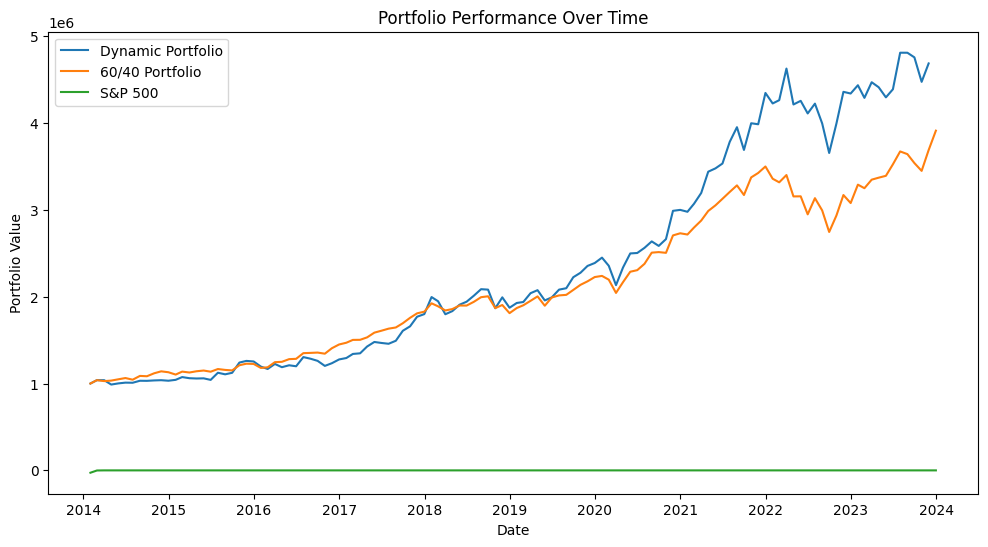

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']  # Include 'VGSH'
benchmark_ticker = '^GSPC'  # S&P 500 benchmark

# Combine all tickers
tickers = stock_tickers + bond_tickers + [benchmark_ticker]

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data
data = yf.download(tickers, start='2014-01-01', end='2024-01-01')

# Ensure 'Adj Close' exists or fallback to 'Close'
if 'Adj Close' in data.columns.get_level_values(0):
    data = data['Adj Close']
elif 'Close' in data.columns.get_level_values(0):
    data = data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' columns are available in the dataset. Please check the ticker symbols or data source.")

# Fill missing data using forward fill
data.fillna(method='ffill', inplace=True)  # Forward fill missing values
data.fillna(method='bfill', inplace=True)  # Backward fill any remaining missing values

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('M').apply(lambda x: (1 + x).prod() - 1)

# Verify columns in monthly_returns
print(f"Columns in monthly_returns: {monthly_returns.columns.tolist()}")

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(portfolio_returns, benchmark_returns):
    X = sm.add_constant(benchmark_returns)
    model = sm.OLS(portfolio_returns, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints)
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights

    return weights

def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]
    assets_used = returns.columns.tolist()

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, assets_used

def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.iloc[:, :-1].dropna()
        if train_data_filtered.empty:
            # Use equal weights for all assets except benchmark
            eq_weights = np.array([1 / (len(tickers[:-1]))] * len(tickers[:-1]))
            weights = eq_weights
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data.values[:-1])
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered)
        except:
            # Use equal weights if optimization fails
            eq_weights = np.array([1 / (len(tickers[:-1]))] * len(tickers[:-1]))
            weights = eq_weights
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data.values[:-1])
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original tickers
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in tickers[:-1]]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(tickers[:-1])] * len(tickers[:-1]))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data.values[:-1]) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        benchmark_returns_series = monthly_returns[benchmark_ticker].iloc[:i-1]
        portfolio_returns_series, benchmark_returns_series = portfolio_returns_series.align(benchmark_returns_series, join='inner')

        if len(portfolio_returns_series) < 2 or len(benchmark_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series, benchmark_returns_series)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=tickers[:-1], index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Function to calculate fixed 60/40 portfolio (excluding benchmark)
def fixed_6040_portfolio():
    stock_weights = np.array([0.6 / len(stock_tickers)] * len(stock_tickers))  # 60% allocated to stocks
    bond_weights = np.array([0.4 / len(bond_tickers)] * len(bond_tickers))     # 40% allocated to bonds
    weights = np.concatenate([stock_weights, bond_weights])  # Exclude benchmark
    return weights

# Calculate fixed 60/40 portfolio values
fixed_portfolio_values = [1_000_000]  # Initial investment
for i in range(1, len(monthly_returns)):
    test_data = monthly_returns.iloc[i][:-1]  # Exclude benchmark column
    print(f"Tickers in test_data: {test_data.index.tolist()}")
    if len(test_data) != len(stock_tickers) + len(bond_tickers):  # Ensure test_data has the correct number of tickers
        raise ValueError(f"Expected {len(stock_tickers) + len(bond_tickers)} tickers, but got {len(test_data)} tickers in test_data.")
    weights = fixed_6040_portfolio()
    portfolio_return = np.dot(weights, test_data.values)
    fixed_portfolio_values.append(fixed_portfolio_values[-1] * (1 + portfolio_return))

fixed_portfolio_values_series = pd.Series(fixed_portfolio_values, index=monthly_returns.index[:len(fixed_portfolio_values)])

# Perform optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Save the weights, portfolio values, and metrics to an Excel file
output_file = 'monthly_portfolio_metrics_with_weights.xlsx'
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    weights_df.to_excel(writer, sheet_name='Weights')
    portfolio_values_series.to_excel(writer, sheet_name='Portfolio Values')
    metrics_df.to_excel(writer, sheet_name='Metrics')

    # Add formatting
    workbook = writer.book
    worksheet = writer.sheets['Weights']
    header_format = workbook.add_format({'bold': True, 'text_wrap': True})
    for col_num, value in enumerate(weights_df.columns.values):
        worksheet.write(0, col_num + 1, value, header_format)

print(f"Output saved to {output_file}")

# Plot portfolio performance
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio')
plt.plot(fixed_portfolio_values_series, label='60/40 Portfolio')
plt.plot(monthly_returns[benchmark_ticker].cumprod() * 1_000_000, label='S&P 500')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 118/118 [00:16<00:00,  7.19it/s]


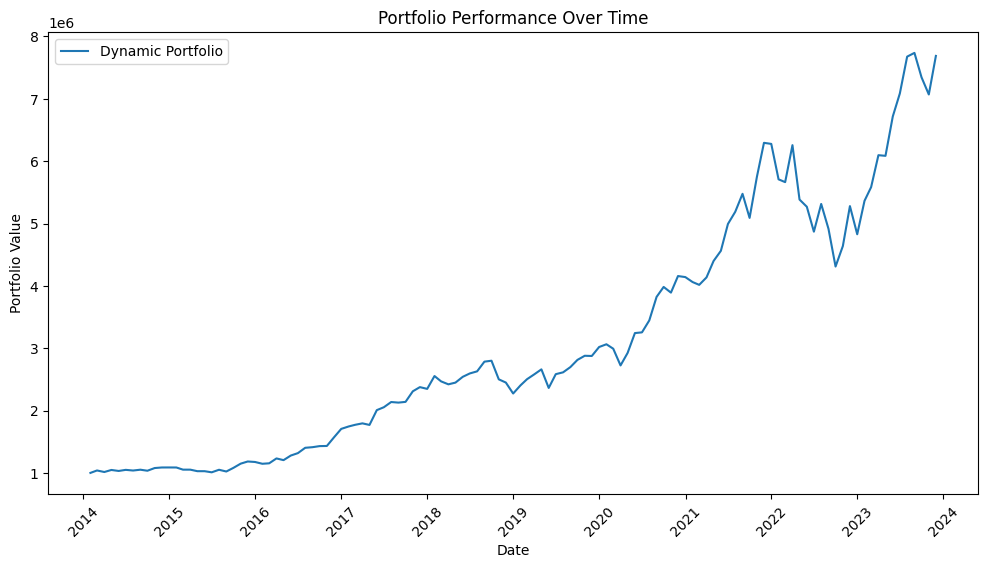

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2023-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2023-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(portfolio_returns, benchmark_returns):
    if len(portfolio_returns) < 2 or len(benchmark_returns) < 2:
        return np.nan, np.nan, np.nan  # Return NaN if insufficient data
    # Use values to avoid index alignment checks
    X = sm.add_constant(benchmark_returns.values)
    model = sm.OLS(portfolio_returns.values, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, non_zero_std_assets.index.tolist()

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.dropna()
        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original assets
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series, monthly_returns[benchmark_ticker].iloc[:i-1])
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Perform optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Plot portfolio performance without S&P 500 benchmark
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 118/118 [00:12<00:00,  9.79it/s]


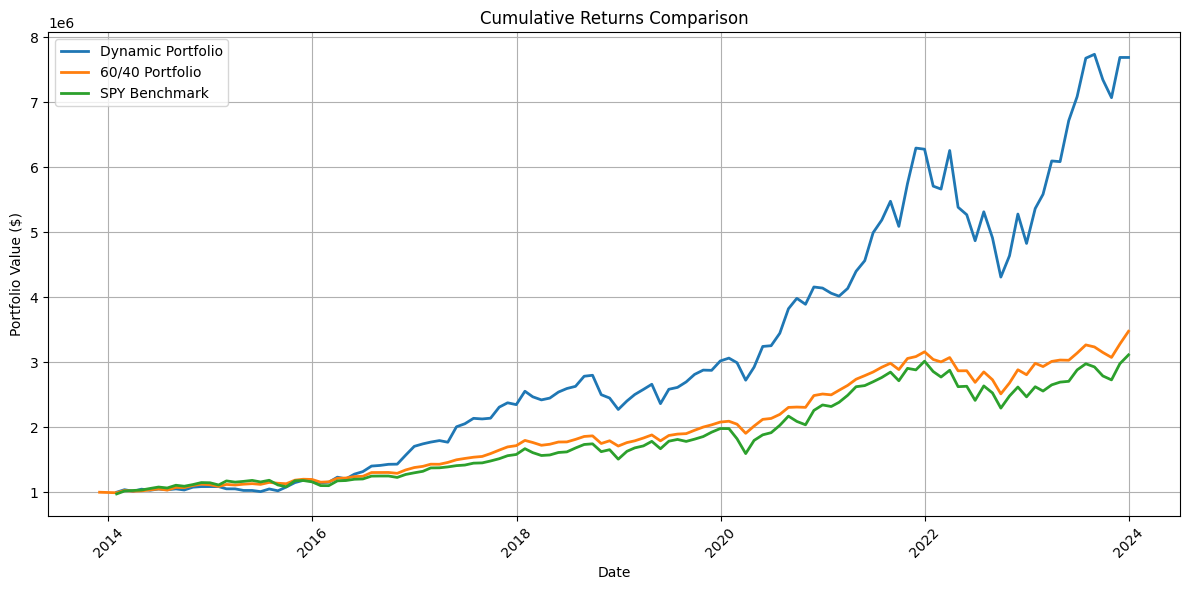

Final Cumulative Returns:
Dynamic Portfolio: 7688165.578325724
60/40 Portfolio: 3476329.706559057
SPY Benchmark: 3113333.3535791095


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2023-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2023-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan  # Return NaN if insufficient data
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, non_zero_std_assets.index.tolist()

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.dropna()
        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original assets
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Perform dynamic portfolio optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Calculate 60/40 portfolio returns
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

# Accumulate portfolio values for the 60/40 portfolio
portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))

# Calculate the initial investment date
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time  # Ensure it's the start of the month

# Create a new index including the initial date
new_index = pd.Index([initial_date]).append(monthly_returns.index)

# Assign the new index to the portfolio values Series
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

# Ensure all series have the same date range
common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)

# Reindex each series to the common index, filling missing values appropriately
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Plotting the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio', linewidth=2)
plt.plot(portfolio_values_60_40, label='60/40 Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='SPY Benchmark', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print final cumulative returns
print("Final Cumulative Returns:")
print("Dynamic Portfolio:", portfolio_values_series.iloc[-1])
print("60/40 Portfolio:", portfolio_values_60_40.iloc[-1])
print("SPY Benchmark:", benchmark_cumulative.iloc[-1])

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2023-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2023-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan  # Return NaN if insufficient data
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, non_zero_std_assets.index.tolist()

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.dropna()
        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original assets
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Perform dynamic portfolio optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Calculate 60/40 portfolio returns
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

# Accumulate portfolio values for the 60/40 portfolio
portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))

# Calculate the initial investment date
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time  # Ensure it's the start of the month

# Create a new index including the initial date
new_index = pd.Index([initial_date]).append(monthly_returns.index)

# Assign the new index to the portfolio values Series
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

# Ensure all series have the same date range
common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)

# Reindex each series to the common index, filling missing values appropriately
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Export DataFrames to Excel
with pd.ExcelWriter('portfolio_data.xlsx') as writer:
    data.to_excel(writer, sheet_name='Asset_Prices')
    portfolio_values_series.to_excel(writer, sheet_name='Dynamic_Portfolio_Values')
    portfolio_values_60_40.to_excel(writer, sheet_name='60_40_Portfolio_Values')
    benchmark_cumulative.to_excel(writer, sheet_name='SPY_Benchmark')

print("Data has been saved to portfolio_data.xlsx")

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 118/118 [00:11<00:00,  9.92it/s]


Data has been saved to portfolio_data.xlsx


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 118/118 [00:11<00:00, 10.45it/s]


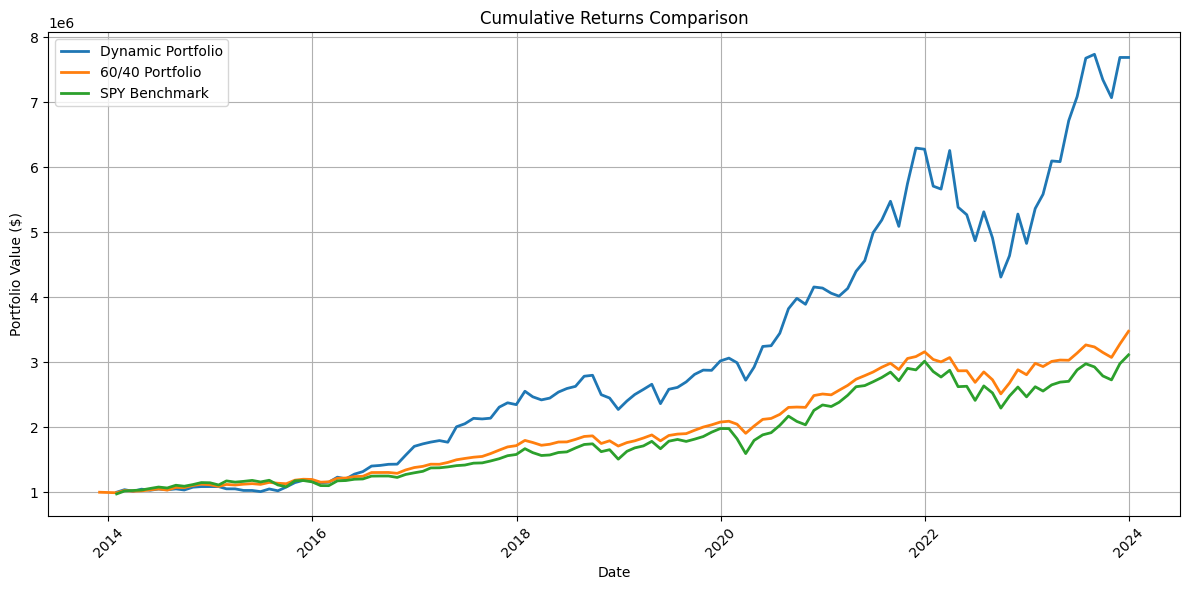

Final Cumulative Returns:
Dynamic Portfolio: 7688165.578325724
60/40 Portfolio: 3476329.706559057
SPY Benchmark: 3113333.3535791095


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2023-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2023-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan  # Return NaN if insufficient data
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, non_zero_std_assets.index.tolist()

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.dropna()
        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original assets
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Perform dynamic portfolio optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Calculate 60/40 portfolio returns
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

# Accumulate portfolio values for the 60/40 portfolio
portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))

# Calculate the initial investment date
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time  # Ensure it's the start of the month

# Create a new index including the initial date
new_index = pd.Index([initial_date]).append(monthly_returns.index)

# Assign the new index to the portfolio values Series
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

# Ensure all series have the same date range
common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)

# Reindex each series to the common index, filling missing values appropriately
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Plotting the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio', linewidth=2)
plt.plot(portfolio_values_60_40, label='60/40 Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='SPY Benchmark', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print final cumulative returns
print("Final Cumulative Returns:")
print("Dynamic Portfolio:", portfolio_values_series.iloc[-1])
print("60/40 Portfolio:", portfolio_values_60_40.iloc[-1])
print("SPY Benchmark:", benchmark_cumulative.iloc[-1])

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 118/118 [00:11<00:00,  9.88it/s]


                    NVDA         GOOGL          ABBV           NKE  \
Date                                                                 
2014-03-31  6.666667e-02  6.666667e-02  6.666667e-02  6.666667e-02   
2014-04-30  1.111481e-01  3.199115e-01  9.950698e-08  1.158669e-07   
2014-05-31  6.542712e-03  0.000000e+00  0.000000e+00  0.000000e+00   
2014-06-30  4.866966e-10  1.235620e-02  7.791101e-11  4.033473e-10   
2014-07-31  1.445412e-09  5.670759e-10  4.571619e-02  7.213106e-10   

                    COST       DUK           JPM           AXP       CAT  \
Date                                                                       
2014-03-31  6.666667e-02  0.066667  6.666667e-02  6.666667e-02  0.066667   
2014-04-30  1.012615e-07  0.179365  9.945476e-08  1.070537e-07  0.276506   
2014-05-31  0.000000e+00  0.244393  1.935889e-01  0.000000e+00  0.529192   
2014-06-30  2.585878e-10  0.199460  1.937793e-01  1.800003e-10  0.353872   
2014-07-31  2.134571e-10  0.000000  1.311747e-01  3.7

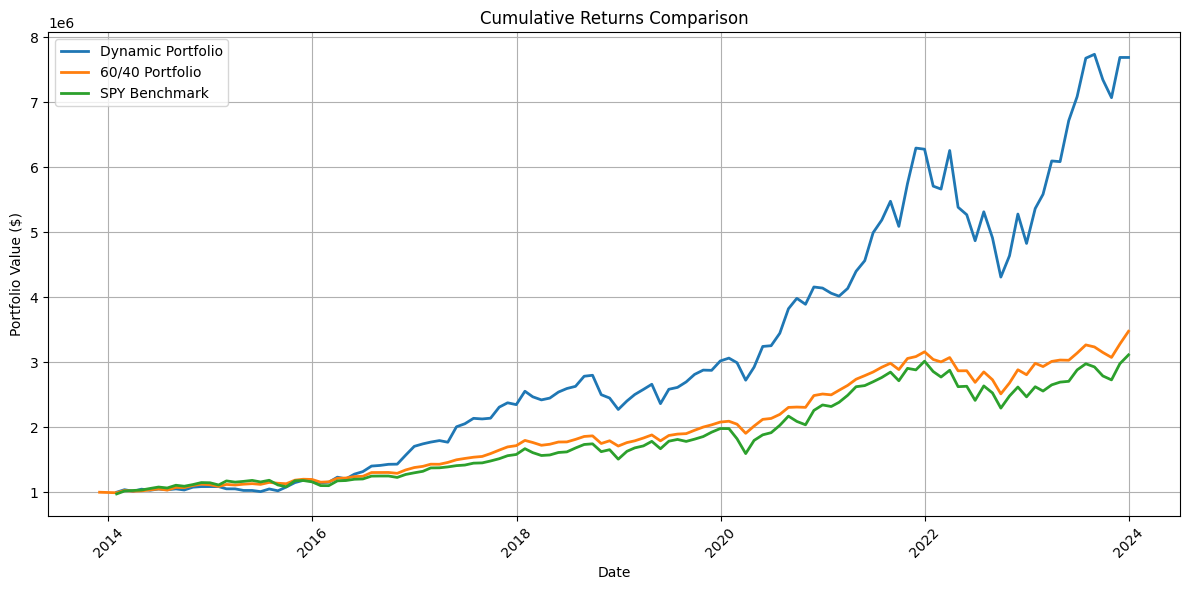

Final Cumulative Returns:
Dynamic Portfolio: 7688165.578325724
60/40 Portfolio: 3476329.706559057
SPY Benchmark: 3113333.3535791095


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2023-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2023-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# Function to calculate Sharpe Ratio
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev  # Monthly risk-free rate

# Function to calculate Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Function for Regression Analysis (Alpha, Beta, R-squared)
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan  # Return NaN if insufficient data
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Function to calculate Variance
def calculate_variance(returns):
    return returns.var()

# Function to optimize portfolio weights
def optimize_portfolio_weights(returns):
    # Remove assets with zero standard deviation
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]

    # Add a small constant to the covariance matrix to ensure positive definiteness
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility  # Monthly risk-free rate

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]  # No short-selling
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights  # Fallback to equal weights
    return weights, non_zero_std_assets.index.tolist()

# Function to perform dynamic portfolio optimization
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]

        train_data_filtered = train_data.dropna()
        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        # Map optimized weights back to original assets
        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)

        # Normalize weights to sum to 1
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))

        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)

    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])

    return weights_df, portfolio_values_series, metrics_df

# Perform dynamic portfolio optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Verify the DataFrames
print(weights_df.head())
print(metrics_df.head())

# Export weights and metrics to Excel
try:
    with pd.ExcelWriter('Portfolio_Weights_and_Metrics.xlsx') as writer:
        weights_df.to_excel(writer, sheet_name='Portfolio_Weights')
        metrics_df.to_excel(writer, sheet_name='Portfolio_Metrics')
    print("Data has been successfully exported to Excel.")
except Exception as e:
    print(f"An error occurred while exporting data: {e}")

# Calculate 60/40 portfolio returns
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

# Accumulate portfolio values for the 60/40 portfolio
portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))

# Calculate the initial investment date
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time  # Ensure it's the start of the month

# Create a new index including the initial date
new_index = pd.Index([initial_date]).append(monthly_returns.index)

# Assign the new index to the portfolio values Series
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

# Ensure all series have the same date range
common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)

# Reindex each series to the common index, filling missing values appropriately
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Plotting the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio', linewidth=2)
plt.plot(portfolio_values_60_40, label='60/40 Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='SPY Benchmark', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print final cumulative returns
print("Final Cumulative Returns:")
print("Dynamic Portfolio:", portfolio_values_series.iloc[-1])
print("60/40 Portfolio:", portfolio_values_60_40.iloc[-1])
print("SPY Benchmark:", benchmark_cumulative.iloc[-1])

In [ ]:
import pandas as pd

# Load the Excel file
file_path = "/content/portfolio_data.xlsx"  # Replace with your actual file name
excel_data = pd.ExcelFile(file_path)

# Loop through each sheet and save it as a CSV
for sheet in excel_data.sheet_names:
    df = excel_data.parse(sheet)
    df.to_csv(f"{sheet}.csv", index=False)  # Saves each sheet as "SheetName.csv"


[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 130/130 [00:17<00:00,  7.44it/s]


                    NVDA     GOOGL          ABBV           NKE          COST  \
Date                                                                           
2014-03-31  6.666667e-02  0.066667  6.666667e-02  6.666667e-02  6.666667e-02   
2014-04-30  1.111484e-01  0.319915  3.171417e-08  3.692915e-08  3.227359e-08   
2014-05-31  6.541419e-03  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
2014-06-30  1.740249e-13  0.012352  2.775519e-14  1.440177e-13  9.227587e-14   
2014-07-31  0.000000e+00  0.000000  4.571956e-02  0.000000e+00  0.000000e+00   

                     DUK           JPM           AXP       CAT            HD  \
Date                                                                           
2014-03-31  6.666667e-02  6.666667e-02  6.666667e-02  0.066667  6.666667e-02   
2014-04-30  1.793615e-01  3.169793e-08  3.411957e-08  0.276501  3.564316e-08   
2014-05-31  2.443943e-01  1.935898e-01  0.000000e+00  0.529190  0.000000e+00   
2014-06-30  1.994037e-01  1.937757e-01 

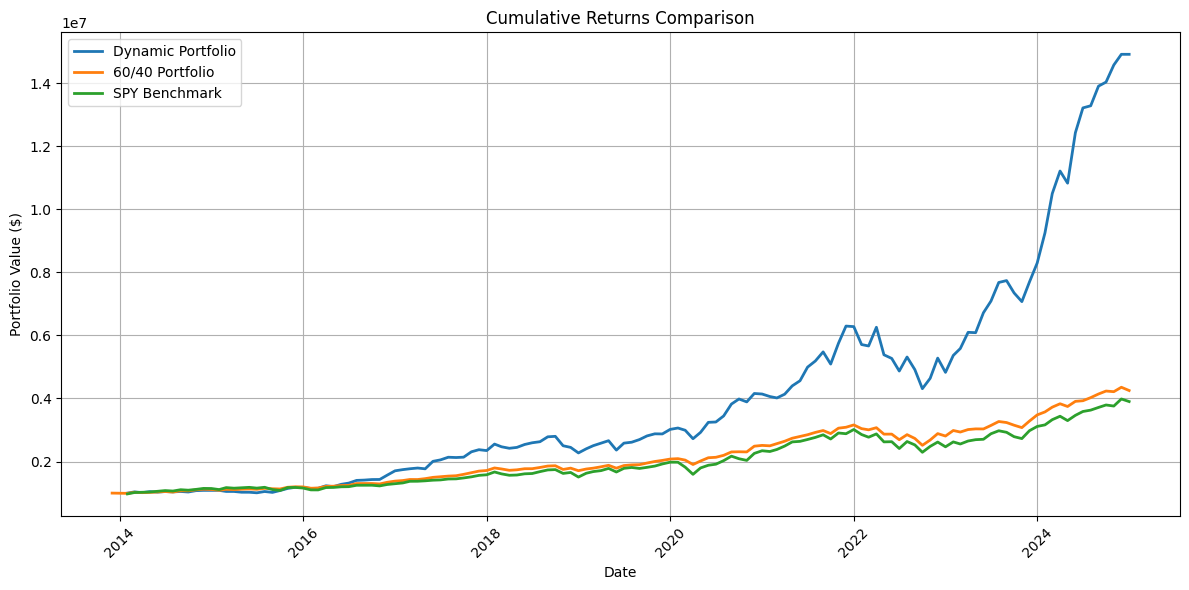

Final Cumulative Returns:
Dynamic Portfolio: 14910730.890777951
60/40 Portfolio: 4251874.820351059
SPY Benchmark: 3902330.180620769


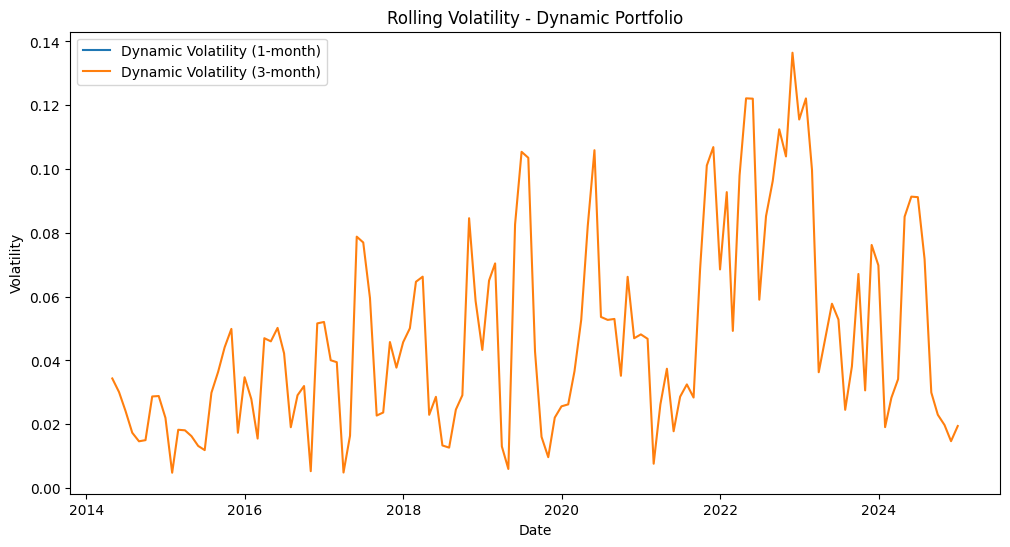

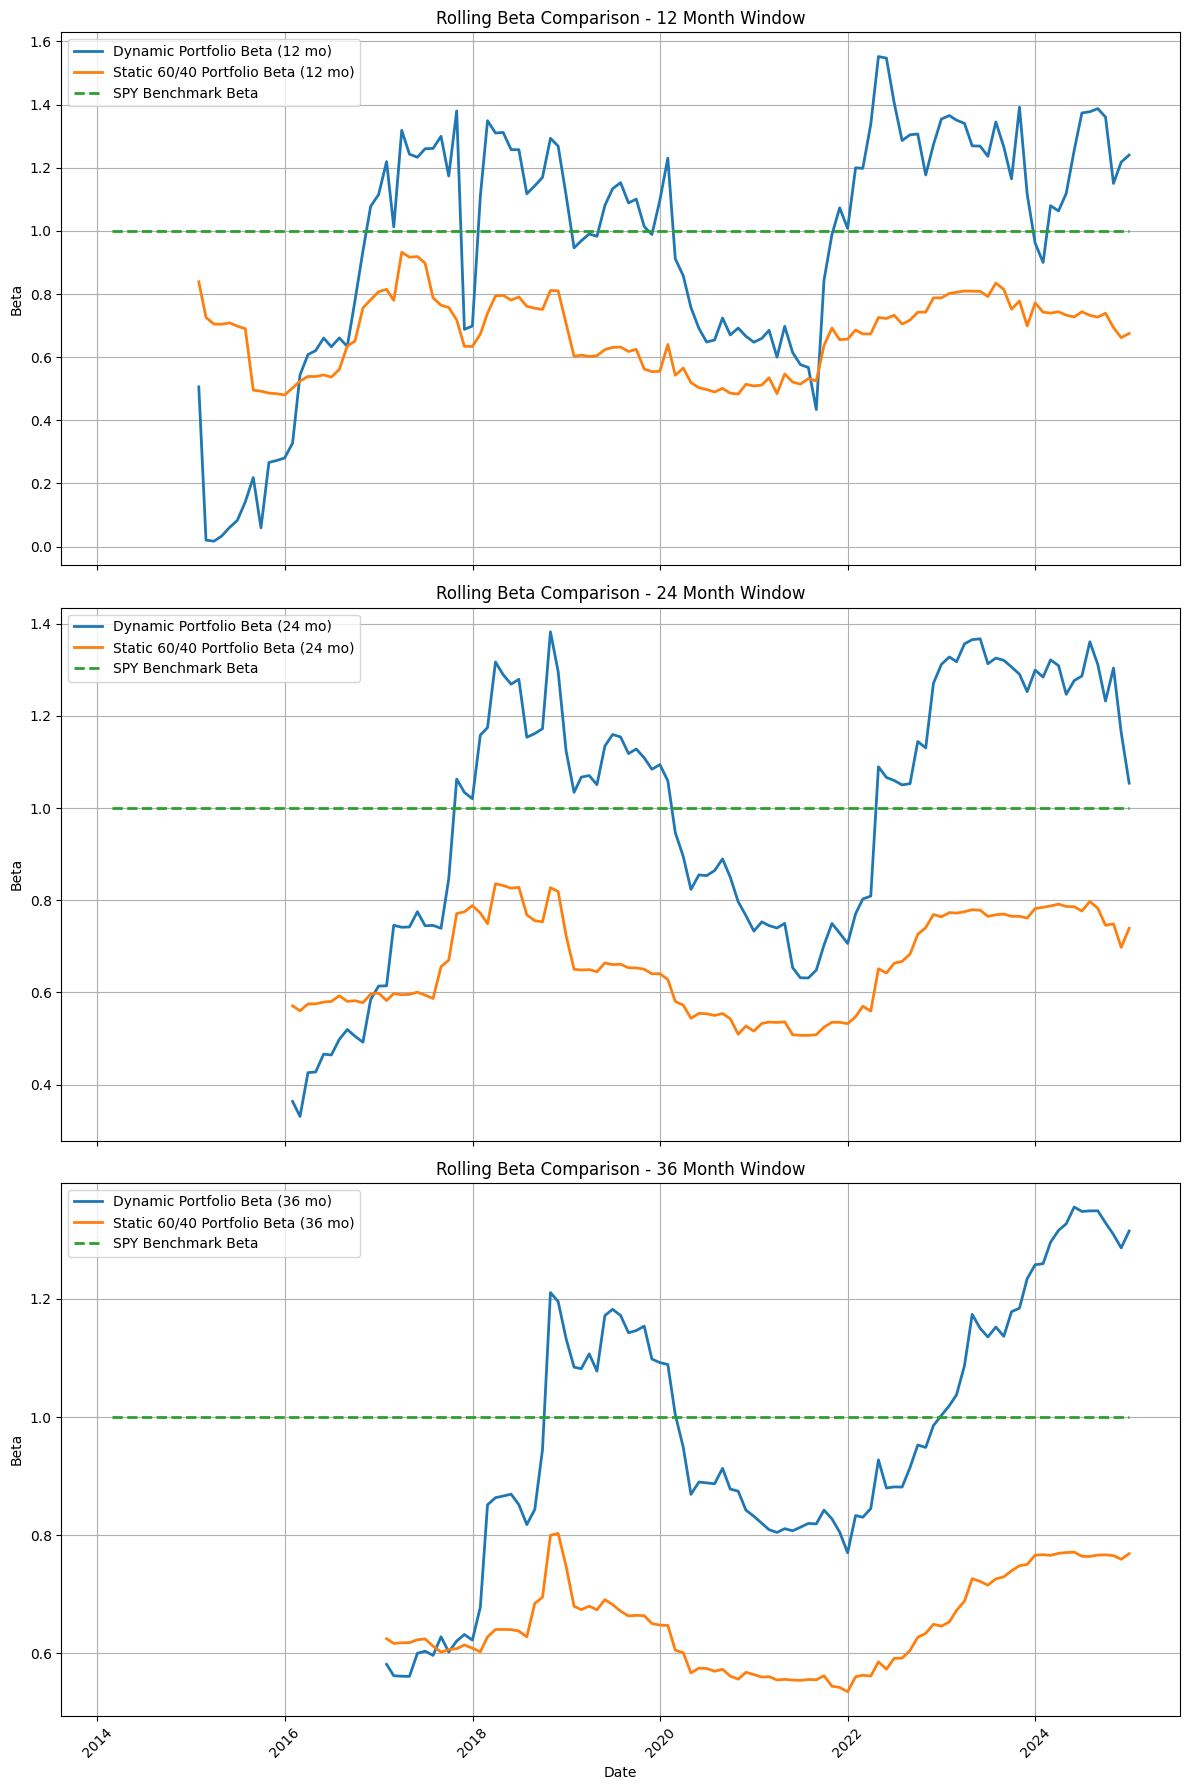

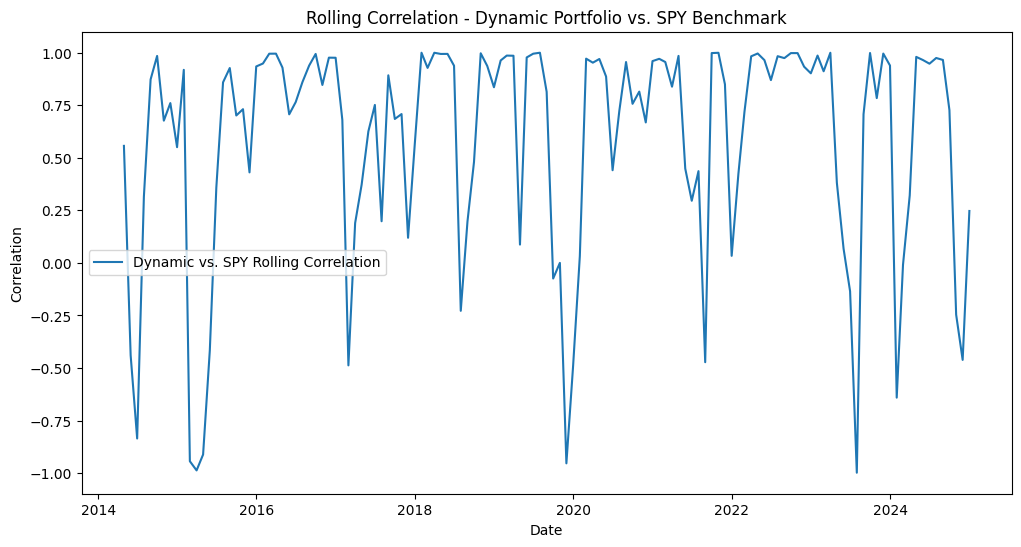

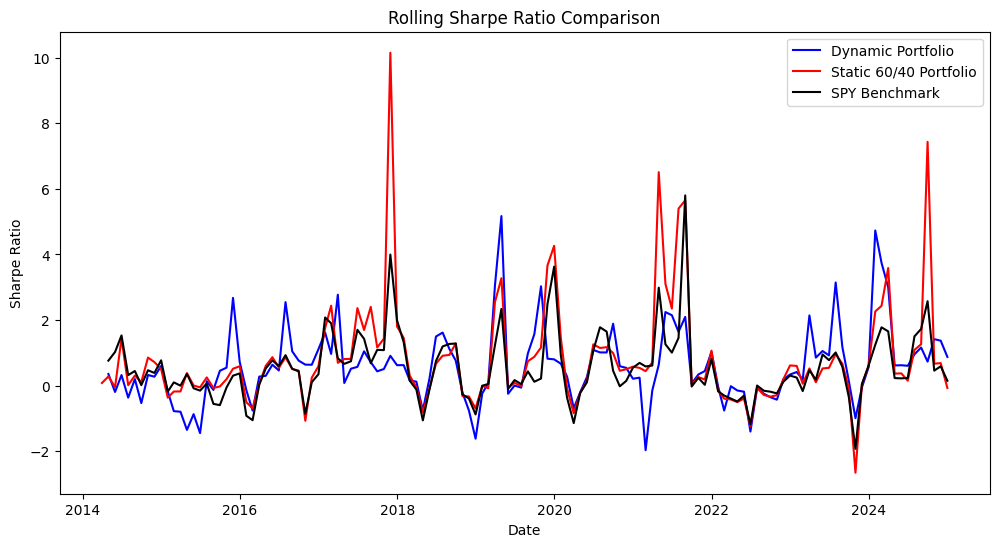

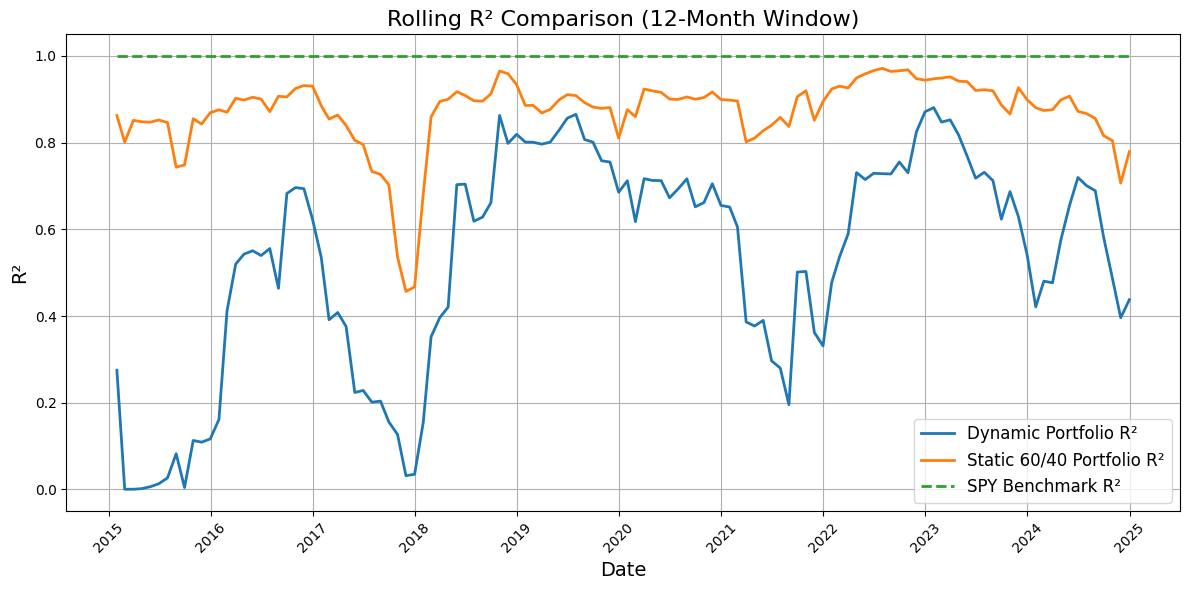

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ================================
# Data Download and Preprocessing
# ================================
# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' to track S&P 500

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download data for stocks and bonds
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2024-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2024-12-31')['Close']

# Combine them into a single DataFrame
data = pd.concat([asset_data, sp500_data], axis=1)

# Handle missing data by forward and backward filling
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns
daily_returns = data.pct_change().dropna()

# Resample data to monthly frequency
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# ================================
# Helper Functions
# ================================

# Sharpe Ratio (monthly risk-free rate applied)
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev

# Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Regression Analysis (for Alpha, Beta, R-squared)
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Calculate Variance
def calculate_variance(returns):
    return returns.var()

# Optimize Portfolio Weights
def optimize_portfolio_weights(returns):
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights
    return weights, non_zero_std_assets.index.tolist()

# Drawdown and Maximum Drawdown Calculation
def calculate_drawdowns(series):
    running_max = series.cummax()
    drawdown = (series - running_max) / running_max
    max_drawdown = drawdown.cummin()
    return drawdown, max_drawdown

# Rolling Beta Calculation
def rolling_beta(portfolio_returns, benchmark_returns, window):
    cov = portfolio_returns.rolling(window=window).cov(benchmark_returns)
    var = benchmark_returns.rolling(window=window).var()
    beta = cov / var
    return beta

# Rolling Sharpe Ratio Calculation
def rolling_sharpe(returns, window, risk_free_rate_monthly):
    excess_returns = returns - risk_free_rate_monthly
    rolling_mean = excess_returns.rolling(window=window).mean()
    rolling_std = returns.rolling(window=window).std()
    sharpe = rolling_mean / rolling_std
    return sharpe

# Compute weighted average duration for bonds in dynamic portfolio
def compute_weighted_duration(weights_df, bond_tickers, bond_durations):
    weighted_duration = []
    for index, row in weights_df.iterrows():
        total_weight = row[bond_tickers].sum()
        if total_weight > 0:
            wd = sum(row[ticker] * bond_durations[ticker] for ticker in bond_tickers) / total_weight
        else:
            wd = np.nan
        weighted_duration.append(wd)
    return pd.Series(weighted_duration, index=weights_df.index)

# ================================
# Dynamic Portfolio Optimization
# ================================
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Initial investment
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]
        train_data_filtered = train_data.dropna()

        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)
        if weights.sum() != 0:
            weights = weights / weights.sum()
        else:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
        portfolio_weights.append(weights)

        transaction_cost = 0.001
        if i > 2:
            previous_weights = portfolio_weights[-2]
        else:
            previous_weights = weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)
    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])
    return weights_df, portfolio_values_series, metrics_df

# Run dynamic portfolio optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

# Verify DataFrames
print(weights_df.head())
print(metrics_df.head())

# Export weights and metrics to Excel
try:
    with pd.ExcelWriter('Portfolio_Weights_and_Metrics.xlsx') as writer:
        weights_df.to_excel(writer, sheet_name='Portfolio_Weights')
        metrics_df.to_excel(writer, sheet_name='Portfolio_Metrics')
    print("Data has been successfully exported to Excel.")
except Exception as e:
    print(f"An error occurred while exporting data: {e}")

# ================================
# Static (60/40) Portfolio Calculation
# ================================
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time
new_index = pd.Index([initial_date]).append(monthly_returns.index)
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Plot cumulative returns comparison
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio', linewidth=2)
plt.plot(portfolio_values_60_40, label='60/40 Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='SPY Benchmark', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Final Cumulative Returns:")
print("Dynamic Portfolio:", portfolio_values_series.iloc[-1])
print("60/40 Portfolio:", portfolio_values_60_40.iloc[-1])
print("SPY Benchmark:", benchmark_cumulative.iloc[-1])

# ================================
# Risk Measures Calculations
# ================================

# Compute returns for risk measures (using monthly portfolio values)
dynamic_risk_returns = portfolio_values_series.pct_change().dropna()
static_risk_returns = portfolio_values_60_40.pct_change().dropna()
benchmark_risk_returns = benchmark_cumulative.pct_change().dropna()

# 1. Rolling Standard Deviation (Volatility)
# For monthly returns, use window sizes: 1-month (approx 30 days) and 3-month (approx 90 days)
window_1 = 1
window_3 = 3

dynamic_vol_1 = dynamic_risk_returns.rolling(window=window_1).std()
dynamic_vol_3 = dynamic_risk_returns.rolling(window=window_3).std()
static_vol_1 = static_risk_returns.rolling(window=window_1).std()
static_vol_3 = static_risk_returns.rolling(window=window_3).std()
benchmark_vol_1 = benchmark_risk_returns.rolling(window=window_1).std()
benchmark_vol_3 = benchmark_risk_returns.rolling(window=window_3).std()

plt.figure(figsize=(12, 6))
plt.plot(dynamic_vol_1, label='Dynamic Volatility (1-month)')
plt.plot(dynamic_vol_3, label='Dynamic Volatility (3-month)')
plt.title('Rolling Volatility - Dynamic Portfolio')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

import matplotlib.pyplot as plt

# Define the rolling_beta function (if not already defined)
def rolling_beta(portfolio_returns, benchmark_returns, window):
    cov = portfolio_returns.rolling(window=window).cov(benchmark_returns)
    var = benchmark_returns.rolling(window=window).var()
    beta = cov / var
    return beta

# Define rolling windows in months
rolling_windows = [12, 24, 36]

# Ensure risk return series are computed (assumed already computed)
# dynamic_risk_returns, static_risk_returns, benchmark_risk_returns

# Create subplots for side-by-side comparison
fig, axs = plt.subplots(len(rolling_windows), 1, figsize=(12, 18), sharex=True)

for i, window in enumerate(rolling_windows):
    beta_dynamic = rolling_beta(dynamic_risk_returns, benchmark_risk_returns, window=window)
    beta_static = rolling_beta(static_risk_returns, benchmark_risk_returns, window=window)
    beta_spy = pd.Series(1, index=beta_dynamic.index)  # SPY beta is always 1

    axs[i].plot(beta_dynamic, label=f'Dynamic Portfolio Beta ({window} mo)', linewidth=2)
    axs[i].plot(beta_static, label=f'Static 60/40 Portfolio Beta ({window} mo)', linewidth=2)
    axs[i].plot(beta_spy, label='SPY Benchmark Beta', linestyle='--', linewidth=2)
    axs[i].set_title(f'Rolling Beta Comparison - {window} Month Window')
    axs[i].set_ylabel('Beta')
    axs[i].legend()
    axs[i].grid(True)

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# 4. Rolling Correlation vs. Benchmark (using 3-month window)
rolling_corr_dynamic = dynamic_risk_returns.rolling(window=3).corr(benchmark_risk_returns)
rolling_corr_static = static_risk_returns.rolling(window=3).corr(benchmark_risk_returns)

plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_dynamic, label='Dynamic vs. SPY Rolling Correlation')
plt.title('Rolling Correlation - Dynamic Portfolio vs. SPY Benchmark')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

# 5. Rolling Sharpe Ratio (using 3-month window)

# Calculate returns for risk measures (using monthly portfolio values)
dynamic_risk_returns = portfolio_values_series.pct_change().dropna()
static_risk_returns = portfolio_values_60_40.pct_change().dropna()
benchmark_risk_returns = benchmark_cumulative.pct_change().dropna()

# Define risk-free rate on a monthly basis
risk_free_rate_monthly = risk_free_rate / 12

# Rolling Sharpe Ratio function (already defined above)
# def rolling_sharpe(returns, window, risk_free_rate_monthly): ...

# Use a 3-month window for the rolling Sharpe ratio
rolling_window = 3
rolling_sharpe_dynamic = rolling_sharpe(dynamic_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)
rolling_sharpe_static = rolling_sharpe(static_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)
rolling_sharpe_benchmark = rolling_sharpe(benchmark_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)

plt.figure(figsize=(12,6))
plt.plot(rolling_sharpe_dynamic, label='Dynamic Portfolio', color='blue')
plt.plot(rolling_sharpe_static, label='Static 60/40 Portfolio' , color='red')
plt.plot(rolling_sharpe_benchmark, label='SPY Benchmark', color='black')
plt.title('Rolling Sharpe Ratio Comparison')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()


# Function to calculate rolling R-squared
def rolling_regression_r2(portfolio_returns, benchmark_returns, window):
    # Align both series to the common index
    common_index = portfolio_returns.index.intersection(benchmark_returns.index)
    portfolio_returns = portfolio_returns.loc[common_index]
    benchmark_returns = benchmark_returns.loc[common_index]

    r_squared_values = []
    # Use the aligned portfolio_returns index for the loop
    index = portfolio_returns.index[window-1:]
    for i in range(window, len(portfolio_returns) + 1):
        window_index = portfolio_returns.index[i-window:i]
        y = portfolio_returns.loc[window_index]
        x = benchmark_returns.loc[window_index]
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        r_squared_values.append(model.rsquared)
    return pd.Series(r_squared_values, index=index)


# Choose a rolling window (e.g., 12 months)
rolling_window = 12

# Compute monthly returns for risk measures if not already done:
dynamic_risk_returns = portfolio_values_series.pct_change().dropna()
static_risk_returns = portfolio_values_60_40.pct_change().dropna()
benchmark_risk_returns = benchmark_cumulative.pct_change().dropna()

# Calculate rolling R-squared for dynamic and static portfolios
rolling_r2_dynamic = rolling_regression_r2(dynamic_risk_returns, benchmark_risk_returns, window=rolling_window)
rolling_r2_static = rolling_regression_r2(static_risk_returns, benchmark_risk_returns, window=rolling_window)

# For SPY, when regressed on itself, R-squared is 1.
rolling_r2_spy = pd.Series(1, index=rolling_r2_dynamic.index)

# Plot the rolling R-squared values
plt.figure(figsize=(12, 6))
plt.plot(rolling_r2_dynamic, label='Dynamic Portfolio R²', linewidth=2)
plt.plot(rolling_r2_static, label='Static 60/40 Portfolio R²', linewidth=2)
plt.plot(rolling_r2_spy, label='SPY Benchmark R²', linestyle='--', linewidth=2)
plt.title('Rolling R² Comparison (12-Month Window)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed
100%|██████████| 130/130 [00:18<00:00,  6.89it/s]


Sample Portfolio Weights:
                    NVDA     GOOGL          ABBV           NKE          COST  \
Date                                                                           
2014-03-31  6.666667e-02  0.066667  6.666667e-02  6.666667e-02  6.666667e-02   
2014-04-30  1.111485e-01  0.319914  0.000000e+00  0.000000e+00  0.000000e+00   
2014-05-31  6.541947e-03  0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
2014-06-30  1.596654e-11  0.012351  2.545171e-12  1.321868e-11  8.467939e-12   
2014-07-31  0.000000e+00  0.000000  4.571650e-02  0.000000e+00  0.000000e+00   

                     DUK       JPM           AXP       CAT            HD  \
Date                                                                       
2014-03-31  6.666667e-02  0.066667  6.666667e-02  0.066667  6.666667e-02   
2014-04-30  1.793610e-01  0.000000  0.000000e+00  0.276500  0.000000e+00   
2014-05-31  2.443946e-01  0.193590  0.000000e+00  0.529189  0.000000e+00   
2014-06-30  1.993955e-01  0.19377

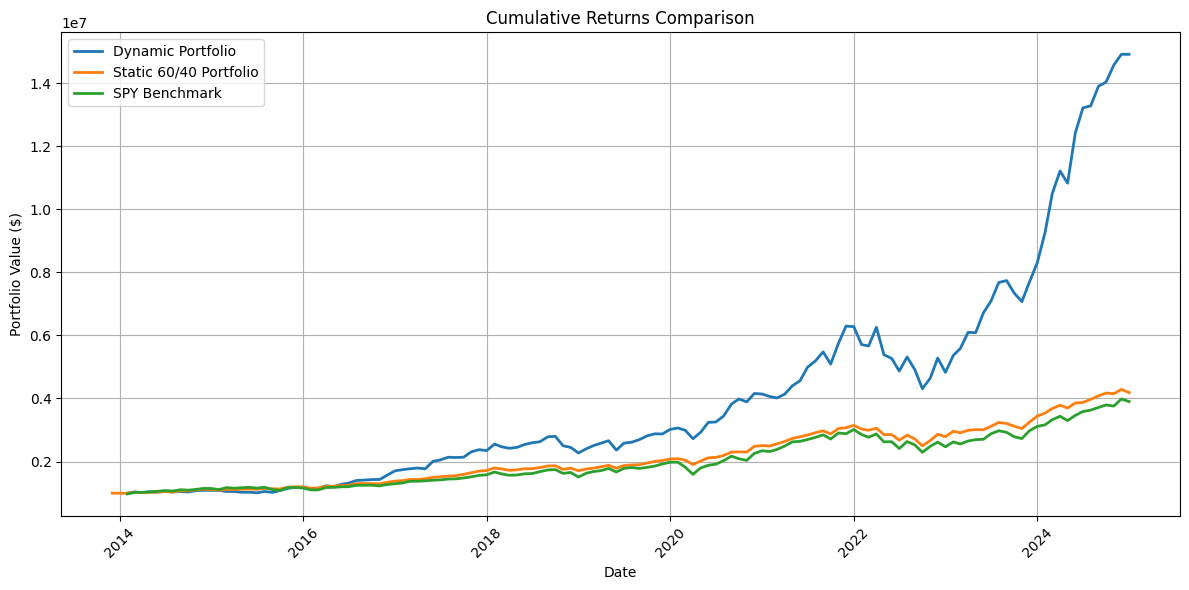

Final Cumulative Returns:
Dynamic Portfolio: 14912634.132278759
Static 60/40 Portfolio: 4186314.186709571
SPY Benchmark: 3902329.3881874727


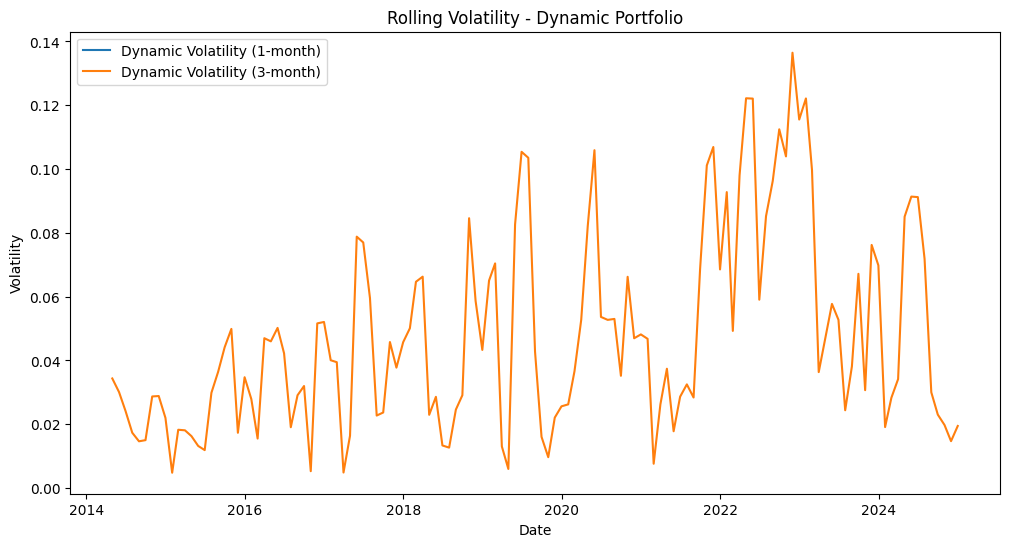

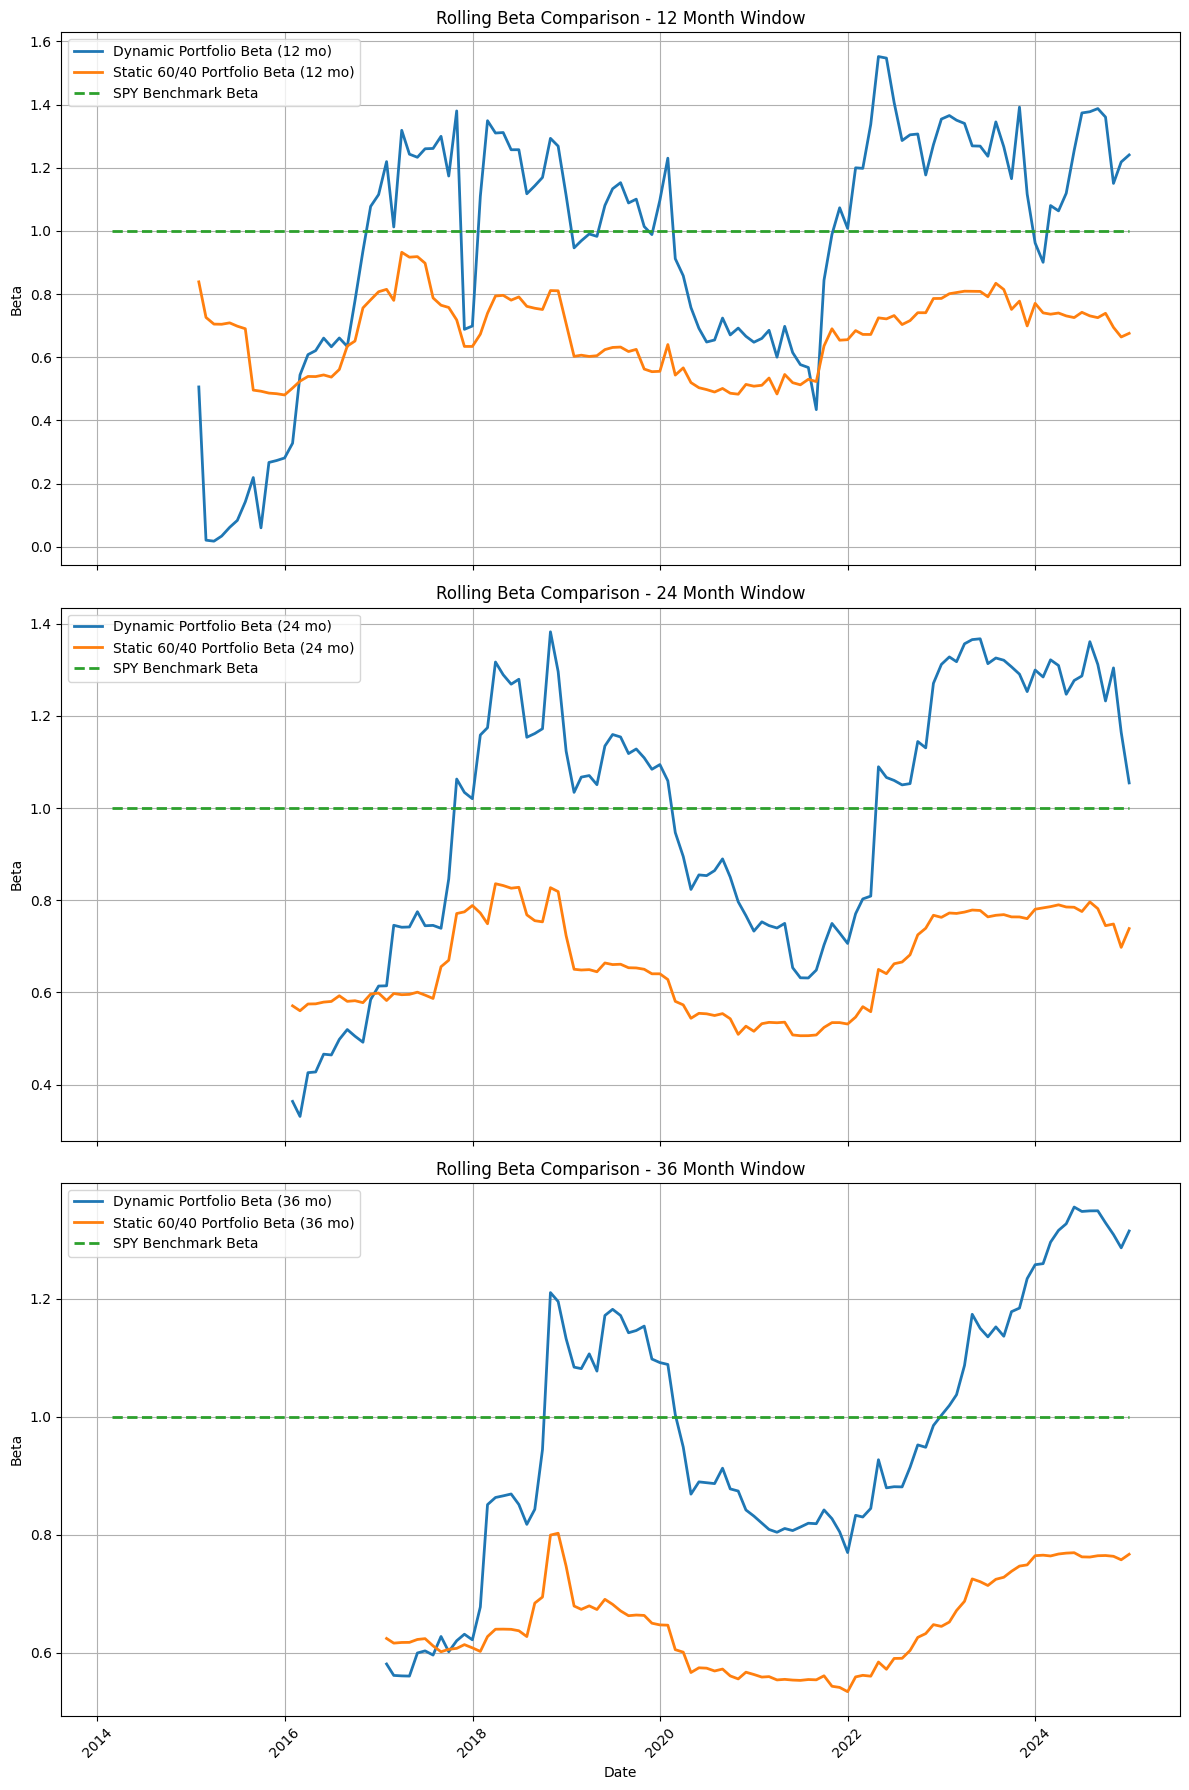

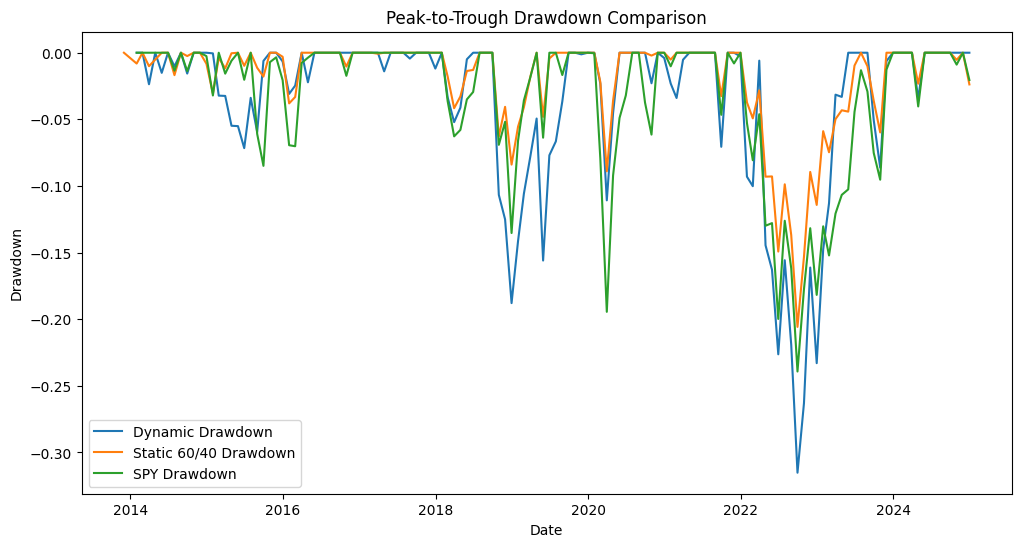

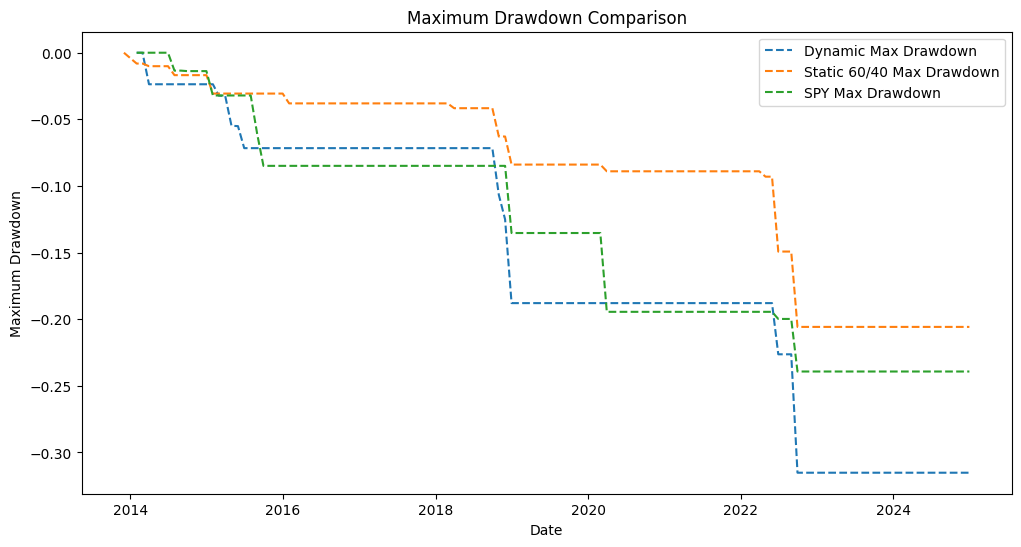

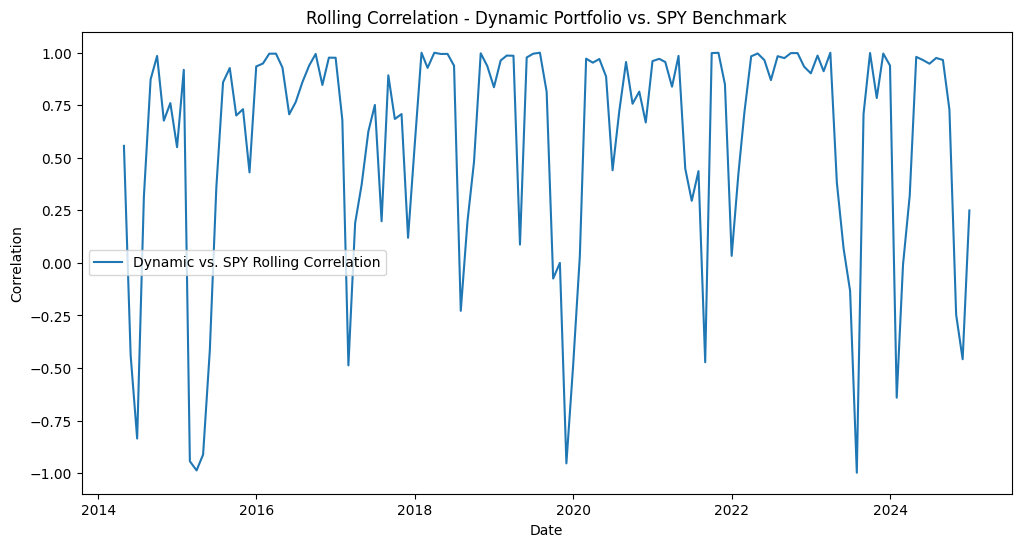

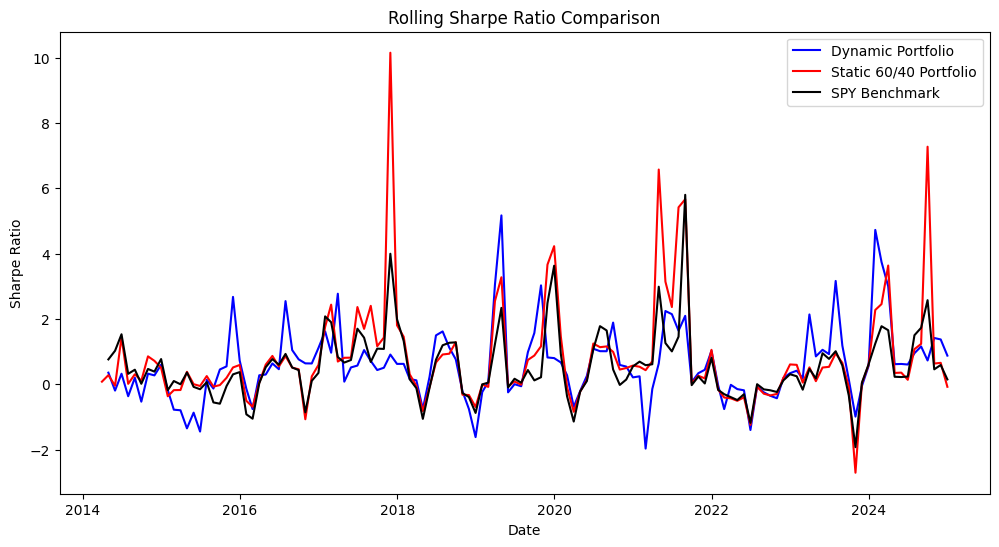

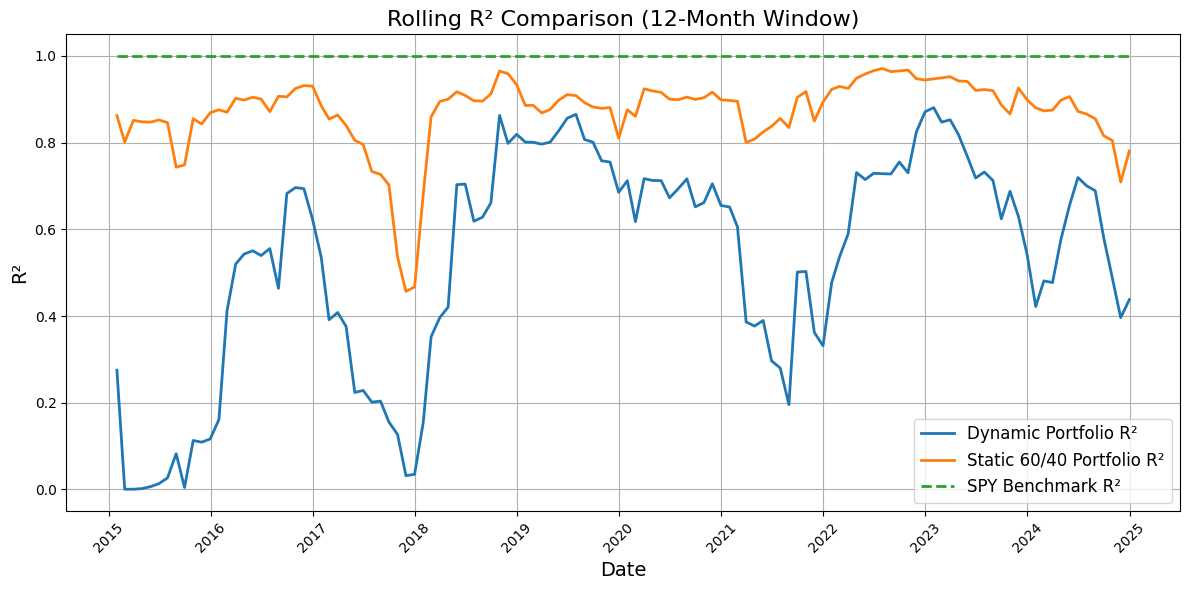

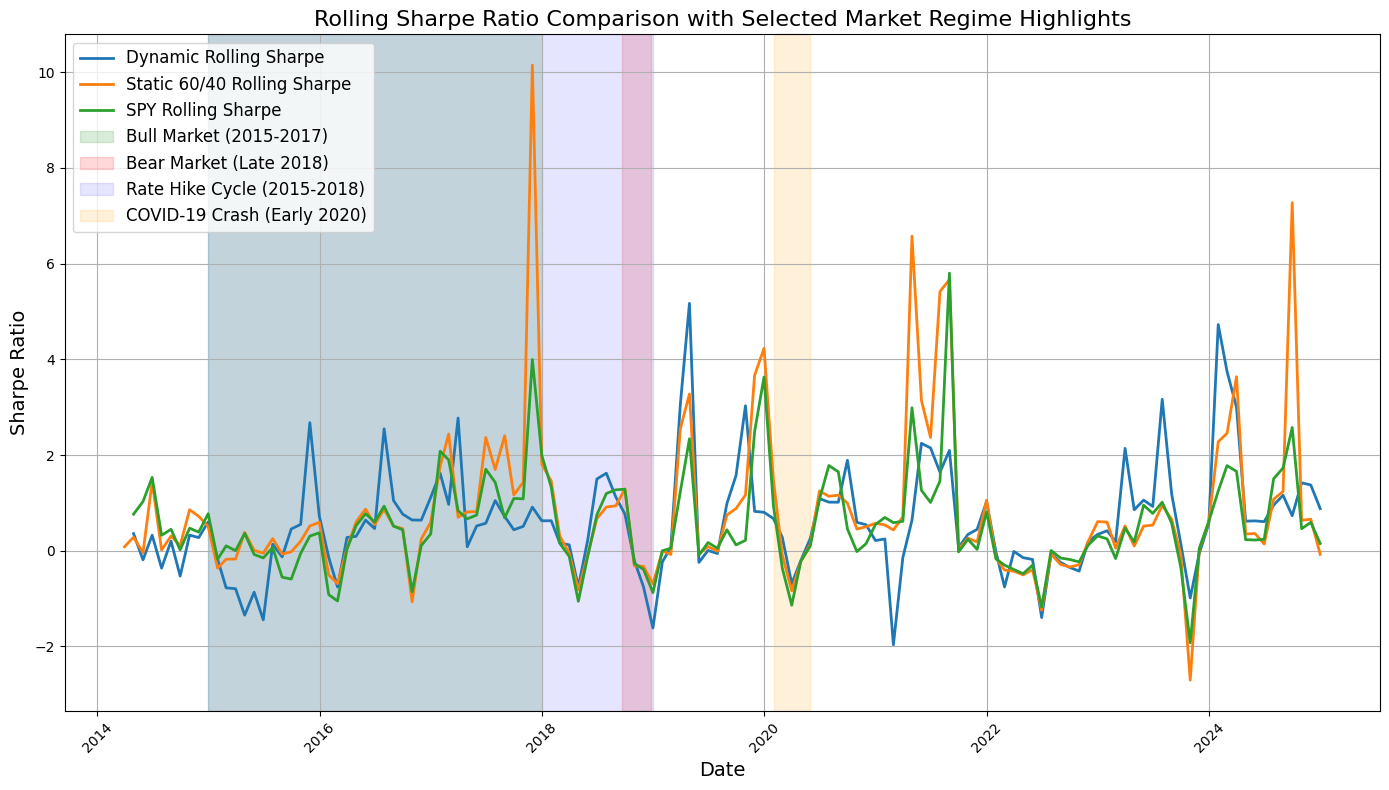

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm import tqdm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ================================
# Data Download and Preprocessing
# ================================
# Define stock and bond tickers
stock_tickers = ['NVDA', 'GOOGL', 'ABBV', 'NKE', 'COST', 'DUK', 'JPM', 'AXP', 'CAT', 'HD']
bond_tickers = ['VGSH', 'SPTS', 'IEI', 'SCHI', 'TIP']
assets_tickers = stock_tickers + bond_tickers
benchmark_ticker = 'SPY'  # Using 'SPY' as benchmark

# Risk-free rate (annualized)
risk_free_rate = 0.0425  # 4.25%

# Download historical price data
asset_data = yf.download(assets_tickers, start='2014-01-01', end='2024-12-31')['Close']
sp500_data = yf.download(benchmark_ticker, start='2014-01-01', end='2024-12-31')['Close']

# Combine into a single DataFrame and fill missing values
data = pd.concat([asset_data, sp500_data], axis=1)
data.ffill(inplace=True)
data.bfill(inplace=True)

# Calculate daily returns and then resample to monthly frequency (End-of-Month)
daily_returns = data.pct_change().dropna()
monthly_returns = daily_returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)

# ================================
# Helper Functions
# ================================

# Sharpe Ratio (using monthly risk-free rate)
def calculate_sharpe_ratio(returns):
    mean_return = returns.mean()
    std_dev = returns.std()
    return (mean_return - risk_free_rate / 12) / std_dev

# Value at Risk (VaR)
def calculate_var(returns, confidence_level=0.95):
    mean_return = returns.mean()
    std_dev = returns.std()
    z_score = norm.ppf(1 - confidence_level)
    return mean_return - z_score * std_dev

# Regression Analysis for Alpha, Beta, R-squared
def regression_analysis(endog, exog):
    if len(endog) < 2 or len(exog) < 2:
        return np.nan, np.nan, np.nan
    X = sm.add_constant(exog)
    model = sm.OLS(endog, X).fit()
    alpha = model.params[0]
    beta = model.params[1]
    r_squared = model.rsquared
    return alpha, beta, r_squared

# Calculate Variance of returns
def calculate_variance(returns):
    return returns.var()

# Optimize Portfolio Weights
def optimize_portfolio_weights(returns):
    std_devs = returns.std()
    non_zero_std_assets = std_devs[std_devs > 0]
    returns = returns[non_zero_std_assets.index]
    cov_matrix = returns.cov() + 1e-6 * np.eye(returns.shape[1])

    def negative_sharpe(weights, returns, risk_free_rate):
        portfolio_return = np.dot(weights, returns.mean())
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        if portfolio_volatility == 0:
            return -np.inf
        return -(portfolio_return - risk_free_rate / 12) / portfolio_volatility

    num_assets = returns.shape[1]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = [(0, 1) for _ in range(num_assets)]
    initial_weights = np.array([1 / num_assets] * num_assets)

    try:
        optimized = minimize(negative_sharpe, initial_weights, args=(returns, risk_free_rate),
                             bounds=bounds, constraints=constraints, method='SLSQP')
        if not optimized.success:
            raise ValueError("Optimization failed")
        weights = optimized.x
    except Exception as e:
        print(f"Optimization error: {e}")
        weights = initial_weights
    return weights, non_zero_std_assets.index.tolist()

# Drawdown and Maximum Drawdown Calculation
def calculate_drawdowns(series):
    running_max = series.cummax()
    drawdown = (series - running_max) / running_max
    max_drawdown = drawdown.cummin()
    return drawdown, max_drawdown

# Rolling Beta Calculation
def rolling_beta(portfolio_returns, benchmark_returns, window):
    cov = portfolio_returns.rolling(window=window).cov(benchmark_returns)
    var = benchmark_returns.rolling(window=window).var()
    beta = cov / var
    return beta

# Rolling Sharpe Ratio Calculation
def rolling_sharpe(returns, window, risk_free_rate_monthly):
    excess_returns = returns - risk_free_rate_monthly
    rolling_mean = excess_returns.rolling(window=window).mean()
    rolling_std = returns.rolling(window=window).std()
    sharpe = rolling_mean / rolling_std
    return sharpe

# Compute weighted average duration for bonds (Dynamic Portfolio)
def compute_weighted_duration(weights_df, bond_tickers, bond_durations):
    weighted_duration = []
    for index, row in weights_df.iterrows():
        total_weight = row[bond_tickers].sum()
        if total_weight > 0:
            wd = sum(row[ticker] * bond_durations[ticker] for ticker in bond_tickers) / total_weight
        else:
            wd = np.nan
        weighted_duration.append(wd)
    return pd.Series(weighted_duration, index=weights_df.index)

# Function to calculate Rolling R-squared
def rolling_regression_r2(portfolio_returns, benchmark_returns, window):
    # Align both series to common index
    common_index = portfolio_returns.index.intersection(benchmark_returns.index)
    portfolio_returns = portfolio_returns.loc[common_index]
    benchmark_returns = benchmark_returns.loc[common_index]

    r_squared_values = []
    index = portfolio_returns.index[window-1:]
    for i in range(window, len(portfolio_returns) + 1):
        window_index = portfolio_returns.index[i-window:i]
        y = portfolio_returns.loc[window_index]
        x = benchmark_returns.loc[window_index]
        X = sm.add_constant(x)
        model = sm.OLS(y, X).fit()
        r_squared_values.append(model.rsquared)
    return pd.Series(r_squared_values, index=index)

# ================================
# Dynamic Portfolio Optimization
# ================================
def dynamic_portfolio_optimization():
    portfolio_values = [1_000_000]  # Starting with $1,000,000
    portfolio_weights = []
    portfolio_returns = []
    metrics = []

    for i in tqdm(range(2, len(monthly_returns))):
        train_data = monthly_returns.iloc[:i-1]
        test_data = monthly_returns.iloc[i-1]
        train_data_filtered = train_data.dropna()

        if train_data_filtered.empty:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        try:
            weights_opt, assets_used = optimize_portfolio_weights(train_data_filtered[assets_tickers])
        except:
            weights = np.array([1 / len(assets_tickers)] * len(assets_tickers))
            portfolio_weights.append(weights)
            portfolio_return = np.dot(weights, test_data[assets_tickers].values)
            portfolio_returns.append(portfolio_return)
            portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue

        weights_dict = dict(zip(assets_used, weights_opt))
        full_weights = [weights_dict.get(asset, 0.0) for asset in assets_tickers]
        weights = np.array(full_weights)
        weights = weights / weights.sum() if weights.sum() != 0 else np.array([1 / len(assets_tickers)] * len(assets_tickers))
        portfolio_weights.append(weights)

        transaction_cost = 0.001
        previous_weights = portfolio_weights[-2] if i > 2 else weights
        portfolio_return = np.dot(weights, test_data[assets_tickers].values) - transaction_cost * np.sum(np.abs(weights - previous_weights))
        portfolio_returns.append(portfolio_return)
        portfolio_values.append(portfolio_values[-1] * (1 + portfolio_return))

        portfolio_returns_series = pd.Series(portfolio_returns)
        if len(portfolio_returns_series) < 2:
            metrics.append({
                'Sharpe Ratio': np.nan,
                'Value at Risk (95%)': np.nan,
                'Alpha': np.nan,
                'Beta': np.nan,
                'R-squared': np.nan,
                'Variance': np.nan
            })
            continue
        sharpe_ratio = calculate_sharpe_ratio(portfolio_returns_series)
        var_95 = calculate_var(portfolio_returns_series)
        alpha, beta, r_squared = regression_analysis(portfolio_returns_series.values, monthly_returns[benchmark_ticker].iloc[:i-1].values)
        variance = calculate_variance(portfolio_returns_series)
        metrics.append({
            'Sharpe Ratio': sharpe_ratio,
            'Value at Risk (95%)': var_95,
            'Alpha': alpha,
            'Beta': beta,
            'R-squared': r_squared,
            'Variance': variance
        })

    weights_df = pd.DataFrame(portfolio_weights, columns=assets_tickers, index=monthly_returns.index[2:])
    weights_df = weights_df.div(weights_df.sum(axis=1), axis=0)
    portfolio_values_series = pd.Series(portfolio_values, index=monthly_returns.index[:len(portfolio_values)])
    metrics_df = pd.DataFrame(metrics, index=monthly_returns.index[2:])
    return weights_df, portfolio_values_series, metrics_df

# Run Dynamic Portfolio Optimization
weights_df, portfolio_values_series, metrics_df = dynamic_portfolio_optimization()

print("Sample Portfolio Weights:")
print(weights_df.head())
print("\nSample Metrics:")
print(metrics_df.head())

# Export weights and metrics to Excel (optional)
try:
    with pd.ExcelWriter('Portfolio_Weights_and_Metrics.xlsx') as writer:
        weights_df.to_excel(writer, sheet_name='Portfolio_Weights')
        metrics_df.to_excel(writer, sheet_name='Portfolio_Metrics')
    print("Data has been successfully exported to Excel.")
except Exception as e:
    print(f"An error occurred while exporting data: {e}")

# ================================
# Static (60/40) Portfolio Calculation
# ================================
stocks = monthly_returns[stock_tickers]
bonds = monthly_returns[bond_tickers]
stock_group_return = stocks.mean(axis=1)
bond_group_return = bonds.mean(axis=1)
portfolio_60_40_return = 0.6 * stock_group_return + 0.4 * bond_group_return

portfolio_values_60_40 = [1_000_000]
for ret in portfolio_60_40_return:
    portfolio_values_60_40.append(portfolio_values_60_40[-1] * (1 + ret))
initial_date = monthly_returns.index[0] - pd.DateOffset(months=1)
initial_date = initial_date.to_period('M').start_time
new_index = pd.Index([initial_date]).append(monthly_returns.index)
portfolio_values_60_40 = pd.Series(portfolio_values_60_40, index=new_index)

# Create a common index for all series
common_index = portfolio_values_series.index.union(portfolio_values_60_40.index).union(monthly_returns.index)
portfolio_values_series = portfolio_values_series.reindex(common_index, method='ffill')
portfolio_values_60_40 = portfolio_values_60_40.reindex(common_index, method='ffill')
benchmark_cumulative = (1 + monthly_returns[benchmark_ticker]).cumprod()
benchmark_cumulative = benchmark_cumulative.reindex(common_index, method='ffill')
benchmark_cumulative = 1_000_000 * benchmark_cumulative

# Plot Cumulative Returns Comparison
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_series, label='Dynamic Portfolio', linewidth=2)
plt.plot(portfolio_values_60_40, label='Static 60/40 Portfolio', linewidth=2)
plt.plot(benchmark_cumulative, label='SPY Benchmark', linewidth=2)
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Final Cumulative Returns:")
print("Dynamic Portfolio:", portfolio_values_series.iloc[-1])
print("Static 60/40 Portfolio:", portfolio_values_60_40.iloc[-1])
print("SPY Benchmark:", benchmark_cumulative.iloc[-1])

# ================================
# Risk Measures Calculations
# ================================
# Compute monthly returns for risk measures
dynamic_risk_returns = portfolio_values_series.pct_change().dropna()
static_risk_returns = portfolio_values_60_40.pct_change().dropna()
benchmark_risk_returns = benchmark_cumulative.pct_change().dropna()

# 1. Rolling Standard Deviation (Volatility)
window_1 = 1
window_3 = 3

dynamic_vol_1 = dynamic_risk_returns.rolling(window=window_1).std()
dynamic_vol_3 = dynamic_risk_returns.rolling(window=window_3).std()
static_vol_1 = static_risk_returns.rolling(window=window_1).std()
static_vol_3 = static_risk_returns.rolling(window=window_3).std()
benchmark_vol_1 = benchmark_risk_returns.rolling(window=window_1).std()
benchmark_vol_3 = benchmark_risk_returns.rolling(window=window_3).std()

plt.figure(figsize=(12, 6))
plt.plot(dynamic_vol_1, label='Dynamic Volatility (1-month)')
plt.plot(dynamic_vol_3, label='Dynamic Volatility (3-month)')
plt.title('Rolling Volatility - Dynamic Portfolio')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 2. Rolling Beta Calculation with 12-, 24-, and 36-month windows
rolling_windows = [12, 24, 36]
fig, axs = plt.subplots(len(rolling_windows), 1, figsize=(12, 18), sharex=True)
for i, window in enumerate(rolling_windows):
    beta_dynamic = rolling_beta(dynamic_risk_returns, benchmark_risk_returns, window=window)
    beta_static = rolling_beta(static_risk_returns, benchmark_risk_returns, window=window)
    beta_spy = pd.Series(1, index=beta_dynamic.index)  # SPY beta is always 1
    axs[i].plot(beta_dynamic, label=f'Dynamic Portfolio Beta ({window} mo)', linewidth=2)
    axs[i].plot(beta_static, label=f'Static 60/40 Portfolio Beta ({window} mo)', linewidth=2)
    axs[i].plot(beta_spy, label='SPY Benchmark Beta', linestyle='--', linewidth=2)
    axs[i].set_title(f'Rolling Beta Comparison - {window} Month Window')
    axs[i].set_ylabel('Beta')
    axs[i].legend()
    axs[i].grid(True)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Drawdown and Maximum Drawdown
drawdown_dynamic, max_drawdown_dynamic = calculate_drawdowns(portfolio_values_series)
drawdown_static, max_drawdown_static = calculate_drawdowns(portfolio_values_60_40)
drawdown_benchmark, max_drawdown_benchmark = calculate_drawdowns(benchmark_cumulative)

plt.figure(figsize=(12, 6))
plt.plot(drawdown_dynamic, label='Dynamic Drawdown')
plt.plot(drawdown_static, label='Static 60/40 Drawdown')
plt.plot(drawdown_benchmark, label='SPY Drawdown')
plt.title('Peak-to-Trough Drawdown Comparison')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(max_drawdown_dynamic, label='Dynamic Max Drawdown', linestyle='--')
plt.plot(max_drawdown_static, label='Static 60/40 Max Drawdown', linestyle='--')
plt.plot(max_drawdown_benchmark, label='SPY Max Drawdown', linestyle='--')
plt.title('Maximum Drawdown Comparison')
plt.xlabel('Date')
plt.ylabel('Maximum Drawdown')
plt.legend()
plt.show()

# 4. Rolling Correlation vs. Benchmark (3-month window)
rolling_corr_dynamic = dynamic_risk_returns.rolling(window=3).corr(benchmark_risk_returns)
rolling_corr_static = static_risk_returns.rolling(window=3).corr(benchmark_risk_returns)
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr_dynamic, label='Dynamic vs. SPY Rolling Correlation')
plt.title('Rolling Correlation - Dynamic Portfolio vs. SPY Benchmark')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()

# 5. Rolling Sharpe Ratio (3-month window)
risk_free_rate_monthly = risk_free_rate / 12
rolling_window = 3
rolling_sharpe_dynamic = rolling_sharpe(dynamic_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)
rolling_sharpe_static = rolling_sharpe(static_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)
rolling_sharpe_benchmark = rolling_sharpe(benchmark_risk_returns, window=rolling_window, risk_free_rate_monthly=risk_free_rate_monthly)
plt.figure(figsize=(12,6))
plt.plot(rolling_sharpe_dynamic, label='Dynamic Portfolio', color='blue')
plt.plot(rolling_sharpe_static, label='Static 60/40 Portfolio', color='red')
plt.plot(rolling_sharpe_benchmark, label='SPY Benchmark', color='black')
plt.title('Rolling Sharpe Ratio Comparison')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

# 6. Rolling R-squared (12-month window)
rolling_window = 12
rolling_r2_dynamic = rolling_regression_r2(dynamic_risk_returns, benchmark_risk_returns, window=rolling_window)
rolling_r2_static = rolling_regression_r2(static_risk_returns, benchmark_risk_returns, window=rolling_window)
rolling_r2_spy = pd.Series(1, index=rolling_r2_dynamic.index)
plt.figure(figsize=(12, 6))
plt.plot(rolling_r2_dynamic, label='Dynamic Portfolio R²', linewidth=2)
plt.plot(rolling_r2_static, label='Static 60/40 Portfolio R²', linewidth=2)
plt.plot(rolling_r2_spy, label='SPY Benchmark R²', linestyle='--', linewidth=2)
plt.title('Rolling R² Comparison (12-Month Window)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# Sharpe Ratio Comparison with Market Regime Highlights
# ================================
plt.figure(figsize=(14, 8))
plt.plot(rolling_sharpe_dynamic, label='Dynamic Rolling Sharpe', linewidth=2)
plt.plot(rolling_sharpe_static, label='Static 60/40 Rolling Sharpe', linewidth=2)
plt.plot(rolling_sharpe_benchmark, label='SPY Rolling Sharpe', linewidth=2)

ax = plt.gca()

# --- Highlight Market Regimes (Simplified) ---

# 1. Bull Market: Choose one representative period, e.g., 2015-2017
ax.axvspan(pd.Timestamp('2015-01-01'), pd.Timestamp('2017-12-31'), color='green', alpha=0.15, label='Bull Market (2015-2017)')

# 2. Bear Market: Use the late 2018 downturn as an example
ax.axvspan(pd.Timestamp('2018-09-20'), pd.Timestamp('2018-12-24'), color='red', alpha=0.15, label='Bear Market (Late 2018)')

# 3. Interest Rate Hike Cycle: Combine periods (e.g., 2015-2018) if applicable
ax.axvspan(pd.Timestamp('2015-01-01'), pd.Timestamp('2018-12-31'), color='blue', alpha=0.1, label='Rate Hike Cycle (2015-2018)')

# 4. COVID-19 Crash: Early 2020 period
ax.axvspan(pd.Timestamp('2020-02-01'), pd.Timestamp('2020-05-31'), color='orange', alpha=0.15, label='COVID-19 Crash (Early 2020)')

# --- Finalize the Plot ---
plt.title('Rolling Sharpe Ratio Comparison with Selected Market Regime Highlights', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
